1. 목적: 데이터 분석 역량 확인
2. 제출 과제: 데이터 전처리, 모형 항목 선정, 모형 개발, 모형성능 측정 등의 과정이 담긴 Jupyter notebook 코드 제출
3. 제출 기한: 2024년 08월 02일 금요일 24시
4. 면접일: 사전과제 합격자에 한하여 별도 공지 예정
5. 제출 방법: 과제 완성본 메일 제출 (제출 메일 주소: jinyi.kim@seizedata.com)
6. 과제 상세 내용:
1) Lending Club 불량 예측모형 개발 (링크)
활용 데이터셋: accepted_2007_to_2018Q4.csv (reject 파일은 활용 X)

상기 데이터의 레이아웃은 첨부된 엑셀 문서를 참고해주세요.

분석 주제는 2015 ~ 2016 대출이 실행된 대상자에 대해서, 정상(0) / 불량(1)을 예측하는 이진분류모형(Binary classifiaction model) 개발입니다.

데이터 전처리, 모형 항목 선정, 모형 개발 등의 분석 내용이 담긴 Code를 제출해주세요.

Code 외, 추가로 작성하신 문서가 있다면 제출하셔도 됩니다.



2) 분석 가이드



      ● 로컬 PC에서 분석이 힘들다면 Google Colaboratory을 활용해보세요.

      ● 대상자 선정

         - issue_d(대출실행년월)가 2015~2016년인 대상자

         - loan_status 항목값이 Current / Fully Paid / Charged Off / Default / Late (16~30 days) / Late (31-120 days)에 해당하는 대상자 (그 외 값을 갖는 대상 제외)

         - application_type 항목값이 individual인 대상자

      ● 타겟 정의: loan_status 항목 중

         - 정상(0): Current / Fully Paid

         - 불량(1): Charged Off / Default / Late (16~30 days) / Late (31-120 days)에 해당

      ● 모형 제외항목 정의: 첨부 파일 참고

모형 성능 지표 선정

- 본 과제에 적합한 성능 지표를 선정하여 모형 변별력 측정

 - 지표 예시: KS, AR, AUROC, F1, Recall, Precision, Accuracy 등

### 랜딩클럽 구조
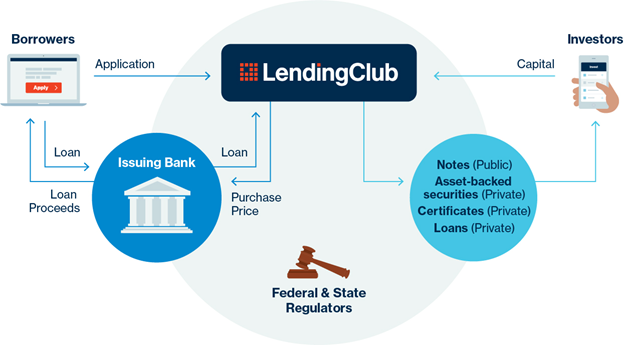

# 배경
- LendingClub -> P2P 대출 회사
- LendingClub은 기존 은행 대출과 다르게 부도리스크를 직접 부담하지 않는다.
- 그럼에도 부도리스크를 관리해야 하는 이유? : 고객의 리스크 관리가 플랫폼의 경쟁력과 직결
- 2015년, 2016년 데이터 : 2016년 부실대출 사태 -> 고객의 신뢰도 하락

# 목차

(colab, vscode 목차 사용 가능)

1. 데이터 수집 및 수정

2. 데이터 탐색 및 데이터 전처리

3. 통계 검증

4. 피처셀렉션

5. 모델링 & 성능평가

6. 인사이트 & 피드백

In [2]:
# 작업할 폴더를 지정
file_path = './'

# 사용 라이브러리
import pandas as pd
import numpy as np

# 시각화
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

# 통계
from scipy import stats
import statsmodels.api as sm

# 리샘플
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN
from imblearn.under_sampling import TomekLinks, EditedNearestNeighbours

# 모델
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from lightgbm import LGBMClassifier
from pytorch_tabnet.tab_model import TabNetClassifier
from catboost import CatBoostClassifier


# 평가 지표
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score, fbeta_score

# I. 데이터 수집 및 수정
- 1) 데이터 불러와서 컬럼 수가 rule과 일치하는지 확인
- 2) 모형제외항목 == 'y'인 값 제거
- 3) application_type == 'Individual' 인 값만 필터링

- 용량 문제로 로컬에서 해당 과정 수행 후 randing_club_df 파일 생성

In [5]:
# 데이터 로드

# 사전과제 rule
# rule = pd.read_excel(f'{file_path}(씨즈데이터)사전과제_LendingClub_Layout.xlsx')

# # LendingClub data
# accepted_lending_club = pd.read_csv(f'{file_path}accepted_2007_to_2018Q4.csv', low_memory=False)

# 거부 데이터 (사용x)
# rejected_lending_club = pd.read_csv('f'{file_path}rejected_2007_to_2018Q4.csv')


In [432]:
# accepted_randing_club['issue_d'].nunique()

In [433]:
# rule 데이터 확인
# 151개 항목
# rule['컬럼명'].describe()

In [434]:
# RandingClub 데이터 확인
# 151columns
# accepted_randing_club.head(10)

In [435]:
# # 모형 제외항목 Y인 값
# rule_columns = pd.DataFrame(rule[rule['모형\n제외항목']=='Y']['컬럼명'])

# # 67개 항목
# rule_columns

In [436]:
# # 예외 항목
# # loan_status = label
# rule_columns.drop(rule_columns[rule_columns['컬럼명']=='loan_status'].index, inplace=True)

# # individual 데이터만 사용 (개인대출)
# rule_columns.drop(rule_columns[rule_columns['컬럼명']=='application_type'].index, inplace=True)

In [437]:
# # 제거 되었는지 확인
# # 65개 항목
# rule_columns

In [438]:
# # rule_columns의 항목을 불러와서 RandingClub의 컬럼 중 해당 항목 삭제
# for i in rule_columns['컬럼명'] :
#   accepted_lending_club.drop(columns=[f'{i}'],inplace=True)

In [439]:
# # 변경 되었는지 확인
# # 151 - 65 = 86 columns
# accepted_lending_club

In [440]:
# # application_type == 'Individual' 인 값만 필터링
# accepted_lending_club = accepted_lending_club[accepted_lending_club['application_type']=='Individual']

In [441]:
# # 필터링 되었는지 확인
# accepted_lending_club['application_type'].nunique()

In [442]:
# # application_type 컬럼 삭제
# accepted_lending_club.drop(columns=['application_type'],inplace=True)

In [443]:
# accepted_lending_club

## 1-1) 타겟 정의

loan_status 항목 중

         - 정상(0): Current / Fully Paid

         - 불량(1): Charged Off / Default / Late (16~30 days) / Late (31-120 days)에 해당

In [444]:
# # local에서 수정된 data read
# lending_club = pd.read_csv(f'{file_path}lending_club_df.csv',index_col=0, low_memory=False)

In [445]:
# # 타겟 정의

# # 'loan_status' 대출현황 - label
# print(lending_club['loan_status'].unique(), lending_club['loan_status'].nunique())

# #'In Grace Period'는 삭제
# lending_club = lending_club.loc[lending_club['loan_status'] != 'In Grace Period']

# # 'Fully Paid' and 'Current' = 0, 'Charged Off' and 'Late (31-120 days)' and 'Late (16-30 days)' and 'Default' = 1
# lending_club['loan_status'] = lending_club['loan_status'].map({'Fully Paid': 0, 'Current': 0, 'Charged Off': 1, 'Late (31-120 days)': 1, 'Late (16-30 days)': 1, 'Default': 1})

# # 확인
# print(lending_club['loan_status'].unique(), lending_club['loan_status'].nunique(), lending_club['loan_status'].dtype)

In [446]:
# # loan_status의 개수와 비율 계산
# loan_status_counts = lending_club['loan_status'].value_counts()
# loan_status_percentages = loan_status_counts / len(lending_club) * 100

# # 레이블 생성 (카테고리명, 개수, 비율)
# labels = [f'{index}\n{count} ({percentage:.1f}%)'
#           for index, count, percentage in
#           zip(loan_status_counts.index, loan_status_counts, loan_status_percentages)]

# # 원그래프 생성
# plt.figure(figsize=(12, 8))
# plt.pie(loan_status_counts, labels=labels, autopct='', startangle=90)
# plt.title('Loan Status')
# plt.axis('equal')

# # 범례 추가
# plt.legend(loan_status_counts.index, title="Loan Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# plt.tight_layout()
# plt.show()

## 1-2) test 데이터 분할
- data leakeage를 방지하기 위해 미리 test를 분리 후 저장합니다.
- label의 비율이 약 8:2로 불균형한 데이터입니다.
- 평가지표 해석의 편리함을 위해 test의 label 비율은 1:1
- train과의 비율은 label == 1 값을 기준으로 8:2로 설정하였습니다.

In [447]:
# # test_data의 size 계산
# test_size = int(149584 * 0.2) # 29916개

# # test 데이터프레임 생성
# test_df = pd.DataFrame(columns=lending_club.columns)
# test_df = test_df.astype(lending_club.dtypes) # 컬럼 정보 복사

# # label 별로 lending_club 인덱스 셔플
# test_label_0 = lending_club[lending_club['loan_status']==0].sample(frac=1, random_state=17)
# test_label_1 = lending_club[lending_club['loan_status']==1].sample(frac=1, random_state=17)

# # test_size 만큼 test_label 인덱싱
# test_df = pd.concat([test_df, test_label_0[:test_size]])
# test_df = pd.concat([test_df, test_label_1[:test_size]])

# # test_size 만큼 lending_club 인덱싱
# lending_club = lending_club.drop(test_df.index)

In [448]:
# # test_df 저장
# test_df.to_csv(f'{file_path}test_df.csv')

In [449]:
# # train_df 저장
# lending_club.to_csv(f'{file_path}train_df.csv')

# - II. 데이터 탐색 (eda)

- a) 데이터 형태 확인
- b) 결측치 및 이상치 처리




## 2-1) 데이터 형태 확인

In [6]:
# 데이터 로드
lending_club = pd.read_csv(f'{file_path}train_df.csv',index_col=0,low_memory=False)
lending_club_test = pd.read_csv(f'{file_path}test_df.csv',index_col=0,low_memory=False)

In [ ]:
# 데이터 info
lending_club.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784034 entries, 0 to 2260698
Data columns (total 86 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              784034 non-null  int64  
 1   loan_amnt                       784034 non-null  float64
 2   funded_amnt                     784034 non-null  float64
 3   funded_amnt_inv                 784034 non-null  float64
 4   term                            784034 non-null  object 
 5   installment                     784034 non-null  float64
 6   emp_title                       736810 non-null  object 
 7   emp_length                      737145 non-null  object 
 8   home_ownership                  784034 non-null  object 
 9   annual_inc                      784034 non-null  float64
 10  verification_status             784034 non-null  object 
 11  issue_d                         784034 non-null  object 
 12  loan_status         

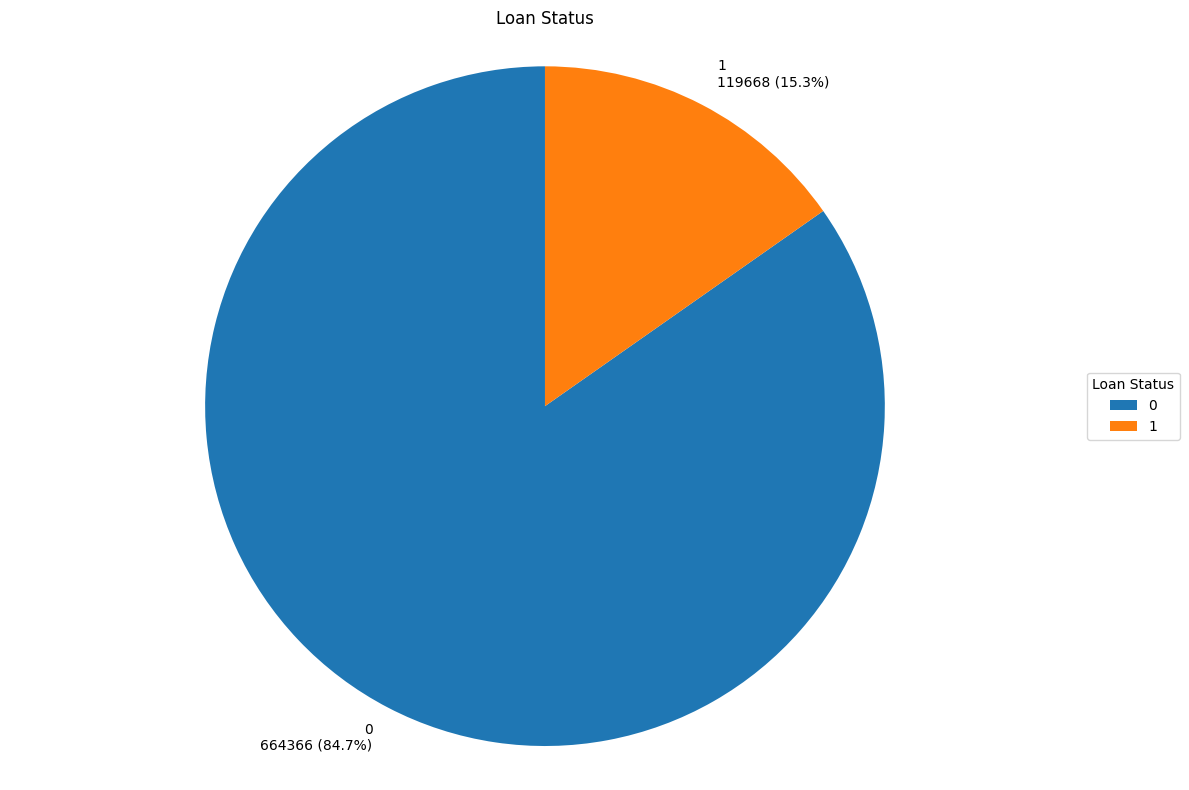

In [ ]:
# loan_status의 개수와 비율 계산
loan_status_counts = lending_club['loan_status'].value_counts()
loan_status_percentages = loan_status_counts / len(lending_club) * 100

# 레이블 생성 (카테고리명, 개수, 비율)
labels = [f'{index}\n{count} ({percentage:.1f}%)'
          for index, count, percentage in
          zip(loan_status_counts.index, loan_status_counts, loan_status_percentages)]

# 원그래프 생성
plt.figure(figsize=(12, 8))
plt.pie(loan_status_counts, labels=labels, autopct='', startangle=90)
plt.title('Loan Status')
plt.axis('equal')

# 범례 추가
plt.legend(loan_status_counts.index, title="Loan Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

## 2-2) 오브젝트 데이터 처리

dtypes: float64(68), int64(1), object(17)

오브젝트 변수를 활용하기 위해 하나씩 체크하며 변수 변환 후 검정 실행

In [ ]:
# lending_club의 데이터 중 오브젝트로 이루어진 컬럼
# 총 17개
lending_club.select_dtypes(include='object')

term                    emp_title emp_length home_ownership  \
0         36 months                      leadman  10+ years       MORTGAGE   
1         36 months                     Engineer  10+ years       MORTGAGE   
3         60 months  Information Systems Officer  10+ years       MORTGAGE   
4         60 months          Contract Specialist    3 years       MORTGAGE   
5         36 months         Veterinary Tecnician    4 years           RENT   
...             ...                          ...        ...            ...   
2260694   60 months                Unit Operator    7 years       MORTGAGE   
2260695   60 months       Database Administrator  10+ years       MORTGAGE   
2260696   60 months              Vice President     9 years       MORTGAGE   
2260697   60 months              Program Manager    6 years           RENT   
2260698   60 months  Customer Service Technician  10+ years       MORTGAGE   

        verification_status     issue_d  \
0              Not Verified  2015-12-01   
1              Not Verified  2015-12-01   
3           Source Verified  2015-12-01   
4           Source Verified  2015-12-01   
5           Source Verified  2015-12-01   
...                     ...         ...   
2260694     Source Verified  2016-10-01   
2260695        Not Verified  2016-10-01   
2260696            Verified  2016-10-01   
2260697        Not Verified  2016-10-01   
2260698            Verified  2016-10-01   

                                                       url desc  \
0        https://lendingclub.com/browse/loanDetail.acti...  NaN   
1        https://lendingclub.com/browse/loanDetail.acti...  NaN   
3        https://lendingclub.com/browse/loanDetail.acti...  NaN   
4        https://lendingclub.com/browse/loanDetail.acti...  NaN   
5        https://lendingclub.com/browse/loanDetail.acti...  NaN   
...                                                    ...  ...   
2260694  https://lendingclub.com/browse/loanDetail.acti...  NaN   
2260695  https://lendingclub.com/browse/loanDetail.acti...  NaN   
2260696  https://lendingclub.com/browse/loanDetail.acti...  NaN   
2260697  https://lendingclub.com/browse/loanDetail.acti...  NaN   
2260698  https://lendingclub.com/browse/loanDetail.acti...  NaN   

                    purpose               title zip_code addr_state  \
0        debt_consolidation  Debt consolidation    190xx         PA   
1            small_business            Business    577xx         SD   
3        debt_consolidation  Debt consolidation    076xx         NJ   
4            major_purchase      Major purchase    174xx         PA   
5        debt_consolidation  Debt consolidation    300xx         GA   
...                     ...                 ...      ...        ...   
2260694    home_improvement    Home improvement    356xx         AL   
2260695  debt_consolidation  Debt consolidation    840xx         UT   
2260696  debt_consolidation                 NaN    907xx         CA   
2260697  debt_consolidation  Debt consolidation    334xx         FL   
2260698  debt_consolidation                 NaN    770xx         TX   

        earliest_cr_line initial_list_status application_type  \
0               Aug-2003                   w       Individual   
1               Dec-1999                   w       Individual   
3               Sep-2008                   w       Individual   
4               Jun-1998                   w       Individual   
5               Oct-1987                   w       Individual   
...                  ...                 ...              ...   
2260694         Dec-1999                   f       Individual   
2260695         Feb-1991                   f       Individual   
2260696         Feb-1995                   f       Individual   
2260697         Jul-1999                   f       Individual   
2260698         Jun-1996                   w       Individual   

        disbursement_method  
0                      Cash  
1                      Cash  
3                      Cash  
4 

In [ ]:
# lending_club의 데이터 중 오브젝트로 이루어진 컬럼 항목을 리스트로 받아옴
obj_columns = lending_club.select_dtypes(include='object').columns.to_list()

obj_columns

['term',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'disbursement_method']

- 'term'
대출금 지불 횟수. 값은 월 단위이며 36 또는 60일 수 있습니다.

- 'emp_title'
대출 신청 시 차용자가 제공한 직위.*

- 'emp_length'
고용 기간(년)입니다. 가능한 값은 0에서 10 사이입니다. 여기서 0은 1년 미만을 의미하고 10은 10년 이상을 의미합니다.

- 'home_ownership'
등록 시 차용인이 제공하거나 신용 보고서에서 얻은 주택 소유권 상태입니다. 값: 임대, 소유, 모기지, 기타

- 'verification_status'
LC에서 소득을 확인했는지, 확인하지 않았는지, 소득원이 확인되었는지를나타냅니다.

- 'issue_d'
대출금이 조달된 달 * 2015~2016

- 'loan_status'
대출현황 - label

- 'url'
목록 데이터가 포함된 LC 페이지의 URL입니다.

- 'desc'
차용인이 제공한 대출 설명

- 'purpose'
대출 요청에 대해 차용인이 제공한 카테고리입니다.

- 'title'
차용인이 제공한 대출 제목

- 'zip_code'
대출 신청서에 차용인이 제공한 우편번호의 처음 3자리 숫자입니다.

- 'addr_state'
대출 신청서에 차용인이 제공한 주

- 'earliest_cr_line'
차용인이 가장 먼저 보고한 신용 한도가 개설된 달

- 'initial_list_status'
대출의 초기 상장 상태입니다. 가능한 값은 - W, F입니다.

- 'disbursement_method'
차용인이 대출을 받는 방법입니다. 가능한 값은 CASH, DIRECT_PAY입니다.

In [ ]:
# term : 값이 2개
lending_club['term'].unique()

# int 타입으로 변환
lending_club['term'] = lending_club['term'].str.replace(' months', '')
lending_club['term'] = lending_club['term'].astype(int)

# test
lending_club_test['term'] = lending_club_test['term'].str.replace(' months', '')
lending_club_test['term'] = lending_club_test['term'].astype(int)

lending_club['term'].unique()

array([36, 60])

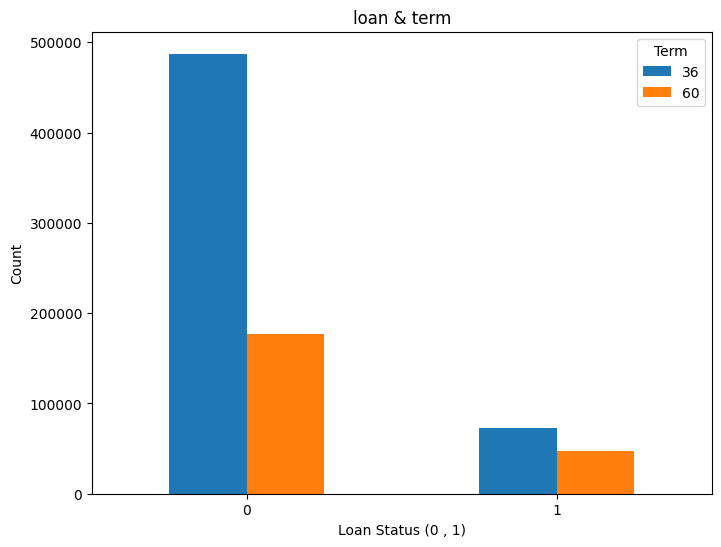

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'loan_status'와 'term' 조합에 따른 데이터 개수 계산
term_counts = lending_club.groupby(['loan_status', 'term'])['term'].count().unstack()

# seaborn barplot 생성
term_counts.plot(kind='bar', figsize=(8, 6))
plt.title('loan & term')
plt.xlabel('Loan Status (0 , 1)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Term')
plt.show()

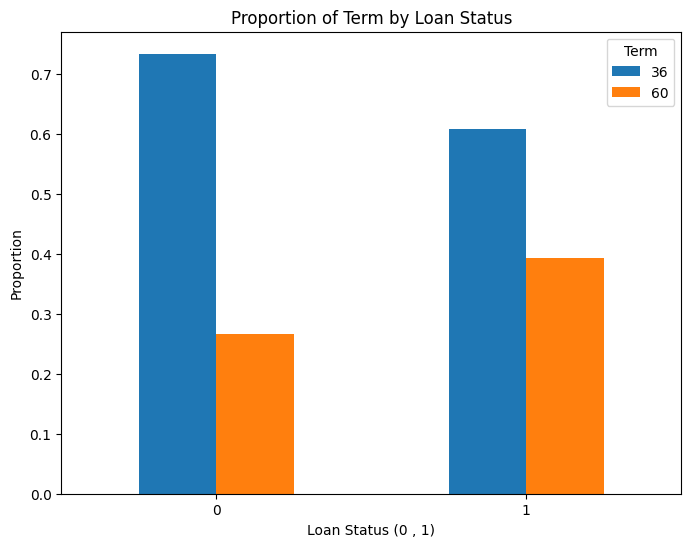

In [ ]:
# 불균형 데이터라 분포 비교가 쉽지 않음 -> 비율로 시각화

# 'loan_status'와 'term' 조합에 따른 데이터 비율 계산
term_ratios = lending_club.groupby(['loan_status', 'term'])['term'].count().unstack()
term_ratios = term_ratios.apply(lambda x: x / x.sum(), axis=1)

# seaborn barplot 생성
term_ratios.plot(kind='bar', figsize=(8, 6))
plt.title('Proportion of Term by Loan Status')
plt.xlabel('Loan Status (0 , 1)')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Term')
plt.show()

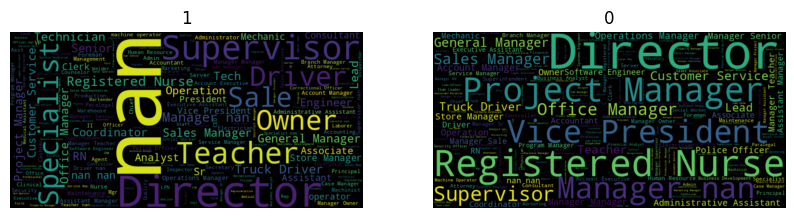

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# loan_status 값이 1인 경우의 emp_title 워드클라우드
loan_1_text = ' '.join(lending_club[lending_club['loan_status'] == 1]['emp_title'].astype(str).tolist())
loan_1_wordcloud = WordCloud(width=800, height=400).generate(loan_1_text)

# loan_status 값이 0인 경우의 emp_title 워드클라우드
loan_0_text = ' '.join(lending_club[lending_club['loan_status'] == 0]['emp_title'].astype(str).tolist())
loan_0_wordcloud = WordCloud(width=800, height=400).generate(loan_0_text)

# 워드클라우드 출력
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(loan_1_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('1')

plt.subplot(1, 2, 2)
plt.imshow(loan_0_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('0')

plt.show()

test 데이터에서 예외처리하는 변수가 너무 많음 컬럼삭제
-> LabelEncoder 대신 OrdinalEncoder을 사용할 것

In [ ]:
# # emp_title
# print(lending_club['emp_title'].unique(), lending_club['emp_title'].nunique())

# # 데이터 값이 많음, 원핫인코딩을 할 경우 컬럼 수가 너무 많아짐
# # label encoding 사용

# # lable encoding
# le_empt = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=99, encoded_missing_value=999)
# le_empt.fit(lending_club['emp_title'])

# # 인코딩한 데이터로 변환
# lending_club['emp_title'] = le_empt.transform(lending_club['emp_title'])

# # test
# lending_club_test['emp_title'] = le_empt.transform(lending_club_test['emp_title'])


# # 확인
# print(lending_club['emp_title'].unique(), lending_club['emp_title'].nunique(), lending_club['emp_length'].dtype)

lending_club.drop(columns=['emp_title'],inplace=True)
lending_club_test.drop(columns=['emp_title'],inplace=True)

# 확인
lending_club.columns.nunique()


85

In [ ]:
# emp_length
print(lending_club['emp_length'].unique(), lending_club['emp_length'].nunique())

# emp_length 결측치 확인
lending_club['emp_length'].isnull().sum()

# 결측치를 0으로 채움
lending_club['emp_length'] = lending_club['emp_length'].fillna('0')

# 공백과 'years' , '+', '<' 문자 제거 후 인트 타입으로 변환
lending_club['emp_length'] = lending_club['emp_length'].str.replace('< 1 year', '0') # 1년 미만은 0
lending_club['emp_length'] = lending_club['emp_length'].str.replace(' ', '')
lending_club['emp_length'] = lending_club['emp_length'].str.replace('years', '')
lending_club['emp_length'] = lending_club['emp_length'].str.replace('year', '')
lending_club['emp_length'] = lending_club['emp_length'].str.replace('+', '')
lending_club['emp_length'] = lending_club['emp_length'].astype(int)

# test
lending_club_test['emp_length'] = lending_club_test['emp_length'].fillna('0')
lending_club_test['emp_length'] = lending_club_test['emp_length'].str.replace('< 1 year', '0') # 1년 미만은 0
lending_club_test['emp_length'] = lending_club_test['emp_length'].str.replace(' ', '')
lending_club_test['emp_length'] = lending_club_test['emp_length'].str.replace('years', '')
lending_club_test['emp_length'] = lending_club_test['emp_length'].str.replace('year', '')
lending_club_test['emp_length'] = lending_club_test['emp_length'].str.replace('+', '')

lending_club_test['emp_length'] = lending_club_test['emp_length'].astype(int)

# 확인
print(lending_club['emp_length'].unique(), lending_club['emp_length'].nunique(), lending_club['emp_length'].dtype)


['10+ years' '3 years' '4 years' '6 years' '1 year' '7 years' '8 years'
 '5 years' '2 years' '9 years' '< 1 year' nan] 11
[10  3  4  6  1  7  8  5  2  9  0] 11 int64


<Figure size 1200x800 with 0 Axes>

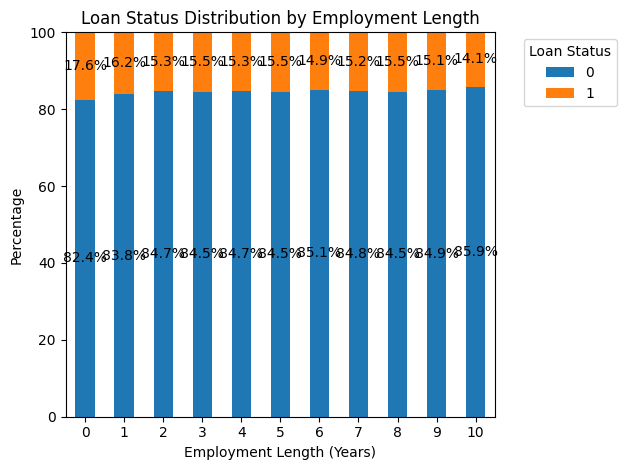

In [ ]:
# emp_length와 loan_status의 교차표 생성
cross_tab = pd.crosstab(lending_club['emp_length'], lending_club['loan_status'], normalize='index')

# 백분율로 변환 (0-1 값을 0-100으로)
cross_tab = cross_tab * 100

# 막대 그래프 생성
plt.figure(figsize=(12, 8))
cross_tab.plot(kind='bar', stacked=True)

plt.title('Loan Status Distribution by Employment Length')
plt.xlabel('Employment Length (Years)')
plt.ylabel('Percentage')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

# y축을 0부터 100까지 표시
plt.ylim(0, 100)

# 각 막대 위에 퍼센트 표시
for c in plt.gca().containers:
    plt.gca().bar_label(c, fmt='%.1f%%', label_type='center')

plt.tight_layout()
plt.show()

In [ ]:
# home_ownership
print(lending_club['home_ownership'].unique(), lending_club['home_ownership'].nunique())

# 'ANY' = 0, 'RENT '= 1, 'MORTGAGE' = 2, 'OWN' = 3
lending_club['home_ownership'] = lending_club['home_ownership'].map({'ANY': 0, 'RENT': 1, 'MORTGAGE': 2, 'OWN': 3})

# test
lending_club_test['home_ownership'] = lending_club_test['home_ownership'].map({'ANY': 0, 'RENT': 1, 'MORTGAGE': 2, 'OWN': 3})

# 확인
print(lending_club['home_ownership'].unique(), lending_club['home_ownership'].nunique(), lending_club['home_ownership'].dtype)

['MORTGAGE' 'RENT' 'OWN' 'ANY'] 4
[2 1 3 0] 4 int64


-> OWN, MORTGAGE, RENT, ANY 순으로 지불 능력이 높을 것으로 예상

<Figure size 1200x800 with 0 Axes>

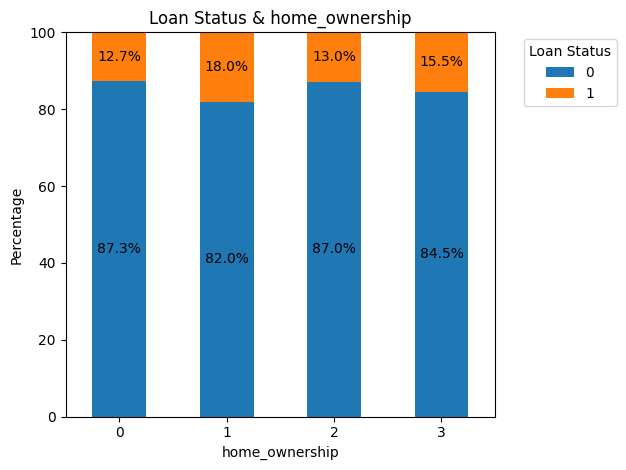

In [ ]:
# home_ownership와 loan_status의 교차표 생성
cross_tab = pd.crosstab(lending_club['home_ownership'], lending_club['loan_status'], normalize='index')

# 백분율로 변환 (0-1 값을 0-100으로)
cross_tab = cross_tab * 100

# 막대 그래프 생성
plt.figure(figsize=(12, 8))
cross_tab.plot(kind='bar', stacked=True)

plt.title('Loan Status & home_ownership')
plt.xlabel('home_ownership')
plt.ylabel('Percentage')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

# y축을 0부터 100까지 표시
plt.ylim(0, 100)

# 각 막대 위에 퍼센트 표시
for c in plt.gca().containers:
    plt.gca().bar_label(c, fmt='%.1f%%', label_type='center')

plt.tight_layout()
plt.show()

Feedback : 분포를 먼저 확인하고 각 항목의 데이터 수도 비교할 것

In [ ]:
# verification_status
print(lending_club['verification_status'].unique(), lending_club['verification_status'].nunique())

# 'Not Verified' = 0, 'Source Verified' = 1, 'Verified' = 2
lending_club['verification_status'] = lending_club['verification_status'].map({'Not Verified': 0, 'Source Verified': 1, 'Verified': 2})

# test
lending_club_test['verification_status'] = lending_club_test['verification_status'].map({'Not Verified': 0, 'Source Verified': 1, 'Verified': 2})

# 확인
print(lending_club['verification_status'].unique(), lending_club['verification_status'].nunique(), lending_club['verification_status'].dtype)

['Not Verified' 'Source Verified' 'Verified'] 3
[0 1 2] 3 int64


<Figure size 1200x800 with 0 Axes>

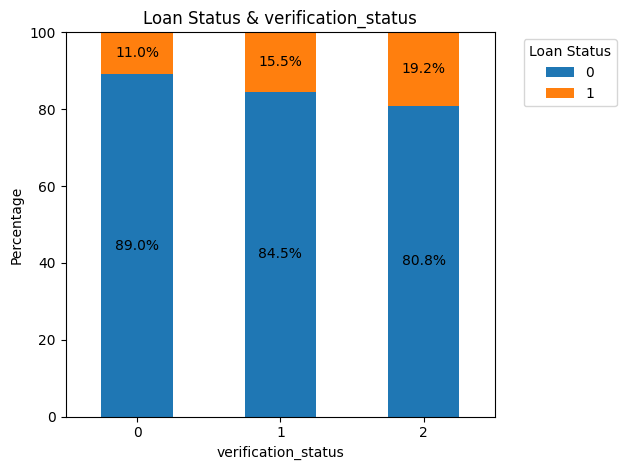

In [ ]:
# verification_status와 loan_status의 교차표 생성
cross_tab = pd.crosstab(lending_club['verification_status'], lending_club['loan_status'], normalize='index')

# 백분율로 변환 (0-1 값을 0-100으로)
cross_tab = cross_tab * 100

# 막대 그래프 생성
plt.figure(figsize=(12, 8))
cross_tab.plot(kind='bar', stacked=True)

plt.title('Loan Status & verification_status')
plt.xlabel('verification_status')
plt.ylabel('Percentage')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

# y축을 0부터 100까지 표시
plt.ylim(0, 100)

# 각 막대 위에 퍼센트 표시
for c in plt.gca().containers:
    plt.gca().bar_label(c, fmt='%.1f%%', label_type='center')

plt.tight_layout()
plt.show()

In [ ]:
# 날짜 데이터 한번에 처리

# # issue_d
# print(lending_club['issue_d'].unique(), lending_club['issue_d'].nunique())

# # 월별 or 라벨인코딩

# # lable encoding
# le_issue = LabelEncoder()
# le_issue.fit(lending_club['issue_d'])

# # 인코딩한 데이터로 변환
# lending_club['issue_d'] = le_issue.transform(lending_club['issue_d'])

# # 확인
# print(lending_club['issue_d'].unique(), lending_club['issue_d'].nunique(), lending_club['issue_d'].dtype)

In [ ]:
# 타겟 정의 앞으로 이동
# url
print(lending_club['url'].unique(), lending_club['url'].nunique())

# 사용 불가 데이터 / url 컬럼 삭제
lending_club.drop(columns=['url'],inplace=True)
lending_club_test.drop(columns=['url'],inplace=True)
# 확인
lending_club.columns.nunique()

['https://lendingclub.com/browse/loanDetail.action?loan_id=68407277'
 'https://lendingclub.com/browse/loanDetail.action?loan_id=68355089'
 'https://lendingclub.com/browse/loanDetail.action?loan_id=66310712' ...
 'https://lendingclub.com/browse/loanDetail.action?loan_id=88985880'
 'https://lendingclub.com/browse/loanDetail.action?loan_id=88224441'
 'https://lendingclub.com/browse/loanDetail.action?loan_id=88215728'] 784034


84

In [ ]:
# 타겟 정의 앞으로 이동
# desc
# print(lending_club['desc'].unique(), lending_club['desc'].nunique())
lending_club['desc'].nunique()
lending_club['desc'].isnull().sum()

# 결측치가 너무 많음 / desc 컬럼 삭제
lending_club.drop(columns=['desc'],inplace=True)
lending_club_test.drop(columns=['desc'],inplace=True)

# 확인
lending_club.columns.nunique()

83

<Figure size 1200x2000 with 0 Axes>

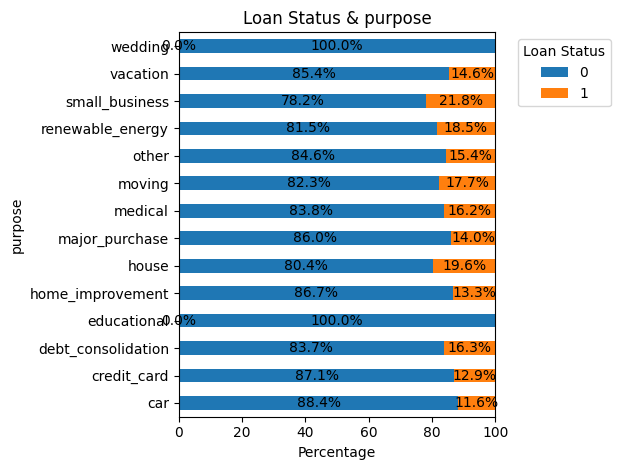

In [ ]:
# purpose & loan_status의 교차표 생성
cross_tab = pd.crosstab(lending_club['purpose'], lending_club['loan_status'], normalize='index')

# 백분율로 변환 (0-1 값을 0-100으로)
cross_tab = cross_tab * 100

# 막대 그래프 생성 (가로 막대 그래프)
plt.figure(figsize=(12, 20))
cross_tab.plot(kind='barh', stacked=True)

plt.title('Loan Status & purpose')
plt.xlabel('Percentage')
plt.ylabel('purpose')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# y축을 0부터 100까지 표시
plt.xlim(0, 100)

# 각 막대 위에 퍼센트 표시
for c in plt.gca().containers:
    plt.gca().bar_label(c, fmt='%.1f%%', label_type='center')

plt.tight_layout()
plt.show()

FeedBack : train 안에서 비율을 정렬한 후 맵핑하는 방법도 고려

In [ ]:
# purpose
print(lending_club['purpose'].unique(), lending_club['purpose'].nunique())

# lable encoding
le_purpose = LabelEncoder()
le_purpose.fit(lending_club['purpose'])

# 인코딩한 데이터로 변환
lending_club['purpose'] = le_purpose.transform(lending_club['purpose'])

# test
lending_club_test['purpose'] = le_purpose.transform(lending_club_test['purpose'])

# 확인
print(lending_club['purpose'].unique(), lending_club['purpose'].nunique(), lending_club['purpose'].dtype)


['debt_consolidation' 'small_business' 'major_purchase' 'credit_card'
 'other' 'home_improvement' 'house' 'vacation' 'car' 'medical' 'moving'
 'renewable_energy' 'wedding' 'educational'] 14
[ 2 11  6  1  9  4  5 12  0  7  8 10 13  3] 14 int64


<Figure size 1200x2000 with 0 Axes>

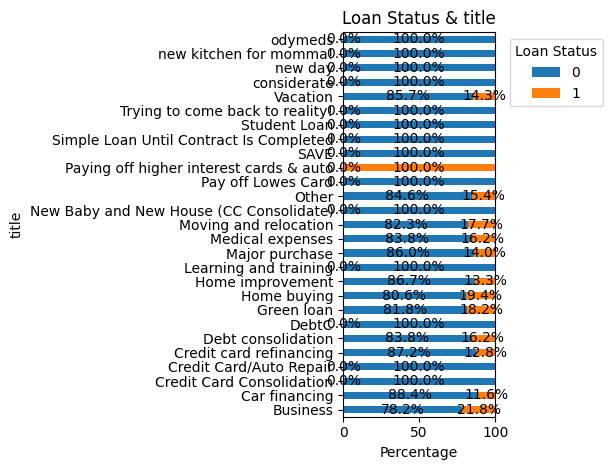

In [ ]:
# title과 loan_status의 교차표 생성
cross_tab = pd.crosstab(lending_club['title'], lending_club['loan_status'], normalize='index')

# 백분율로 변환 (0-1 값을 0-100으로)
cross_tab = cross_tab * 100

# 막대 그래프 생성 (가로 막대 그래프)
plt.figure(figsize=(12, 20))
cross_tab.plot(kind='barh', stacked=True)

plt.title('Loan Status & title')
plt.xlabel('Percentage')
plt.ylabel('title')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# y축을 0부터 100까지 표시
plt.xlim(0, 100)

# 각 막대 위에 퍼센트 표시
for c in plt.gca().containers:
    plt.gca().bar_label(c, fmt='%.1f%%', label_type='center')

plt.tight_layout()
plt.show()

FeedBack : train 안에서 비율을 정렬한 후 맵핑하는 방법도 고려

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# title
print(lending_club['title'].unique(), lending_club['title'].nunique())

# lable encoding
le_title = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=99, encoded_missing_value=999)
le_title.fit(lending_club[['title']])

# 인코딩한 데이터로 변환
lending_club[['title']] = le_title.transform(lending_club[['title']])

# test
lending_club_test[['title']] = le_title.transform(lending_club_test[['title']])


# 확인
print(lending_club['title'].unique(), lending_club['title'].nunique(), lending_club['title'].dtype)

[ 5  0 11  4 27  9 15  8 22  1 12 13  7 26 18 10 24 21 23 17 19 16 25  6
 14  3 20  2] 28
[ 5.  0. 11.  4. 27.  9. 15.  8. 22.  1. 12. 13.  7. 26. 18. 10. 24. 21.
 23. 17. 19. 16. 25.  6. 14.  3. 20.  2.] 28 float64


In [ ]:
# zip_code
print(lending_club['zip_code'].unique(), lending_club['zip_code'].nunique())

# '___xx' 제거 후 인트 타입으로 변환
lending_club['zip_code'] = lending_club['zip_code'].str.replace('xx', '')
lending_club['zip_code'] = lending_club['zip_code'].astype(int)

# test
lending_club_test['zip_code'] = lending_club_test['zip_code'].str.replace('xx', '')
lending_club_test['zip_code'] = lending_club_test['zip_code'].astype(int)

# 확인
print(lending_club['zip_code'].unique(), lending_club['zip_code'].nunique(), lending_club['zip_code'].dtype)

['190xx' '577xx' '076xx' '174xx' '300xx' '550xx' '293xx' '160xx' '029xx'
 '290xx' '786xx' '275xx' '916xx' '299xx' '226xx' '856xx' '117xx' '462xx'
 '219xx' '297xx' '100xx' '214xx' '750xx' '672xx' '125xx' '880xx' '238xx'
 '114xx' '993xx' '636xx' '215xx' '441xx' '710xx' '606xx' '331xx' '945xx'
 '984xx' '761xx' '142xx' '493xx' '430xx' '330xx' '231xx' '707xx' '644xx'
 '376xx' '471xx' '200xx' '015xx' '453xx' '019xx' '347xx' '546xx' '351xx'
 '852xx' '210xx' '322xx' '112xx' '440xx' '460xx' '967xx' '054xx' '128xx'
 '958xx' '220xx' '350xx' '472xx' '085xx' '197xx' '774xx' '787xx' '447xx'
 '752xx' '434xx' '670xx' '016xx' '381xx' '236xx' '850xx' '482xx' '070xx'
 '030xx' '023xx' '280xx' '436xx' '432xx' '346xx' '660xx' '681xx' '661xx'
 '439xx' '431xx' '064xx' '973xx' '477xx' '377xx' '301xx' '349xx' '323xx'
 '282xx' '986xx' '245xx' '910xx' '544xx' '461xx' '136xx' '355xx' '207xx'
 '448xx' '913xx' '551xx' '498xx' '481xx' '357xx' '211xx' '088xx' '334xx'
 '327xx' '111xx' '926xx' '805xx' '138xx' '930xx' '7

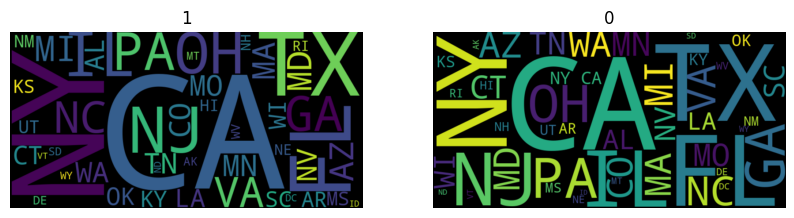

In [ ]:
# loan_status 값이 1인 경우의 addr_state 워드클라우드
loan_1_text = ' '.join(lending_club[lending_club['loan_status'] == 1]['addr_state'].astype(str).tolist())
loan_1_wordcloud = WordCloud(width=800, height=400).generate(loan_1_text)

# loan_status 값이 0인 경우의 addr_state 워드클라우드
loan_0_text = ' '.join(lending_club[lending_club['loan_status'] == 0]['addr_state'].astype(str).tolist())
loan_0_wordcloud = WordCloud(width=800, height=400).generate(loan_0_text)

# 워드클라우드 출력
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(loan_1_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('1')

plt.subplot(1, 2, 2)
plt.imshow(loan_0_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('0')

plt.show()

FeedBack : wordcloud는 너무 직관에 의존하는 방법, 그래프도 같이 확인

In [ ]:
# addr_state
print(lending_club['addr_state'].unique(), lending_club['addr_state'].nunique())

# lable encoding
le_addr = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=99, encoded_missing_value=999)
le_addr.fit(lending_club[['addr_state']])

# 인코딩한 데이터로 변환
lending_club[['addr_state']] = le_addr.transform(lending_club[['addr_state']])

# test
lending_club_test[['addr_state']] = le_addr.transform(lending_club_test[['addr_state']])

# 확인
print(lending_club['addr_state'].unique(), lending_club['addr_state'].nunique(), lending_club['addr_state'].dtype)

['PA' 'SD' 'NJ' 'GA' 'MN' 'SC' 'RI' 'TX' 'NC' 'CA' 'VA' 'AZ' 'NY' 'IN'
 'MD' 'KS' 'NM' 'WA' 'MO' 'OH' 'LA' 'IL' 'FL' 'MI' 'TN' 'DC' 'MA' 'WI'
 'AL' 'HI' 'VT' 'DE' 'NH' 'NE' 'CT' 'OR' 'CO' 'AR' 'NV' 'WV' 'MT' 'WY'
 'OK' 'KY' 'MS' 'ME' 'UT' 'ND' 'AK' 'ID'] 50
[37. 40. 30. 10. 22. 39. 38. 42. 26.  4. 44.  3. 33. 14. 19. 15. 31. 46.
 23. 34. 17. 13.  9. 21. 41.  7. 18. 47.  1. 11. 45.  8. 29. 28.  6. 36.
  5.  2. 32. 48. 25. 49. 35. 16. 24. 20. 43. 27.  0. 12.] 50 float64


In [ ]:
# earliest_cr_line 신용한도가 개설된 달
print(lending_club['earliest_cr_line'].unique(), lending_club['earliest_cr_line'].nunique())

# earliest_cr_line 날짜로 변환
lending_club['earliest_cr_line'] = pd.to_datetime(lending_club['earliest_cr_line'], format='%b-%Y')
lending_club_test['earliest_cr_line'] = pd.to_datetime(lending_club_test['earliest_cr_line'], format='%b-%Y')


# 파생변수

# 대출금 조달 일 - 신용한도 개설된 달
lending_club['cr_line_diff'] = pd.to_datetime(lending_club['issue_d'], format='%Y-%m-%d') - lending_club['earliest_cr_line']
lending_club_test['cr_line_diff'] = pd.to_datetime(lending_club_test['issue_d'], format='%Y-%m-%d') - lending_club_test['earliest_cr_line']

# 날짜를 숫자로 변환
lending_club['cr_line_diff'] = lending_club['cr_line_diff'].dt.days
lending_club_test['cr_line_diff'] = lending_club_test['cr_line_diff'].dt.days

# earliest_cr_line의 연도만 남김
lending_club['earliest_cr_line'] = lending_club['earliest_cr_line'].dt.year
lending_club_test['earliest_cr_line'] = lending_club_test['earliest_cr_line'].dt.year

# earliest_cr_line int로 변환
lending_club['earliest_cr_line'] = lending_club['earliest_cr_line'].astype(int)
lending_club_test['earliest_cr_line'] = lending_club_test['earliest_cr_line'].astype(int)

# 확인
print(lending_club['cr_line_diff'].unique(), lending_club['cr_line_diff'].nunique(), lending_club['cr_line_diff'].dtype)

['Aug-2003' 'Dec-1999' 'Sep-2008' 'Jun-1998' 'Oct-1987' 'Jun-1990'
 'Feb-1999' 'Apr-2002' 'Nov-1994' 'Apr-1995' 'Feb-1988' 'Jun-1996'
 'Jun-2005' 'May-1984' 'Dec-2001' 'Nov-1993' 'Sep-2001' 'Mar-2005'
 'May-2004' 'Jun-1991' 'May-2000' 'Oct-2011' 'May-1994' 'Jul-2011'
 'May-1991' 'May-2001' 'Jun-2002' 'Apr-2007' 'Feb-2002' 'Jun-1997'
 'Oct-1996' 'Jan-2005' 'Jul-2001' 'Aug-2004' 'Jun-2007' 'Jul-2004'
 'Oct-2004' 'May-1992' 'Oct-1999' 'Nov-2001' 'Oct-2005' 'Jan-2001'
 'Sep-2004' 'Sep-1993' 'Nov-2005' 'Feb-1989' 'Sep-2006' 'Oct-1982'
 'Oct-2002' 'Feb-1990' 'Aug-1987' 'Oct-1998' 'Apr-2001' 'Aug-2001'
 'Feb-2004' 'Aug-2009' 'Nov-1999' 'Jun-2001' 'Jun-2006' 'Jun-2000'
 'Jan-2007' 'Dec-1998' 'Aug-1997' 'Dec-1987' 'Feb-1996' 'Apr-1990'
 'Jun-2004' 'Jun-1995' 'Dec-2002' 'Aug-1986' 'Nov-2002' 'Oct-2006'
 'Sep-2000' 'Feb-2012' 'Apr-2005' 'Sep-1994' 'Apr-1993' 'Sep-2007'
 'Jan-1998' 'May-2008' 'Mar-2001' 'Apr-1994' 'Apr-2003' 'Jan-2002'
 'Jan-2011' 'Nov-2000' 'Sep-2002' 'Nov-2003' 'Sep-2003' 'Aug-2

<Figure size 1200x2000 with 0 Axes>

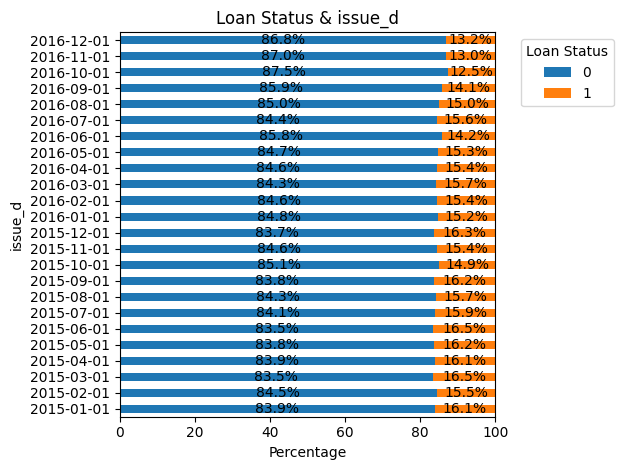

In [ ]:
# issue_d & loan_status의 교차표 생성
cross_tab = pd.crosstab(lending_club['issue_d'], lending_club['loan_status'], normalize='index')

# 백분율로 변환 (0-1 값을 0-100으로)
cross_tab = cross_tab * 100

# 막대 그래프 생성 (가로 막대 그래프)
plt.figure(figsize=(12, 20))
cross_tab.plot(kind='barh', stacked=True)

plt.title('Loan Status & issue_d')
plt.xlabel('Percentage')
plt.ylabel('issue_d')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# y축을 0부터 100까지 표시
plt.xlim(0, 100)

# 각 막대 위에 퍼센트 표시
for c in plt.gca().containers:
    plt.gca().bar_label(c, fmt='%.1f%%', label_type='center')

plt.tight_layout()
plt.show()

- 2015년부터 2016년까지 감소 추세

In [ ]:
# issue_d
print(lending_club['issue_d'].unique(), lending_club['issue_d'].nunique())

# 연도별 or 월별 or 라벨인코딩

# 날짜를 정렬한 후, 숫자로 맵핑
lending_club['issue_d'] = lending_club['issue_d'].rank(method='dense').astype(int) - 1
lending_club_test['issue_d'] = lending_club_test['issue_d'].rank(method='dense').astype(int) - 1

# 확인
print(lending_club['issue_d'].unique(), lending_club['issue_d'].nunique(), lending_club['issue_d'].dtype)

['2015-12-01' '2015-11-01' '2015-10-01' '2015-09-01' '2015-08-01'
 '2015-07-01' '2015-06-01' '2015-05-01' '2015-04-01' '2015-03-01'
 '2015-02-01' '2015-01-01' '2016-06-01' '2016-05-01' '2016-04-01'
 '2016-03-01' '2016-02-01' '2016-01-01' '2016-09-01' '2016-08-01'
 '2016-07-01' '2016-12-01' '2016-11-01' '2016-10-01'] 24
[11 10  9  8  7  6  5  4  3  2  1  0 17 16 15 14 13 12 20 19 18 23 22 21] 24 int64


<Figure size 1200x800 with 0 Axes>

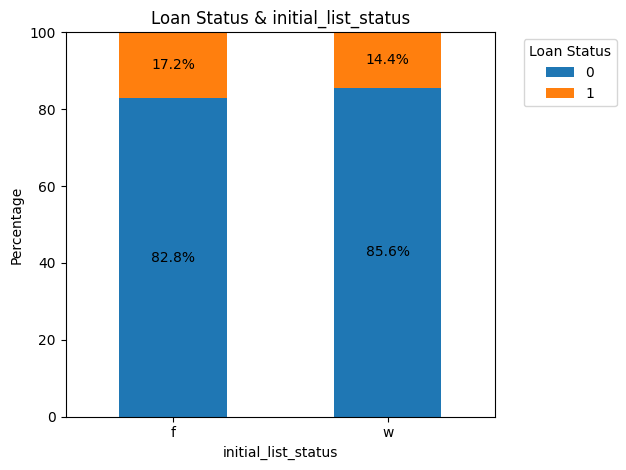

In [ ]:
# initial_list_status & loan_status의 교차표 생성
cross_tab = pd.crosstab(lending_club['initial_list_status'], lending_club['loan_status'], normalize='index')

# 백분율로 변환 (0-1 값을 0-100으로)
cross_tab = cross_tab * 100

# 막대 그래프 생성
plt.figure(figsize=(12, 8))
cross_tab.plot(kind='bar', stacked=True)

plt.title('Loan Status & initial_list_status')
plt.xlabel('initial_list_status')
plt.ylabel('Percentage')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

# y축을 0부터 100까지 표시
plt.ylim(0, 100)

# 각 막대 위에 퍼센트 표시
for c in plt.gca().containers:
    plt.gca().bar_label(c, fmt='%.1f%%', label_type='center')

plt.tight_layout()
plt.show()

In [ ]:
# initial_list_status 대출의 초기 상장 상태입니다. 가능한 값은 - W, F입니다.
print(lending_club['initial_list_status'].unique(), lending_club['initial_list_status'].nunique())

# label encoding
lending_club['initial_list_status'] = lending_club['initial_list_status'].map({'w': 0, 'f': 1})

# test
lending_club_test['initial_list_status'] = lending_club_test['initial_list_status'].map({'w': 0, 'f': 1})

# 확인
print(lending_club['initial_list_status'].unique(), lending_club['initial_list_status'].nunique(), lending_club['initial_list_status'].dtype)

['w' 'f'] 2
[0 1] 2 int64


<Figure size 1200x800 with 0 Axes>

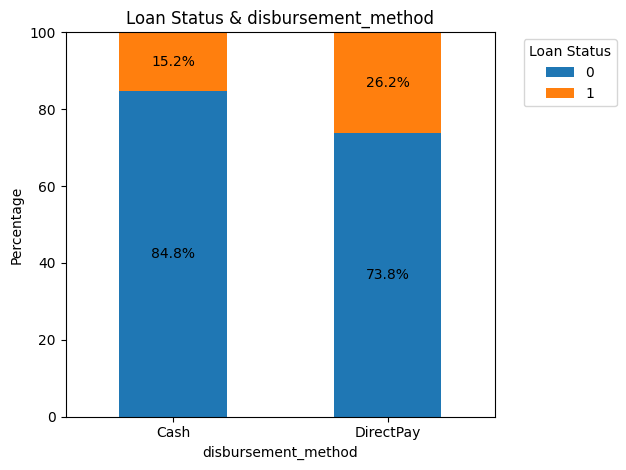

In [ ]:
# disbursement_method & loan_status의 교차표 생성
cross_tab = pd.crosstab(lending_club['disbursement_method'], lending_club['loan_status'], normalize='index')

# 백분율로 변환 (0-1 값을 0-100으로)
cross_tab = cross_tab * 100

# 막대 그래프 생성
plt.figure(figsize=(12, 8))
cross_tab.plot(kind='bar', stacked=True)

plt.title('Loan Status & disbursement_method')
plt.xlabel('disbursement_method')
plt.ylabel('Percentage')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

# y축을 0부터 100까지 표시
plt.ylim(0, 100)

# 각 막대 위에 퍼센트 표시
for c in plt.gca().containers:
    plt.gca().bar_label(c, fmt='%.1f%%', label_type='center')

plt.tight_layout()
plt.show()

In [ ]:
# 'disbursement_method' 차용인이 대출을 받는 방법입니다. 가능한 값은 CASH, DIRECT_PAY입니다.
print(lending_club['disbursement_method'].unique(), lending_club['disbursement_method'].nunique())

# label encoding
lending_club['disbursement_method'] = lending_club['disbursement_method'].map({'Cash': 0, 'DirectPay': 1})

# test
lending_club_test['disbursement_method'] = lending_club_test['disbursement_method'].map({'Cash': 0, 'DirectPay': 1})

# 확인
print(lending_club['disbursement_method'].unique(), lending_club['disbursement_method'].nunique(), lending_club['disbursement_method'].dtype)
print(lending_club_test['disbursement_method'].unique(), lending_club_test['disbursement_method'].nunique(), lending_club_test['disbursement_method'].dtype)

['Cash' 'DirectPay'] 2
[0 1] 2 int64
[0 1] 2 int64


In [ ]:
# application_type
print(lending_club['application_type'].unique(), lending_club['application_type'].nunique())

# 컬럼 삭제
lending_club.drop(columns=['application_type'],inplace=True)
lending_club_test.drop(columns=['application_type'],inplace=True)

# 확인
lending_club.columns.nunique()

['Individual'] 1


83

In [ ]:
lending_club.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784034 entries, 0 to 2260698
Data columns (total 83 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              784034 non-null  int64  
 1   loan_amnt                       784034 non-null  float64
 2   funded_amnt                     784034 non-null  float64
 3   funded_amnt_inv                 784034 non-null  float64
 4   term                            784034 non-null  int64  
 5   installment                     784034 non-null  float64
 6   emp_length                      784034 non-null  int64  
 7   home_ownership                  784034 non-null  int64  
 8   annual_inc                      784034 non-null  float64
 9   verification_status             784034 non-null  int64  
 10  issue_d                         784034 non-null  int64  
 11  loan_status                     784034 non-null  int64  
 12  purpose             

## 2-3) 결측치 확인 및 처리

- 결측치 처리

- a) 다른 변수로부터 계산될 수 있는 변수인가? (파생변수여부)
- b) 만약 분수일 경우 나누는 값이 0 일 경우 nan 값 발생가능성
- c) 단순 누락의 가능성, default 값으로 nan이 입력될 가능성
- d) 다른 변수와의 관련성 -> 높을 경우 모델 예측 값으로 대체가능성
- e) 정규성 체크
- f) 결측치의 비율 ->  40% 이상 제외

In [ ]:
# 데이터프레임에서 결측치 개수 확인
missing_values = lending_club.isnull().sum()

# 결측치가 있는 컬럼 낮은 순으로 정렬
print(missing_values[missing_values > 0].sort_values())

inq_last_6mths                         1
num_rev_accts                          1
revol_util                           385
mths_since_recent_bc                7450
bc_open_to_buy                      7830
percent_bc_gt_75                    8117
bc_util                             8253
mo_sin_old_il_acct                 22092
num_tl_120dpd_2m                   37343
mths_since_recent_inq              83638
open_il_12m                       370365
open_act_il                       370365
inq_fi                            370365
max_bal_bc                        370365
open_rv_12m                       370365
total_bal_il                      370365
open_il_24m                       370365
open_rv_24m                       370365
inq_last_12m                      370366
open_acc_6m                       370366
total_cu_tl                       370366
all_util                          370387
mths_since_last_delinq            375284
mths_since_rcnt_il                381596
il_util         

In [ ]:
# 데이터프레임에서 결측치 개수 확인
missing_values = lending_club_test.isnull().sum()

# 결측치가 있는 컬럼 낮은 순으로 정렬
print(missing_values[missing_values > 0].sort_values())

revol_util                           35
mths_since_recent_bc                564
bc_open_to_buy                      602
percent_bc_gt_75                    621
bc_util                             637
mo_sin_old_il_acct                 1631
num_tl_120dpd_2m                   3119
mths_since_recent_inq              5494
mths_since_last_delinq            28220
open_il_24m                       28507
open_acc_6m                       28507
open_act_il                       28507
open_il_12m                       28507
total_bal_il                      28507
inq_last_12m                      28507
max_bal_bc                        28507
inq_fi                            28507
open_rv_24m                       28507
open_rv_12m                       28507
total_cu_tl                       28507
all_util                          28508
mths_since_rcnt_il                29316
il_util                           32510
mths_since_recent_revol_delinq    37957
mths_since_recent_bc_dlq          44085


In [ ]:
# inq_last_6mths 결측치가 발생한 행 확인 -> 1개
lending_club[lending_club['inq_last_6mths'].isnull()]

# inq_last_6mths 결측치 수, nunique & unique 확인
print(lending_club['inq_last_6mths'].isnull().sum(), lending_club['inq_last_6mths'].nunique(), lending_club['inq_last_6mths'].unique())

# 범주형 데이터 -> 최빈값 확인 후 최빈값으로 대체
print(lending_club['inq_last_6mths'].mode())
lending_club['inq_last_6mths'] = lending_club['inq_last_6mths'].fillna(0)

# 확인
print(lending_club['inq_last_6mths'].isnull().sum(), lending_club['inq_last_6mths'].nunique(), lending_club['inq_last_6mths'].unique())

1 7 [ 1.  4.  0.  3.  2.  5.  6. nan]
0    0.0
Name: inq_last_6mths, dtype: float64
0 7 [1. 4. 0. 3. 2. 5. 6.]


In [ ]:
# test
lending_club_test[lending_club_test['inq_last_6mths'].isnull()]
print(lending_club_test['inq_last_6mths'].isnull().sum(), lending_club_test['inq_last_6mths'].nunique(), lending_club_test['inq_last_6mths'].unique())
print(lending_club_test['inq_last_6mths'].mode())
lending_club_test['inq_last_6mths'] = lending_club_test['inq_last_6mths'].fillna(0)
print(lending_club_test['inq_last_6mths'].isnull().sum(), lending_club_test['inq_last_6mths'].nunique(), lending_club_test['inq_last_6mths'].unique())

0 7 [3. 1. 0. 2. 5. 4. 6.]
0    0.0
Name: inq_last_6mths, dtype: float64
0 7 [3. 1. 0. 2. 5. 4. 6.]


In [ ]:
# num_rev_accts 결측치가 발생한 행 확인 -> 1개
lending_club[lending_club['num_rev_accts'].isnull()]

# num_rev_accts 결측치가 발생한 행의 num_op_rev_tl 값 확인
print(lending_club[lending_club['num_rev_accts'].isnull()]['num_op_rev_tl'])

# 회전계좌 수 -> 개설된 회전계좌 수로 대체
lending_club['num_rev_accts'] = lending_club['num_rev_accts'].fillna(3)

# 확인
print(lending_club['num_rev_accts'].isnull().sum(), lending_club['num_rev_accts'].nunique(), lending_club['num_rev_accts'].unique())

86001    3.0
Name: num_op_rev_tl, dtype: float64
0 98 [  9.  27.  13.  19.   4.  16.   3.  11.  15.  21.  17.  18.   2.   5.
  22.  14.  28.  10.  23.   8.  20.  31.  34.  32.  25.   7.   6.  24.
  12.  39.  45.  29.  36.  26.  30.  55.  33.  80.  57.  35.  40.  49.
  50.  38.  37.  53.  41.  44.  43.  54.  46.  71.  52.  48.  47.  60.
  61.  42.  58.  51.  56.  76.  67.  63.  77.  62.  59.  64.  68.  70.
  74.  79.  75.  65. 118.  82.  66.  69.  81.  72.  73.  84.  86.  92.
  90.  96. 112.  93.  83.  87. 103.  91.  78.  89. 104. 100.  88. 108.]


In [ ]:
# test
lending_club_test[lending_club_test['num_rev_accts'].isnull()]
print(lending_club_test[lending_club_test['num_rev_accts'].isnull()]['num_op_rev_tl'])
lending_club_test['num_rev_accts'] = lending_club_test['num_rev_accts'].fillna(3)
print(lending_club_test['num_rev_accts'].isnull().sum(), lending_club_test['num_rev_accts'].nunique(), lending_club_test['num_rev_accts'].unique())

Series([], Name: num_op_rev_tl, dtype: float64)
0 77 [ 35.  16.  19.  14.  12.   3.   6.  11.   5.  24.  22.  15.  26.  17.
  25.   7.  21.  23.  10.   9.  30.  18.   8.  56.   4.  13.  37.  20.
  33.  29.   2.  31.  27.  28.  36.  32.  41.  38.  40.  44.  48.  59.
  47.  49.  46.  39.  34.  53.  42.  52.  50.  43.  61.  57.  65.  55.
  66.  45.  54.  58.  71.  51.  75.  96.  62.  74.  89.  63. 103.  80.
  77.  60. 102.  68.  64.  67. 101.]


In [ ]:
lending_club['revol_util'].describe()

count    783649.000000
mean         52.098211
std          24.116269
min           0.000000
25%          34.000000
50%          52.100000
75%          70.500000
max         193.000000
Name: revol_util, dtype: float64

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 783649.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test Statistic: 0.9865254282217298, p-value: 3.363478455203845e-93


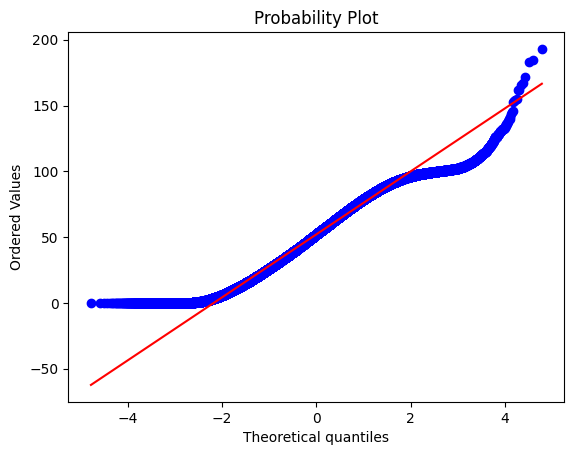

In [ ]:
# qq플롯
qq = lending_club['revol_util'].dropna()
stats.probplot(qq, plot=plt)

# Shapiro-Wilk 테스트를 사용한 정규성 검정
stat, p_value = stats.shapiro(qq)
print(f'Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}')

In [ ]:
# revol_util = (revol_bal / total_rev_hi_lim) * 100 으로 계산될 수 있다.
# nan값의 경우 total_rev_hi_lim의 값이 0인 경우 존재

# revol_util이 NaN이고 total_rev_hi_lim이 0인 경우 0으로 대체
lending_club.loc[(lending_club['revol_util'].isnull()) & (lending_club['total_rev_hi_lim'] == 0), 'revol_util'] = 0

# revol_util이 NaN이고 total_rev_hi_lim이 0이 아닌 경우 계산식 적용
lending_club.loc[(lending_club['revol_util'].isnull()) & (lending_club['total_rev_hi_lim'] != 0), 'revol_util'] = (lending_club['revol_bal'] / lending_club['total_rev_hi_lim']) * 100

# 확인
print(lending_club['revol_util'].isnull().sum(), lending_club['revol_util'].nunique(), lending_club['revol_util'].unique())


0 1319 [29.7        19.2        11.6        ... 95.23913043 98.57567568
 59.62513616]


In [ ]:
# test
lending_club_test.loc[(lending_club_test['revol_util'].isnull()) & (lending_club_test['total_rev_hi_lim'] == 0), 'revol_util'] = 0
lending_club_test.loc[(lending_club_test['revol_util'].isnull()) & (lending_club_test['total_rev_hi_lim'] != 0), 'revol_util'] = (lending_club_test['revol_bal'] / lending_club_test['total_rev_hi_lim']) * 100
print(lending_club_test['revol_util'].isnull().sum(), lending_club_test['revol_util'].nunique(), lending_club_test['revol_util'].unique())

0 1085 [ 58.   54.1  51.2 ... 106.2 108.4 127.1]


In [ ]:
lending_club['revol_util'].describe()

count    784034.000000
mean         52.080451
std          24.135408
min           0.000000
25%          34.000000
50%          52.100000
75%          70.500000
max         193.000000
Name: revol_util, dtype: float64

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 783649.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test Statistic: 0.9865254282217298, p-value: 3.363478455203845e-93


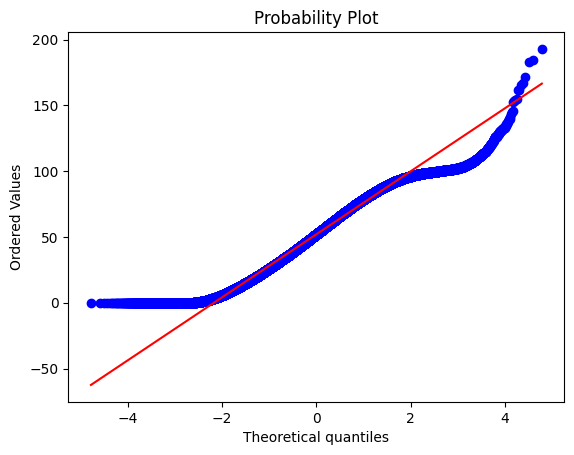

In [ ]:
# qq플롯
stats.probplot(lending_club['revol_util'], plot=plt)

# Shapiro-Wilk 테스트를 사용한 정규성 검정
stat, p_value = stats.shapiro(qq)
print(f'Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}')

In [ ]:
lending_club['bc_util'].describe()

count    775781.000000
mean         60.232413
std          27.936306
min           0.000000
25%          38.800000
50%          63.100000
75%          84.900000
max         318.200000
Name: bc_util, dtype: float64

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 775781.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test Statistic: 0.9551886777571942, p-value: 5.566680539573311e-126


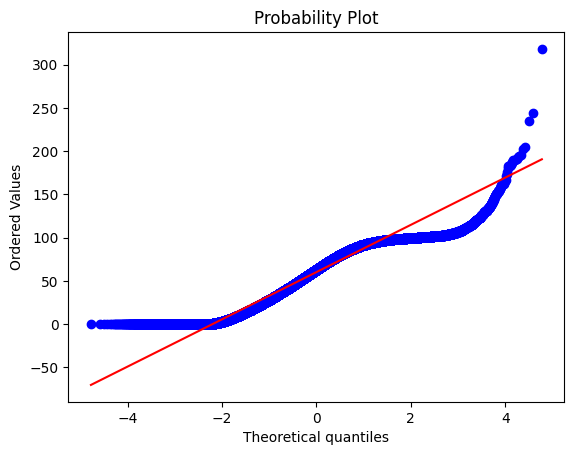

In [ ]:
# qq플롯
qq = lending_club['bc_util'].dropna()
stats.probplot(qq, plot=plt)

# Shapiro-Wilk 테스트를 사용한 정규성 검정
stat, p_value = stats.shapiro(qq)
print(f'Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}')

In [ ]:
# bc_util = 모든 은행 카드 계좌의 현재 잔액 / total_bc_limit
# 컬럼에 모든 은행 카드 계좌의 현재 잔액을 찾을 수 없음

# 1. 모든 계좌의 평균 현재 잔액 * 은행계좌수로 대체하는 방법 -> 값의 왜곡가능성

# 2. 다른 util 값과의 상관성을 이용 -> 값을 유추해 대체 -> 채택

# 3. 대체되지 않는 행 제거 -> 라벨이 1인 91개 데이터 유실

lending_club.loc[(lending_club['bc_util'].isnull()) & (lending_club['total_bc_limit'] == 0), 'bc_util'] = 0

# bc_util이 nan값인 데이터 중 ['loan_status'] == 1인 값
lending_club[(lending_club['bc_util'].isnull()) & (lending_club['loan_status'] == 1)]



id  loan_amnt  funded_amnt  funded_amnt_inv  term  installment  \
6919     68132300     5350.0       5350.0           5350.0    36       196.09   
45703    65686324     9625.0       9625.0           9625.0    36       327.42   
45891    65703847    35000.0      35000.0          35000.0    60       861.40   
46065    65806067     4800.0       4800.0           4800.0    36       158.27   
56220    65454985    15125.0      15125.0          15125.0    60       375.82   
...           ...        ...          ...              ...   ...          ...   
2028977  84595405     5000.0       5000.0           5000.0    36       178.24   
2167449  94173508    18000.0      18000.0          18000.0    60       591.69   
2183922  94396804    10000.0      10000.0          10000.0    36       341.73   
2215130  92125021    35000.0      35000.0          34975.0    36      1100.66   
2232945  91962722    11000.0      11000.0          11000.0    36       386.68   

         emp_length  home_ownership  annual_inc  verification_status  ...  \
6919              0               1     21000.0                    1  ...   
45703            10               2     72000.0                    2  ...   
45891             6               1    200000.0                    1  ...   
46065            10               2     50498.0                    1  ...   
56220             0               2     63000.0                    2  ...   
...             ...             ...         ...                  ...  ...   
2028977           5               2    100000.0                    1  ...   
2167449          10               2     58774.0                    1  ...   
2183922          10               2     65000.0                    1  ...   
2215130          10               1    180000.0                    2  ...   
2232945           6               1     38000.0                    2  ...   

         pct_tl_nvr_dlq  percent_bc_gt_75  pub_rec_bankruptcies  tax_liens  \
6919              100.0             100.0                   0.0        0.0   
45703              73.3             100.0                   0.0        0.0   
45891             100.0             100.0                   0.0        0.0   
46065              42.1               0.0                   0.0        0.0   
56220              95.0               0.0                   0.0        0.0   
...                 ...               ...                   ...        ...   
2028977           100.0               0.0                   0.0        0.0   
2167449            84.6               0.0                   0.0        0.0   
2183922            97.6               0.0                   0.0        0.0   
2215130           100.0             100.0                   0.0        0.0   
2232945            87.5             100.0                   0.0        0.0   

         tot_hi_cred_lim  total_bal_ex_mort  total_bc_limit  \
6919             20100.0             7826.0           300.0   
45703           156592.0            11793.0          5300.0   
45891            99451.0            99798.0         35000.0   
46065            24307.0            16056.0          1100.0   
56220           232900.0            41051.0          9900.0   
...                  ...                ...             ...   
2028977         323261.0            56271.0          3500.0   
2167449         210807.0           121362.0          5300.0   
2183922          98002.0            61127.0           600.0   
2215130         987199.0           440470.0         38000.0   
2232945          17200.0            11305.0          6500.0   

         total_il_high_credit_limit  disbursement_method  cr_line_diff  
6919                            0.0                    0          8065  
45703                        5000.0                    0          5723  
45891                           0.0                    0          6819  
46065                       22507.0                    0         11536  
56220                       42000.0                    0  

In [ ]:
lending_club[(lending_club['bc_util'].isnull()) & (lending_club['loan_status'] == 0)]

id  loan_amnt  funded_amnt  funded_amnt_inv  term  installment  \
374      68587393     7000.0       7000.0           7000.0    36       235.46   
2167     68415457    10525.0      10525.0          10525.0    60       275.82   
3577     68384400    20000.0      20000.0          20000.0    36       659.33   
4721     68393749    35000.0      35000.0          35000.0    36      1126.07   
5623     68373244    10900.0      10900.0          10900.0    36       413.35   
...           ...        ...          ...              ...   ...          ...   
2236773  91554654    24000.0      24000.0          24000.0    36       814.34   
2238042  91687353    13500.0      13500.0          13500.0    60       350.13   
2247240  91433427    23550.0      23550.0          23550.0    60       488.75   
2249851  91107245    30000.0      30000.0          30000.0    36       989.14   
2255965  90993065    35000.0      35000.0          35000.0    36      1187.57   

         emp_length  home_ownership  annual_inc  verification_status  ...  \
374              10               3    55000.00                    1  ...   
2167              2               2    50000.00                    1  ...   
3577             10               2   370000.00                    1  ...   
4721              5               1   200000.00                    1  ...   
5623              7               1    37000.00                    2  ...   
...             ...             ...         ...                  ...  ...   
2236773          10               1   100000.00                    1  ...   
2238042          10               1   122362.55                    0  ...   
2247240          10               3   256000.00                    0  ...   
2249851           0               3    80000.00                    2  ...   
2255965           4               2   750000.00                    2  ...   

         pct_tl_nvr_dlq  percent_bc_gt_75  pub_rec_bankruptcies  tax_liens  \
374               100.0             100.0                   0.0        0.0   
2167               88.0             100.0                   0.0        0.0   
3577               95.7               0.0                   0.0        0.0   
4721              100.0             100.0                   0.0        0.0   
5623               89.5             100.0                   0.0        0.0   
...                 ...               ...                   ...        ...   
2236773           100.0             100.0                   0.0        0.0   
2238042           100.0             100.0                   0.0        0.0   
2247240           100.0              50.0                   0.0        0.0   
2249851            95.7             100.0                   0.0        0.0   
2255965            76.5             100.0                   0.0        0.0   

         tot_hi_cred_lim  total_bal_ex_mort  total_bc_limit  \
374              59970.0            52076.0         35000.0   
2167            228153.0            88089.0           600.0   
3577            466225.0           147702.0          2600.0   
4721             81679.0            62635.0         35000.0   
5623            175148.0            36287.0           300.0   
...                  ...                ...             ...   
2236773         119341.0            97017.0         35000.0   
2238042         106400.0            92966.0          4000.0   
2247240         528632.0           377773.0         97000.0   
2249851          84885.0            32792.0          5000.0   
2255965        2587615.0           603951.0         55000.0   

         total_il_high_credit_limit  disbursement_method  cr_line_diff  
374                         16000.0                    0         10075  
2167                        86696.0                    0          4047  
3577                       210596.0                    0          5388  
4721                        28148.0                    0          6849  
5623                        43706.0                    0  

In [ ]:
# bc_util과 revol_util의 상관성
lending_club[['bc_util', 'revol_util']].corr()

bc_util  revol_util
bc_util     1.00000     0.82996
revol_util  0.82996     1.00000

In [ ]:
from sklearn.linear_model import LinearRegression

# 결측값이 없는 데이터 추출
train_data = lending_club.dropna(subset=['bc_util'])

# 설명 변수와 목표 변수 설정
X = train_data[['revol_util']]
y = train_data['bc_util']

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
# 결측값이 있는 데이터 추출
missing_data = lending_club[lending_club['bc_util'].isnull()]

# 결측값 예측
predictions = model.predict(missing_data[['revol_util']])

# 예측값으로 결측값 채우기
lending_club.loc[lending_club['bc_util'].isnull(), 'bc_util'] = predictions

In [ ]:
# test
missing_data = lending_club_test[lending_club_test['bc_util'].isnull()]
predictions = model.predict(missing_data[['revol_util']])
lending_club_test.loc[lending_club_test['bc_util'].isnull(), 'bc_util'] = predictions

In [ ]:
# 확인
print(lending_club['bc_util'].isnull().sum(), lending_club['bc_util'].nunique(), lending_club['bc_util'].unique())

0 1703 [ 37.2         27.1         12.1        ...  56.12679065 105.10354019
 121.9       ]


In [ ]:
# 확인
print(lending_club_test['bc_util'].isnull().sum(), lending_club_test['bc_util'].nunique(), lending_club_test['bc_util'].unique())

0 1571 [ 71.          60.4        100.3        ...  61.50609146  49.08479687
  14.7550772 ]


In [ ]:
lending_club['bc_util'].describe()

count    784034.000000
mean         59.628668
std          28.437347
min           0.000000
25%          38.000000
50%          62.600000
75%          84.600000
max         318.200000
Name: bc_util, dtype: float64

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 784034.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test Statistic: 0.9537274975696629, p-value: 4.578753247287656e-127


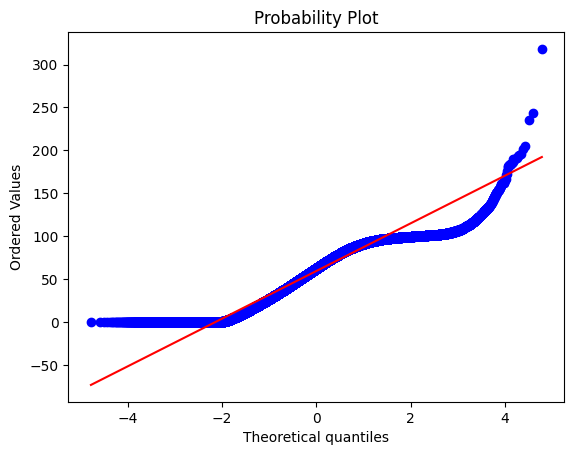

In [ ]:
# qq플롯
qq = lending_club['bc_util'].dropna()
stats.probplot(qq, plot=plt)

# Shapiro-Wilk 테스트를 사용한 정규성 검정
stat, p_value = stats.shapiro(qq)
print(f'Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}')

In [ ]:
# percent_bc_gt_75
print(lending_club['percent_bc_gt_75'].isnull().sum(), lending_club['percent_bc_gt_75'].nunique())

8117 224


In [ ]:
lending_club['percent_bc_gt_75'].describe()

count    775917.000000
mean         45.013107
std          36.178111
min           0.000000
25%          10.000000
50%          42.900000
75%          75.000000
max         100.000000
Name: percent_bc_gt_75, dtype: float64

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 775917.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test Statistic: 0.8895641254922343, p-value: 5.4132925172530875e-154


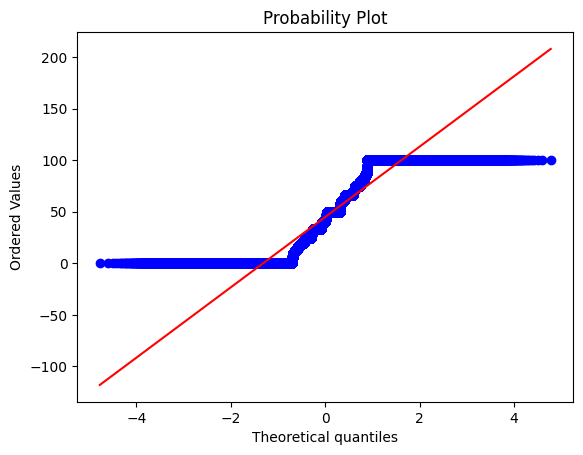

In [ ]:
# qq플롯
qq = lending_club['percent_bc_gt_75'].dropna()
stats.probplot(qq, plot=plt)

# Shapiro-Wilk 테스트를 사용한 정규성 검정
stat, p_value = stats.shapiro(qq)
print(f'Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}')

In [ ]:
# bc_util과 percent_bc_gt_75의 상관성
lending_club[['bc_util', 'percent_bc_gt_75']].corr()

bc_util  percent_bc_gt_75
bc_util           1.000000          0.844762
percent_bc_gt_75  0.844762          1.000000

In [ ]:
# from sklearn.linear_model import LinearRegression

# # 결측값이 없는 데이터 추출
# train_data = lending_club.dropna(subset=['percent_bc_gt_75'])

# # 설명 변수와 목표 변수 설정
# X = train_data[['bc_util']]
# y = train_data['percent_bc_gt_75']

# # 선형 회귀 모델 학습
# model = LinearRegression()
# model.fit(X, y)

# # 결측값이 있는 데이터 추출
# missing_data = lending_club[lending_club['percent_bc_gt_75'].isnull()]

# # 결측값 예측
# predictions = model.predict(missing_data[['bc_util']])

# # 예측값으로 결측값 채우기
# lending_club.loc[lending_club['percent_bc_gt_75'].isnull(), 'percent_bc_gt_75'] = predictions

# print(lending_club['percent_bc_gt_75'].isnull().sum(), lending_club['percent_bc_gt_75'].nunique())

In [ ]:
# min -값 -> 실패
# lending_club['percent_bc_gt_75'].describe()

In [ ]:
# # knnimputer 사용해서 채우기
# from sklearn.impute import KNNImputer

# # 모델 선언
# imputer = KNNImputer(n_neighbors=5)

# # 상관성이 높은 변수 bc_util
# df_selected = lending_club[['percent_bc_gt_75', 'bc_util']]

# # 학습
# df_selected_imputed = imputer.fit_transform(df_selected)

# # 데이터 씌우기
# df_selected_imputed = pd.DataFrame(df_selected_imputed, columns=['percent_bc_gt_75', 'bc_util'])
# lending_club['percent_bc_gt_75'] = df_selected_imputed['percent_bc_gt_75']

# # 확인
# print(lending_club['percent_bc_gt_75'].isnull().sum(), lending_club['percent_bc_gt_75'].nunique())


In [ ]:
# 오히려 결측치가 많아진 모습 -> n_neighbors를 늘린다? -> knn의 시간 문제 + 늘렸을때 해결된다는 보장 x
lending_club['percent_bc_gt_75'].isnull().sum()

8117

In [ ]:
from xgboost import XGBRegressor

# 결측값이 없는 데이터 추출
train_data = lending_club.dropna(subset=['percent_bc_gt_75'])

# 설명 변수와 목표 변수 설정
X = train_data[['bc_util']]
y = train_data['percent_bc_gt_75']

# 선형 회귀 모델 학습
model = XGBRegressor()
model.fit(X, y)

# 결측값이 있는 데이터 추출
missing_data = lending_club[lending_club['percent_bc_gt_75'].isnull()]

# 결측값 예측
predictions = model.predict(missing_data[['bc_util']])

# 예측값으로 결측값 채우기
lending_club.loc[lending_club['percent_bc_gt_75'].isnull(), 'percent_bc_gt_75'] = predictions

print(lending_club['percent_bc_gt_75'].isnull().sum(), lending_club['percent_bc_gt_75'].nunique())

0 225


In [ ]:
# test
missing_data = lending_club_test[lending_club_test['percent_bc_gt_75'].isnull()]
predictions = model.predict(missing_data[['bc_util']])
lending_club_test.loc[lending_club_test['percent_bc_gt_75'].isnull(), 'percent_bc_gt_75'] = predictions

In [ ]:
lending_club['percent_bc_gt_75'].describe()

count    784034.000000
mean         44.553230
std          36.270122
min           0.000000
25%           0.592823
50%          40.000000
75%          75.000000
max         100.000000
Name: percent_bc_gt_75, dtype: float64

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 784034.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test Statistic: 0.88730385212011, p-value: 8.360927742078617e-155


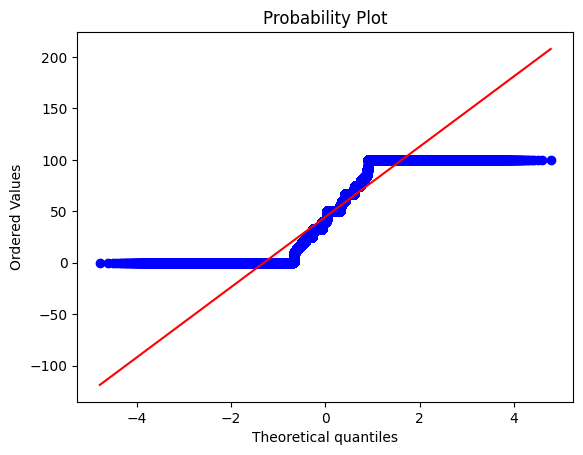

In [ ]:
# qq플롯
qq = lending_club['percent_bc_gt_75'].dropna()
stats.probplot(qq, plot=plt)

# Shapiro-Wilk 테스트를 사용한 정규성 검정
stat, p_value = stats.shapiro(qq)
print(f'Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}')

In [ ]:
# bc_open_to_buy
print(lending_club['bc_open_to_buy'].isnull().sum(), lending_club['bc_open_to_buy'].unique(), lending_club['bc_open_to_buy'].nunique())

7830 [  1506.  57830.  54962. ... 107774.  57649.  73489.] 64298


In [ ]:
lending_club['bc_open_to_buy'].describe()

count    776204.000000
mean      10232.580275
std       15262.537207
min           0.000000
25%        1535.000000
50%        4850.000000
75%       12482.000000
max      711140.000000
Name: bc_open_to_buy, dtype: float64

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 776204.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test Statistic: 0.6293496916870932, p-value: 4.452989587197103e-196


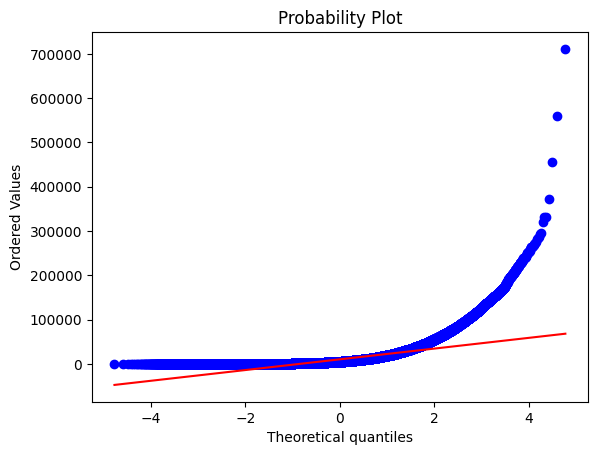

In [ ]:
# qq플롯
qq = lending_club['bc_open_to_buy'].dropna()
stats.probplot(qq, plot=plt)

# Shapiro-Wilk 테스트를 사용한 정규성 검정
stat, p_value = stats.shapiro(qq)
print(f'Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}')

In [ ]:
# bc_open_to_buy, total_bc_limit 상관관계
lending_club[['bc_open_to_buy','total_bc_limit']].corr()

bc_open_to_buy  total_bc_limit
bc_open_to_buy        1.000000        0.822728
total_bc_limit        0.822728        1.000000

In [ ]:
from xgboost import XGBRegressor

# 결측값이 없는 데이터 추출
train_data = lending_club.dropna(subset=['bc_open_to_buy'])

# 설명 변수와 목표 변수 설정
X = train_data[['total_bc_limit']]
y = train_data['bc_open_to_buy']

# 모델 학습
model = XGBRegressor()
model.fit(X, y)

# 결측값이 있는 데이터 추출
missing_data = lending_club[lending_club['bc_open_to_buy'].isnull()]

# 결측값 예측
predictions = model.predict(missing_data[['total_bc_limit']])

# 예측값으로 결측값 채우기
lending_club.loc[lending_club['bc_open_to_buy'].isnull(), 'bc_open_to_buy'] = predictions

print(lending_club['bc_open_to_buy'].isnull().sum(), lending_club['bc_open_to_buy'].nunique())

0 64299


In [ ]:
# test
missing_data = lending_club_test[lending_club_test['bc_open_to_buy'].isnull()]
predictions = model.predict(missing_data[['total_bc_limit']])
lending_club_test.loc[lending_club_test['bc_open_to_buy'].isnull(), 'bc_open_to_buy'] = predictions

In [ ]:
lending_club['bc_open_to_buy'].describe()

count    784034.000000
mean      10131.707862
std       15219.308619
min           0.000000
25%        1467.000000
50%        4760.000000
75%       12351.750000
max      711140.000000
Name: bc_open_to_buy, dtype: float64

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 784034.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test Statistic: 0.6278158389957156, p-value: 2.156266206048548e-196


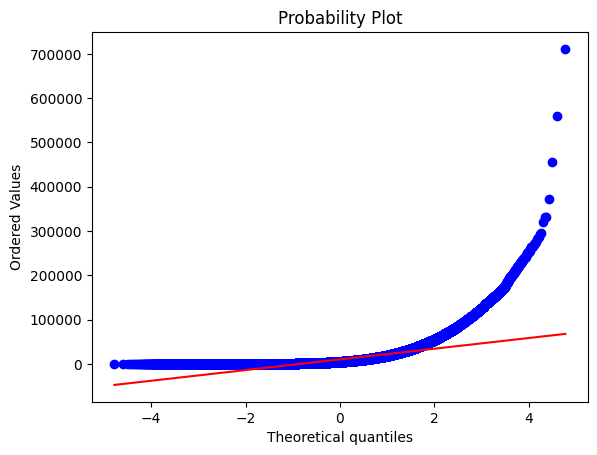

In [ ]:
# qq플롯
qq = lending_club['bc_open_to_buy'].dropna()
stats.probplot(qq, plot=plt)

# Shapiro-Wilk 테스트를 사용한 정규성 검정
stat, p_value = stats.shapiro(qq)
print(f'Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}')

In [ ]:
lending_club['mths_since_recent_bc'].describe()

count    776584.000000
mean         24.547120
std          32.302197
min           0.000000
25%           6.000000
50%          13.000000
75%          29.000000
max         639.000000
Name: mths_since_recent_bc, dtype: float64

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 776584.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test Statistic: 0.6570826060059255, p-value: 3.1458707148165103e-193


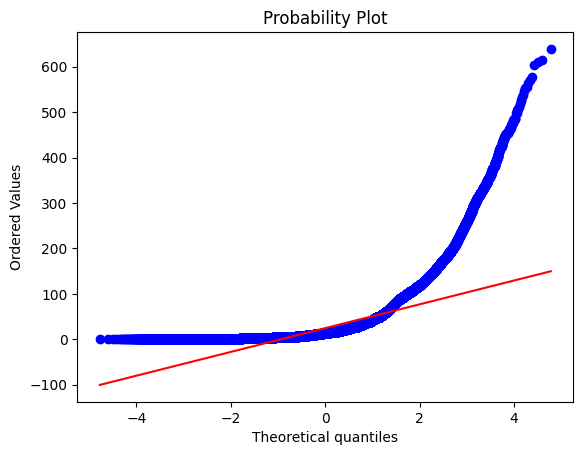

In [ ]:
# qq플롯
qq = lending_club['mths_since_recent_bc'].dropna()
stats.probplot(qq, plot=plt)

# Shapiro-Wilk 테스트를 사용한 정규성 검정
stat, p_value = stats.shapiro(qq)
print(f'Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}')

In [ ]:
# mths_since_recent_bc : 가장 최근에 은행카드 계좌가 개설된 이후 개월 수입니다.

# 은행카드 계좌가 개설되지 않았다면?
# mths_since_recent_bc가 nan이고 num_bc_tl이 0인 값의 수
print(lending_club['mths_since_recent_bc'].isnull().sum(),lending_club[(lending_club['mths_since_recent_bc'].isnull()) & (lending_club['num_bc_tl'] == 0)].shape[0])

# mths_since_recent_bc의 unique
print(lending_club['mths_since_recent_bc'].unique(), lending_club['mths_since_recent_bc'].nunique())

7450 1790
[  4.   2.  36.  12.  32.  50.   1.   9.  28.  19.  11.  13.   8.   5.
  22.  26.  37.  34.  85.   3.  16.  23.  20.  17.  15.  40.  99.  10.
  24.   6.  38.  27.  25.  73.  52.  18.  45.  nan  21.  54.  83.   7.
  29.  14.  35.  49.  42.  33.  30. 133.  51. 104.  71.  56. 100.  41.
 114. 122.   0.  31.  62.  68. 102. 115. 183. 110.  60.  61. 116. 109.
  98. 297. 124.  79.  48.  86.  44. 204.  46.  58.  39. 112.  63.  80.
  78. 184. 105. 134.  53.  43. 125.  94.  90.  55. 127. 205.  57. 101.
 163. 120. 137. 153. 107. 113. 161. 123.  70. 178.  47. 216.  76.  74.
 136. 220. 103.  75. 180.  64.  69.  97. 135. 117. 131. 147.  91.  67.
 169.  72.  66.  65. 212. 145.  89.  82. 119.  95.  59. 227. 143. 238.
  77. 138.  84. 121. 142. 128. 193.  96. 210. 126.  81. 176. 132. 130.
 144. 140. 198. 174. 146. 141.  88.  87. 108. 154. 213. 168. 175. 106.
 333. 203. 186.  93. 129. 111. 162. 248. 151. 285. 188. 166. 118. 172.
 387. 167.  92. 152. 219. 234. 192. 159. 155. 179. 173. 229. 232. 2

In [ ]:
# mths_since_recent_bc가 nan이고 num_bc_tl이 0일 경우 mths_since_recent_bc를 0으로 대체
lending_club.loc[(lending_club['mths_since_recent_bc'].isnull()) & (lending_club['num_bc_tl'] == 0), 'mths_since_recent_bc'] = 0

# 확인
print(lending_club['mths_since_recent_bc'].isnull().sum(),lending_club[(lending_club['mths_since_recent_bc'].isnull()) & (lending_club['num_bc_tl'] == 0)].shape[0])

5660 0


In [ ]:
# test
lending_club_test.loc[(lending_club_test['mths_since_recent_bc'].isnull()) & (lending_club_test['num_bc_tl'] == 0), 'mths_since_recent_bc'] = 0
print(lending_club_test['mths_since_recent_bc'].isnull().sum(),lending_club_test[(lending_club_test['mths_since_recent_bc'].isnull()) & (lending_club_test['num_bc_tl'] == 0)].shape[0])

413 0


In [ ]:
# mths_since_recent_bc가 nan인 값의 num_bc_tl의 describe
lending_club[lending_club['mths_since_recent_bc'].isnull()]['num_bc_tl'].describe()

count    5660.000000
mean        3.663251
std         2.824618
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        29.000000
Name: num_bc_tl, dtype: float64

In [ ]:
# mths_since_recent_bc가 nan인 값의 num_tl_op_past_12m의 describe
lending_club[lending_club['mths_since_recent_bc'].isnull()]['num_tl_op_past_12m'].describe()

count    5660.000000
mean        1.680035
std         1.558629
min         0.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        16.000000
Name: num_tl_op_past_12m, dtype: float64

In [ ]:
# 정확한 개설 날짜 누락되었다 판단 -> 알 수 없는 값 0으로 대치
lending_club['mths_since_recent_bc'] = lending_club['mths_since_recent_bc'].fillna(0)

# 확인
print(lending_club['mths_since_recent_bc'].isnull().sum(), lending_club['mths_since_recent_bc'].nunique())

0 464


In [ ]:
# test
lending_club_test['mths_since_recent_bc'] = lending_club_test['mths_since_recent_bc'].fillna(0)
print(lending_club_test['mths_since_recent_bc'].isnull().sum(), lending_club_test['mths_since_recent_bc'].nunique())

0 303


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 784034.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test Statistic: 0.6571497087729975, p-value: 2.2460771192651145e-193


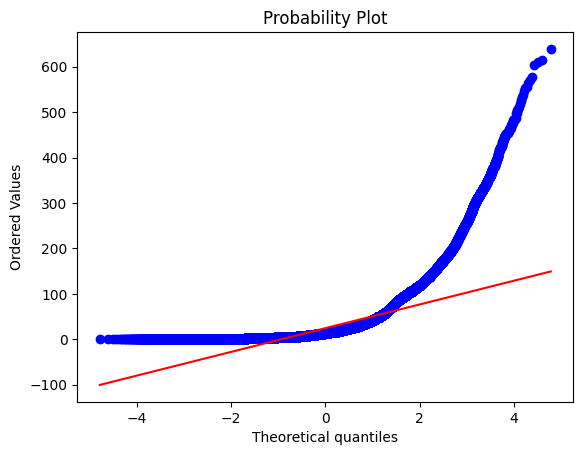

In [ ]:
# qq플롯
qq = lending_club['mths_since_recent_bc'].dropna()
stats.probplot(qq, plot=plt)

# Shapiro-Wilk 테스트를 사용한 정규성 검정
stat, p_value = stats.shapiro(qq)
print(f'Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}')

In [ ]:
lending_club['mo_sin_old_il_acct'].describe()

count    761942.000000
mean        127.107945
std          52.401767
min           0.000000
25%         101.000000
50%         130.000000
75%         153.000000
max         724.000000
Name: mo_sin_old_il_acct, dtype: float64

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 761942.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test Statistic: 0.9630766955352269, p-value: 4.1251701576075324e-120


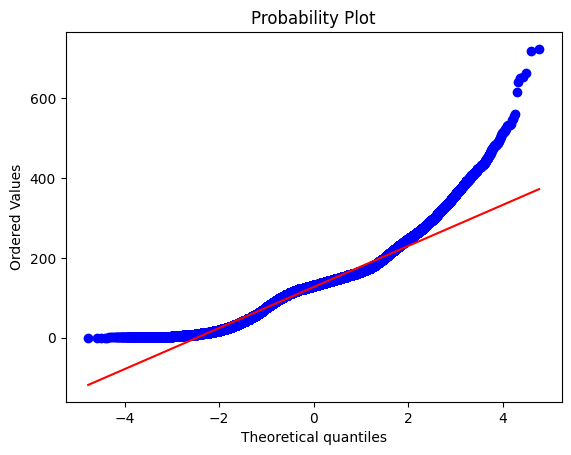

In [ ]:
# qq플롯
qq = lending_club['mo_sin_old_il_acct'].dropna()
stats.probplot(qq, plot=plt)

# Shapiro-Wilk 테스트를 사용한 정규성 검정
stat, p_value = stats.shapiro(qq)
print(f'Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}')

In [ ]:
# mo_sin_old_il_acct가 nan이고 num_il_tl가 0인 값
print(lending_club['mo_sin_old_il_acct'].isnull().sum(),lending_club[(lending_club['mo_sin_old_il_acct'].isnull()) & (lending_club['num_il_tl'] == 0)].shape[0])

# mo_sin_old_il_acct가 nan이고 num_il_tl가 0일 경우 0으로 대체
lending_club.loc[(lending_club['mo_sin_old_il_acct'].isnull()) & (lending_club['num_il_tl'] == 0), 'mo_sin_old_il_acct'] = 0

# 확인
print(lending_club['mo_sin_old_il_acct'].isnull().sum(),lending_club[(lending_club['mo_sin_old_il_acct'].isnull()) & (lending_club['num_il_tl'] == 0)].shape[0])

22092 22066
26 0


In [ ]:
# mo_sin_old_il_acct가 nan인 값의 num_il_tl의 describe
lending_club[lending_club['mo_sin_old_il_acct'].isnull()]['num_il_tl'].describe()

count    26.000000
mean      1.192308
std       0.491466
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       3.000000
Name: num_il_tl, dtype: float64

In [ ]:
# 알 수 없는 값 0으로 대체
lending_club['mo_sin_old_il_acct'] = lending_club['mo_sin_old_il_acct'].fillna(0)

# 확인
print(lending_club['mo_sin_old_il_acct'].isnull().sum(), lending_club['mo_sin_old_il_acct'].nunique())

0 513


In [ ]:
# test
print(lending_club_test['mo_sin_old_il_acct'].isnull().sum(),lending_club_test[(lending_club_test['mo_sin_old_il_acct'].isnull()) & (lending_club_test['num_il_tl'] == 0)].shape[0])
lending_club_test.loc[(lending_club_test['mo_sin_old_il_acct'].isnull()) & (lending_club_test['num_il_tl'] == 0), 'mo_sin_old_il_acct'] = 0
lending_club_test['mo_sin_old_il_acct'] = lending_club_test['mo_sin_old_il_acct'].fillna(0)
print(lending_club_test['mo_sin_old_il_acct'].isnull().sum(), lending_club_test['mo_sin_old_il_acct'].nunique())

0 0
0 411


In [ ]:
lending_club['mo_sin_old_il_acct'].describe()

count    784034.000000
mean        123.526380
std          55.776249
min           0.000000
25%          96.000000
50%         129.000000
75%         153.000000
max         724.000000
Name: mo_sin_old_il_acct, dtype: float64

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 784034.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test Statistic: 0.9619837964935466, p-value: 2.578524021547571e-121


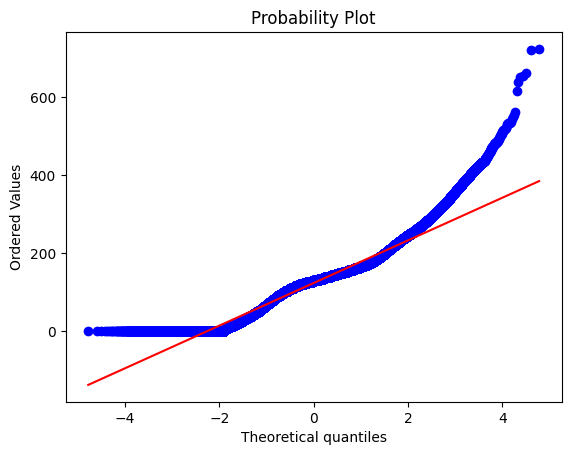

In [ ]:
# qq플롯
qq = lending_club['mo_sin_old_il_acct'].dropna()
stats.probplot(qq, plot=plt)

# Shapiro-Wilk 테스트를 사용한 정규성 검정
stat, p_value = stats.shapiro(qq)
print(f'Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}')

In [ ]:
lending_club['mths_since_recent_inq'].describe()

count    700396.000000
mean          6.798838
std           5.935755
min           0.000000
25%           2.000000
50%           5.000000
75%          10.000000
max          25.000000
Name: mths_since_recent_inq, dtype: float64

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 700396.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test Statistic: 0.8984917622216507, p-value: 9.091674033216116e-150


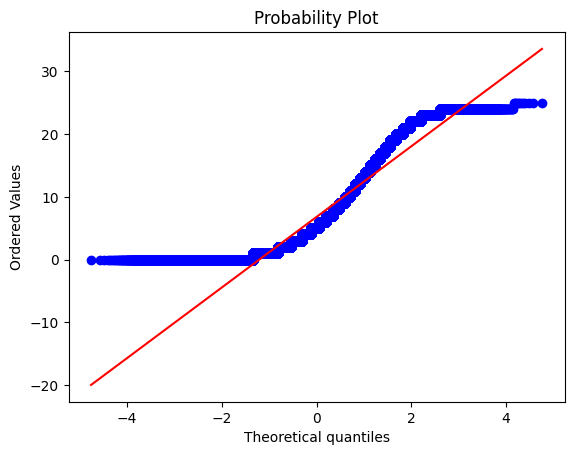

In [ ]:
# qq플롯
qq = lending_club['mths_since_recent_inq'].dropna()
stats.probplot(qq, plot=plt)

# Shapiro-Wilk 테스트를 사용한 정규성 검정
stat, p_value = stats.shapiro(qq)
print(f'Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}')

In [ ]:
# mths_since_recent_inq가 nan값 중 inq_last_6mths 값이 0인 값
print(lending_club[(lending_club['mths_since_recent_inq'].isnull()) & (lending_club['inq_last_6mths'] == 0)].shape[0])

# mths_since_recent_inq가 nan값 중 inq_last_6mths 값이 0이 아닌 값
print(lending_club[(lending_club['mths_since_recent_inq'].isnull()) & (lending_club['inq_last_6mths'] != 0)].shape[0])

83632
6


In [ ]:
# mths_since_recent_inq가 nan값 중 inq_last_6mths 값이 0이 아닌 값의 inq_last_6mths
lending_club[(lending_club['mths_since_recent_inq'].isnull()) & (lending_club['inq_last_6mths'] != 0)]['inq_last_6mths']

2512      1.0
14775     1.0
21103     1.0
136075    2.0
206771    1.0
272601    1.0
Name: inq_last_6mths, dtype: float64

In [ ]:
# mths_since_recent_inq가 nan값 중 inq_last_6mths 값이 0인 값은 0으로 대체
lending_club.loc[(lending_club['mths_since_recent_inq'].isnull()) & (lending_club['inq_last_6mths'] == 0), 'mths_since_recent_inq'] = 0

# mths_since_recent_inq가 nan값 중 inq_last_6mths 값이 0이 아닌 값은 6으로 대체
lending_club.loc[(lending_club['mths_since_recent_inq'].isnull()) & (lending_club['inq_last_6mths'] != 0), 'mths_since_recent_inq'] = 6

# 확인
print(lending_club['mths_since_recent_inq'].isnull().sum(), lending_club['mths_since_recent_inq'].nunique())

0 26


In [ ]:
# test
lending_club_test.loc[(lending_club_test['mths_since_recent_inq'].isnull()) & (lending_club_test['inq_last_6mths'] == 0), 'mths_since_recent_inq'] = 0
lending_club_test.loc[(lending_club_test['mths_since_recent_inq'].isnull()) & (lending_club_test['inq_last_6mths'] != 0), 'mths_since_recent_inq'] = 6

# 확인
print(lending_club_test['mths_since_recent_inq'].isnull().sum(), lending_club_test['mths_since_recent_inq'].nunique())

0 26


In [ ]:
lending_club['mths_since_recent_inq'].describe()

count    784034.000000
mean          6.073608
std           5.989938
min           0.000000
25%           1.000000
50%           4.000000
75%           9.000000
max          25.000000
Name: mths_since_recent_inq, dtype: float64

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 784034.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test Statistic: 0.8755064219666799, p-value: 4.4398942979417264e-158


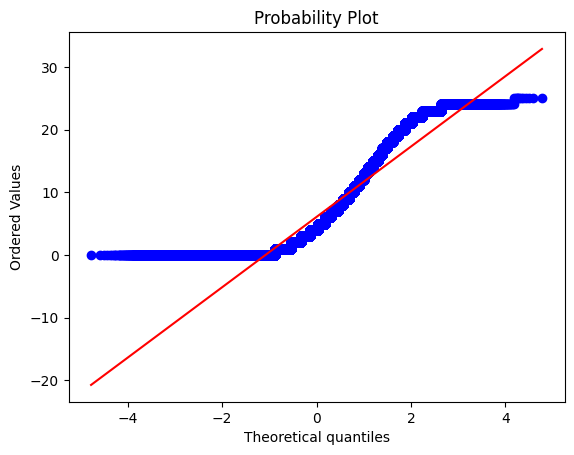

In [ ]:
# qq플롯
qq = lending_club['mths_since_recent_inq'].dropna()
stats.probplot(qq, plot=plt)

# Shapiro-Wilk 테스트를 사용한 정규성 검정
stat, p_value = stats.shapiro(qq)
print(f'Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}')

In [ ]:
# num_tl_120dpd_2m -> 범주형 변수
print(lending_club['num_tl_120dpd_2m'].unique(), lending_club['num_tl_120dpd_2m'].nunique())

[ 0. nan  1.  2.  6.  3.  4.] 6


In [ ]:
# num_tl_120dpd_2m가 nan인 값 중 num_accts_ever_120_pd이 0인 값
print(lending_club[(lending_club['num_tl_120dpd_2m'].isnull()) & (lending_club['num_accts_ever_120_pd'] == 0)].shape[0])


# num_tl_120dpd_2m가 nan인 값 중 num_accts_ever_120_pd 이 0이 아닌 값
lending_club[(lending_club['num_tl_120dpd_2m'].isnull()) & (lending_club['num_accts_ever_120_pd'] != 0)]['num_accts_ever_120_pd']

33939


434        1.0
609        1.0
968        5.0
994        1.0
1230       2.0
          ... 
2248673    1.0
2248865    1.0
2249568    2.0
2249648    1.0
2250191    1.0
Name: num_accts_ever_120_pd, Length: 3404, dtype: float64

In [ ]:
# num_tl_120dpd_2m가 nan인 값 중 num_accts_ever_120_pd이 0인 값은 0으로 대체
lending_club.loc[(lending_club['num_tl_120dpd_2m'].isnull()) & (lending_club['num_accts_ever_120_pd'] == 0), 'num_tl_120dpd_2m'] = 0

# num_tl_120dpd_2m가 nan인 값 중 num_accts_ever_120_pd 이 0이 아닌 값은 num_accts_ever_120_pd 값으로 대체
lending_club.loc[(lending_club['num_tl_120dpd_2m'].isnull()) & (lending_club['num_accts_ever_120_pd'] != 0), 'num_tl_120dpd_2m'] = lending_club.loc[
    (lending_club['num_tl_120dpd_2m'].isnull()) & (lending_club['num_accts_ever_120_pd'] != 0), 'num_accts_ever_120_pd']



# 확인
print(lending_club['num_tl_120dpd_2m'].isnull().sum(), lending_club['num_tl_120dpd_2m'].nunique())

0 15


In [ ]:
# test
lending_club_test.loc[(lending_club_test['num_tl_120dpd_2m'].isnull()) & (lending_club_test['num_accts_ever_120_pd'] == 0), 'num_tl_120dpd_2m'] = 0
lending_club_test.loc[(lending_club_test['num_tl_120dpd_2m'].isnull()) & (lending_club_test['num_accts_ever_120_pd'] != 0), 'num_tl_120dpd_2m'] = lending_club_test.loc[
    (lending_club_test['num_tl_120dpd_2m'].isnull()) & (lending_club_test['num_accts_ever_120_pd'] != 0), 'num_accts_ever_120_pd']

# 확인
print(lending_club_test['num_tl_120dpd_2m'].isnull().sum(), lending_club_test['num_tl_120dpd_2m'].nunique())

0 11


In [ ]:
# 결측치가 전체 데이터의 30만 이상인 데이터 컬럼
print(missing_values[missing_values > 300000])

drop_col = lending_club.columns[missing_values > 300000]

# 컬럼 삭제
lending_club.drop(columns=drop_col, inplace=True)

mths_since_last_delinq            375284
mths_since_last_record            640810
open_acc_6m                       370366
open_act_il                       370365
open_il_12m                       370365
open_il_24m                       370365
mths_since_rcnt_il                381596
total_bal_il                      370365
il_util                           425080
open_rv_12m                       370365
open_rv_24m                       370365
max_bal_bc                        370365
all_util                          370387
inq_fi                            370365
total_cu_tl                       370366
inq_last_12m                      370366
mths_since_recent_bc_dlq          583089
mths_since_recent_revol_delinq    500832
dtype: int64


In [ ]:
# test
lending_club_test.drop(columns=drop_col, inplace=True)

In [ ]:
print(lending_club.isnull().sum().sum(), '\n', lending_club.isnull().sum())

0 
 id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
                             ..
total_bal_ex_mort             0
total_bc_limit                0
total_il_high_credit_limit    0
disbursement_method           0
cr_line_diff                  0
Length: 65, dtype: int64


In [ ]:
print(lending_club_test.isnull().sum().sum(), '\n', lending_club.isnull().sum())

0 
 id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
                             ..
total_bal_ex_mort             0
total_bc_limit                0
total_il_high_credit_limit    0
disbursement_method           0
cr_line_diff                  0
Length: 65, dtype: int64


In [ ]:
lending_club

id  loan_amnt  funded_amnt  funded_amnt_inv  term  installment  \
0        68407277     3600.0       3600.0           3600.0    36       123.03   
1        68355089    24700.0      24700.0          24700.0    36       820.28   
3        66310712    35000.0      35000.0          35000.0    60       829.90   
4        68476807    10400.0      10400.0          10400.0    60       289.91   
5        68426831    11950.0      11950.0          11950.0    36       405.18   
...           ...        ...          ...              ...   ...          ...   
2260694  89885898    24000.0      24000.0          24000.0    60       543.50   
2260695  88977788    24000.0      24000.0          24000.0    60       515.74   
2260696  88985880    40000.0      40000.0          40000.0    60       859.56   
2260697  88224441    24000.0      24000.0          24000.0    60       564.56   
2260698  88215728    14000.0      14000.0          14000.0    60       329.33   

         emp_length  home_ownership  annual_inc  verification_status  ...  \
0                10               2     55000.0                    0  ...   
1                10               2     65000.0                    0  ...   
3                10               2    110000.0                    1  ...   
4                 3               2    104433.0                    1  ...   
5                 4               1     34000.0                    1  ...   
...             ...             ...         ...                  ...  ...   
2260694           7               2     95000.0                    1  ...   
2260695          10               2    108000.0                    0  ...   
2260696           9               2    227000.0                    2  ...   
2260697           6               1    110000.0                    0  ...   
2260698          10               2     95000.0                    2  ...   

         pct_tl_nvr_dlq  percent_bc_gt_75  pub_rec_bankruptcies  tax_liens  \
0                  76.9          0.000000                   0.0        0.0   
1                  97.4          7.700000                   0.0        0.0   
3                 100.0          0.000000                   0.0        0.0   
4                  96.6         60.000000                   0.0        0.0   
5                 100.0        100.000000                   0.0        0.0   
...                 ...               ...                   ...        ...   
2260694           100.0          0.592823                   0.0        0.0   
2260695            75.9         42.900000                   0.0        1.0   
2260696            75.7         50.000000                   0.0        0.0   
2260697            96.2         40.000000                   1.0        0.0   
2260698            81.8         50.000000                   0.0        0.0   

         tot_hi_cred_lim  total_bal_ex_mort  total_bc_limit  \
0               178050.0             7746.0          2400.0   
1               314017.0            39475.0         79300.0   
3               381215.0            52226.0         62500.0   
4               439570.0            95768.0         20300.0   
5                16900.0            12798.0          9400.0   
...                  ...                ...             ...   
2260694         102517.0           104422.0             0.0   
2260695         227883.0           140118.0         27900.0   
2260696          55970.0            28398.0         12300.0   
2260697          84664.0            62426.0         20700.0   
2260698         163804.0            44215.0          9500.0   

         total_il_high_credit_limit  disbursement_method  cr_line_diff  
0                           13734.0                    0          4505  
1                           24667.0                    0          5844  
3                           18000.0                    0          2647  
4                           88097.0                    0          6392  
5                            4000.0                    0  

In [ ]:
lending_club_test

id  loan_amnt  funded_amnt  funded_amnt_inv  term  installment  \
169346   58110989    35000.0      35000.0          35000.0    60       790.82   
404758   38444837    15000.0      15000.0          15000.0    36       459.67   
2009023  85715214    25000.0      25000.0          25000.0    36       948.18   
382238   40371236     7200.0       7200.0           7200.0    36       251.68   
235044   52108206    16550.0      16550.0          16550.0    36       533.95   
...           ...        ...          ...              ...   ...          ...   
247484   51837688    25000.0      25000.0          25000.0    36       833.83   
651797   84062656    22175.0      22175.0          22175.0    60       644.26   
1038695  73122453    12000.0      12000.0          12000.0    60       277.18   
420131   37681945    20000.0      20000.0          20000.0    60       448.85   
99898    62023007    35000.0      35000.0          35000.0    36      1184.86   

         emp_length  home_ownership  annual_inc  verification_status  ...  \
169346            4               2    130000.0                    2  ...   
404758           10               1     55000.0                    0  ...   
2009023          10               2     64000.0                    2  ...   
382238            2               2     45000.0                    2  ...   
235044            5               2     36000.0                    2  ...   
...             ...             ...         ...                  ...  ...   
247484            5               2    110000.0                    1  ...   
651797           10               1     46214.4                    1  ...   
1038695           0               3     28000.0                    2  ...   
420131           10               3    148000.0                    1  ...   
99898             8               1    118000.0                    1  ...   

         pct_tl_nvr_dlq  percent_bc_gt_75  pub_rec_bankruptcies  tax_liens  \
169346             96.0              27.3                   0.0        0.0   
404758            100.0              28.6                   0.0        0.0   
2009023           100.0             100.0                   0.0        0.0   
382238            100.0              25.0                   0.0        0.0   
235044            100.0               0.0                   0.0        0.0   
...                 ...               ...                   ...        ...   
247484             95.1             100.0                   0.0        0.0   
651797            100.0              33.3                   1.0        0.0   
1038695           100.0              66.7                   1.0        0.0   
420131             96.0             100.0                   0.0        0.0   
99898             100.0              62.5                   0.0        0.0   

         tot_hi_cred_lim  total_bal_ex_mort  total_bc_limit  \
169346          182791.0           104888.0         47070.0   
404758          105550.0            88695.0         21500.0   
2009023         276144.0            72868.0         16000.0   
382238          137259.0            32741.0          8600.0   
235044          214207.0            24644.0         37000.0   
...                  ...                ...             ...   
247484          215596.0            60473.0          8800.0   
651797          157656.0           125146.0         37400.0   
1038695          63319.0            24515.0         14700.0   
420131          279457.0            44980.0          5400.0   
99898           150166.0           109564.0         56200.0   

         total_il_high_credit_limit  disbursement_method  cr_line_diff  
169346                      67239.0                    0         10288  
404758                      81550.0                    0          4901  
2009023                     76794.0                    0          6240  
382238                      33805.0                    0          4383  
235044                      25000.0                    0  

In [ ]:
# 데이터 중간 저장
# lending_club.to_csv(f'{file_path}train_missing.csv', index=False)

In [ ]:
# 데이터 중간 저장
# lending_club_test.to_csv(f'{file_path}test_missing.csv', index=False)

## 2-4) 이상치 확인 및 처리

In [4]:
# 데이터 중간 로드
lending_club = pd.read_csv(f'{file_path}train_missing.csv',)
# 데이터 중간 로드
lending_club_test = pd.read_csv(f'{file_path}test_missing.csv')

In [6]:
# id 컬럼 삭제
lending_club.drop('id', axis=1, inplace=True)
lending_club_test.drop('id', axis=1, inplace=True)

In [13]:
lending_club.shape, lending_club_test.shape

((784034, 64), (59832, 64))

In [14]:
lending_club.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784034 entries, 0 to 784033
Data columns (total 64 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   784034 non-null  float64
 1   funded_amnt                 784034 non-null  float64
 2   funded_amnt_inv             784034 non-null  float64
 3   term                        784034 non-null  int64  
 4   installment                 784034 non-null  float64
 5   emp_length                  784034 non-null  int64  
 6   home_ownership              784034 non-null  int64  
 7   annual_inc                  784034 non-null  float64
 8   verification_status         784034 non-null  int64  
 9   issue_d                     784034 non-null  int64  
 10  loan_status                 784034 non-null  int64  
 11  purpose                     784034 non-null  int64  
 12  title                       784034 non-null  float64
 13  zip_code      

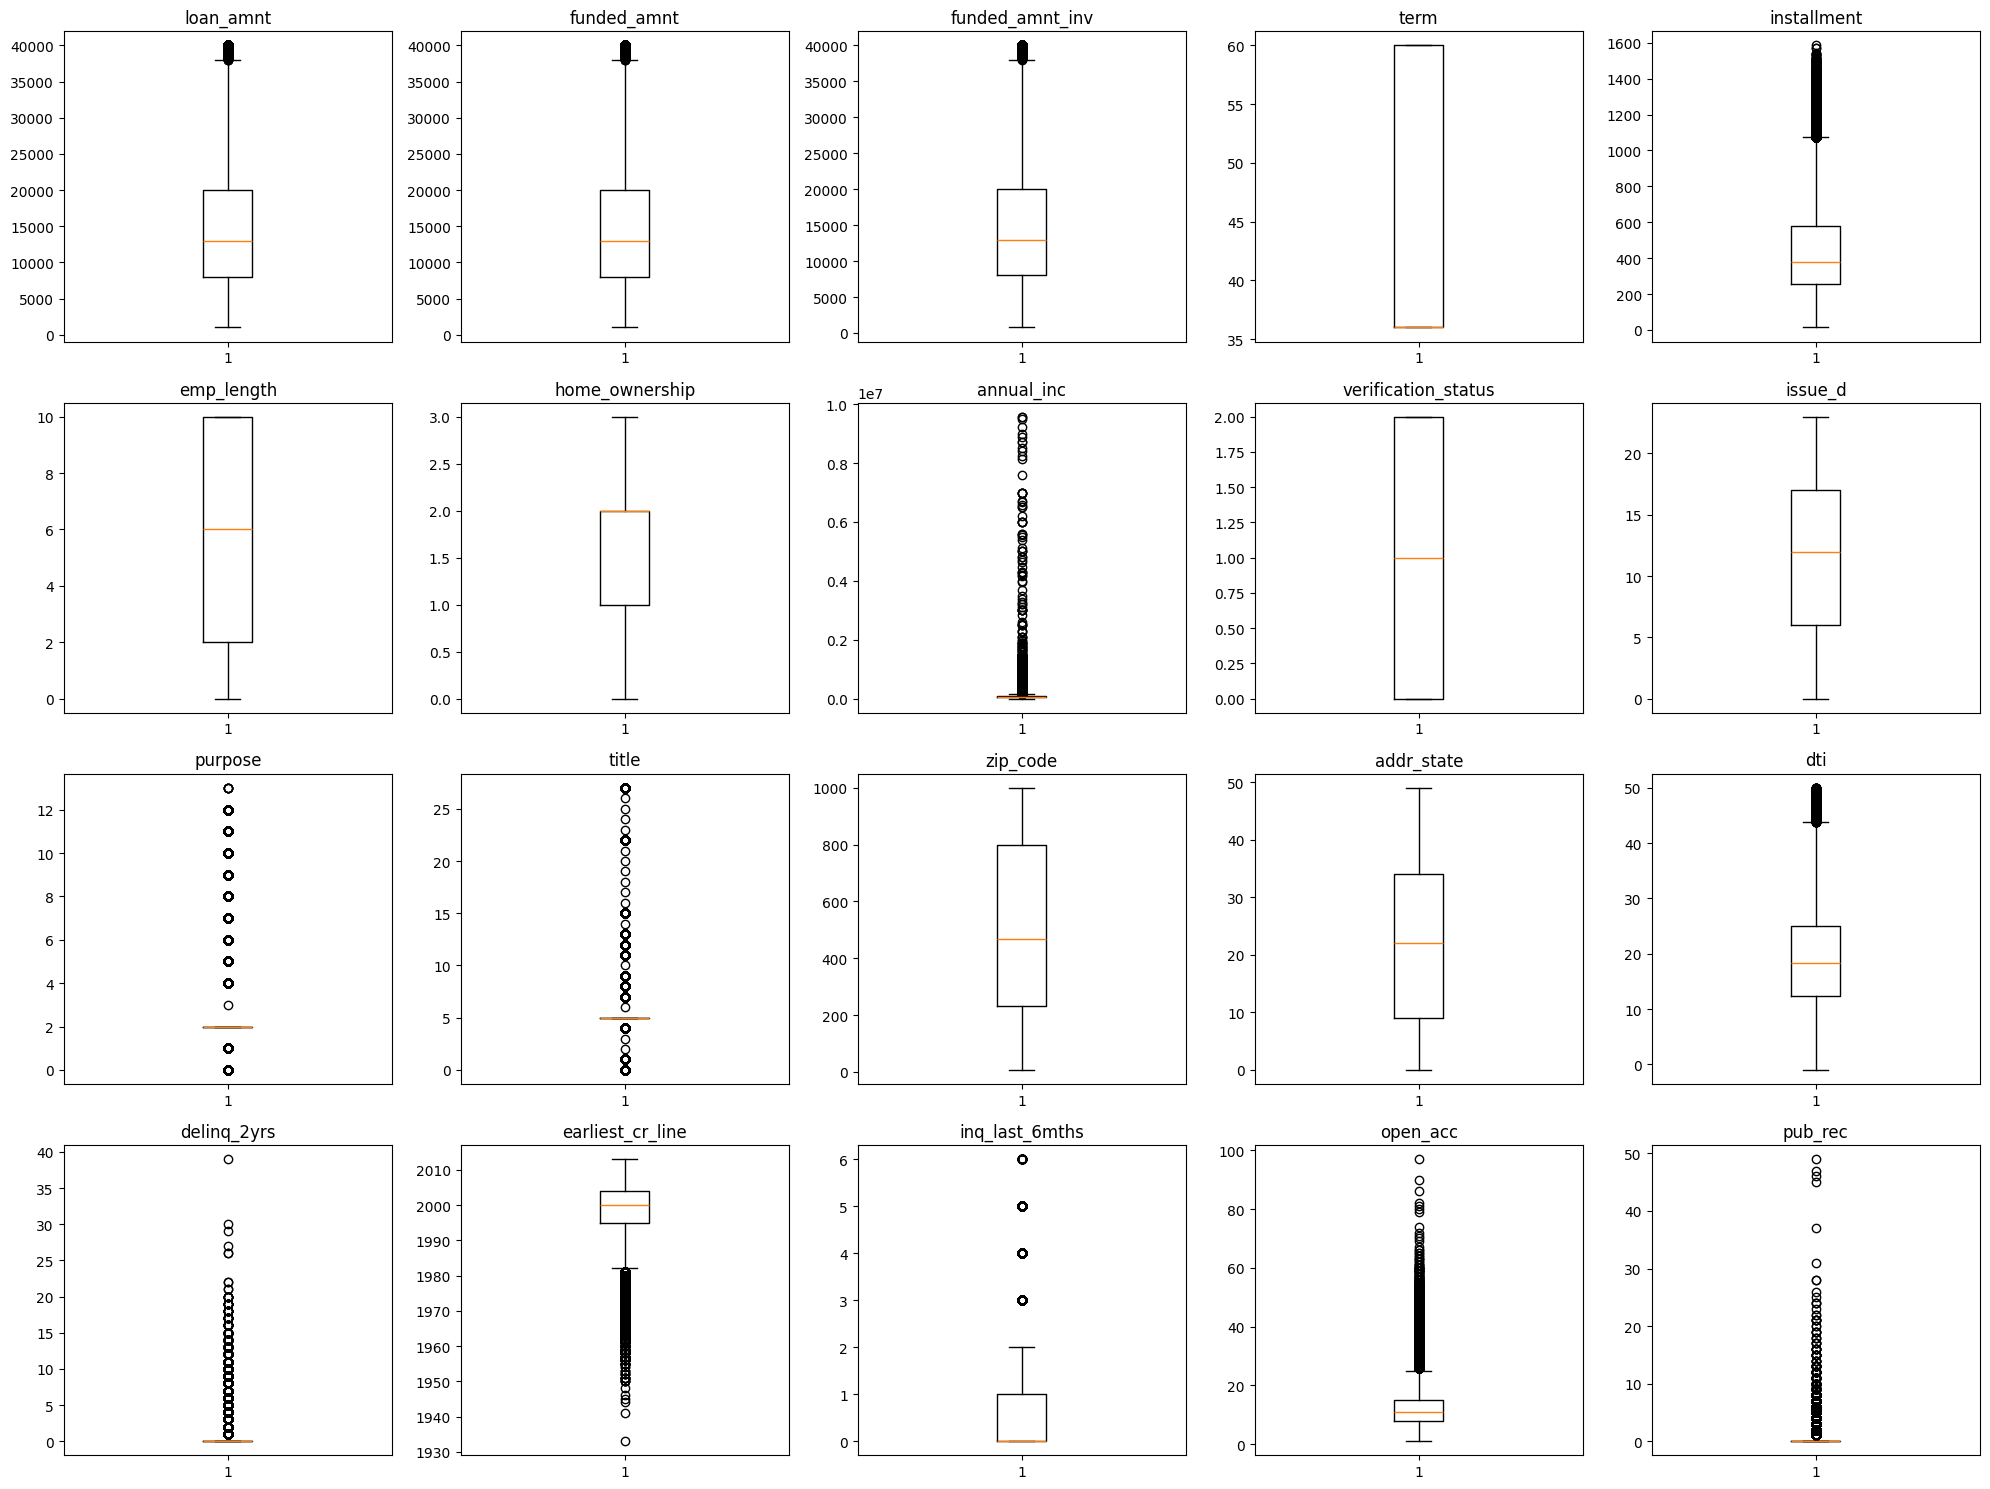

In [15]:
# 모든 컬럼의 박스플롯 (id, loan_status 제외)
columns_to_plot = [col for col in lending_club.columns if col not in ['id', 'loan_status']]

# 박스플롯을 그릴 최대 컬럼 수
max_cols = 20
if len(columns_to_plot) > max_cols:
    columns_to_plot = columns_to_plot[:max_cols]

# 서브플롯의 행과 열 설정
rows, cols = 4, 5

# 박스플롯 그리기
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    axes[i].boxplot(lending_club[col].dropna(), vert=True)  # 세로로 바꿔서 플롯
    axes[i].set_title(col)

# 남은 서브플롯 숨기기
for j in range(len(columns_to_plot), rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

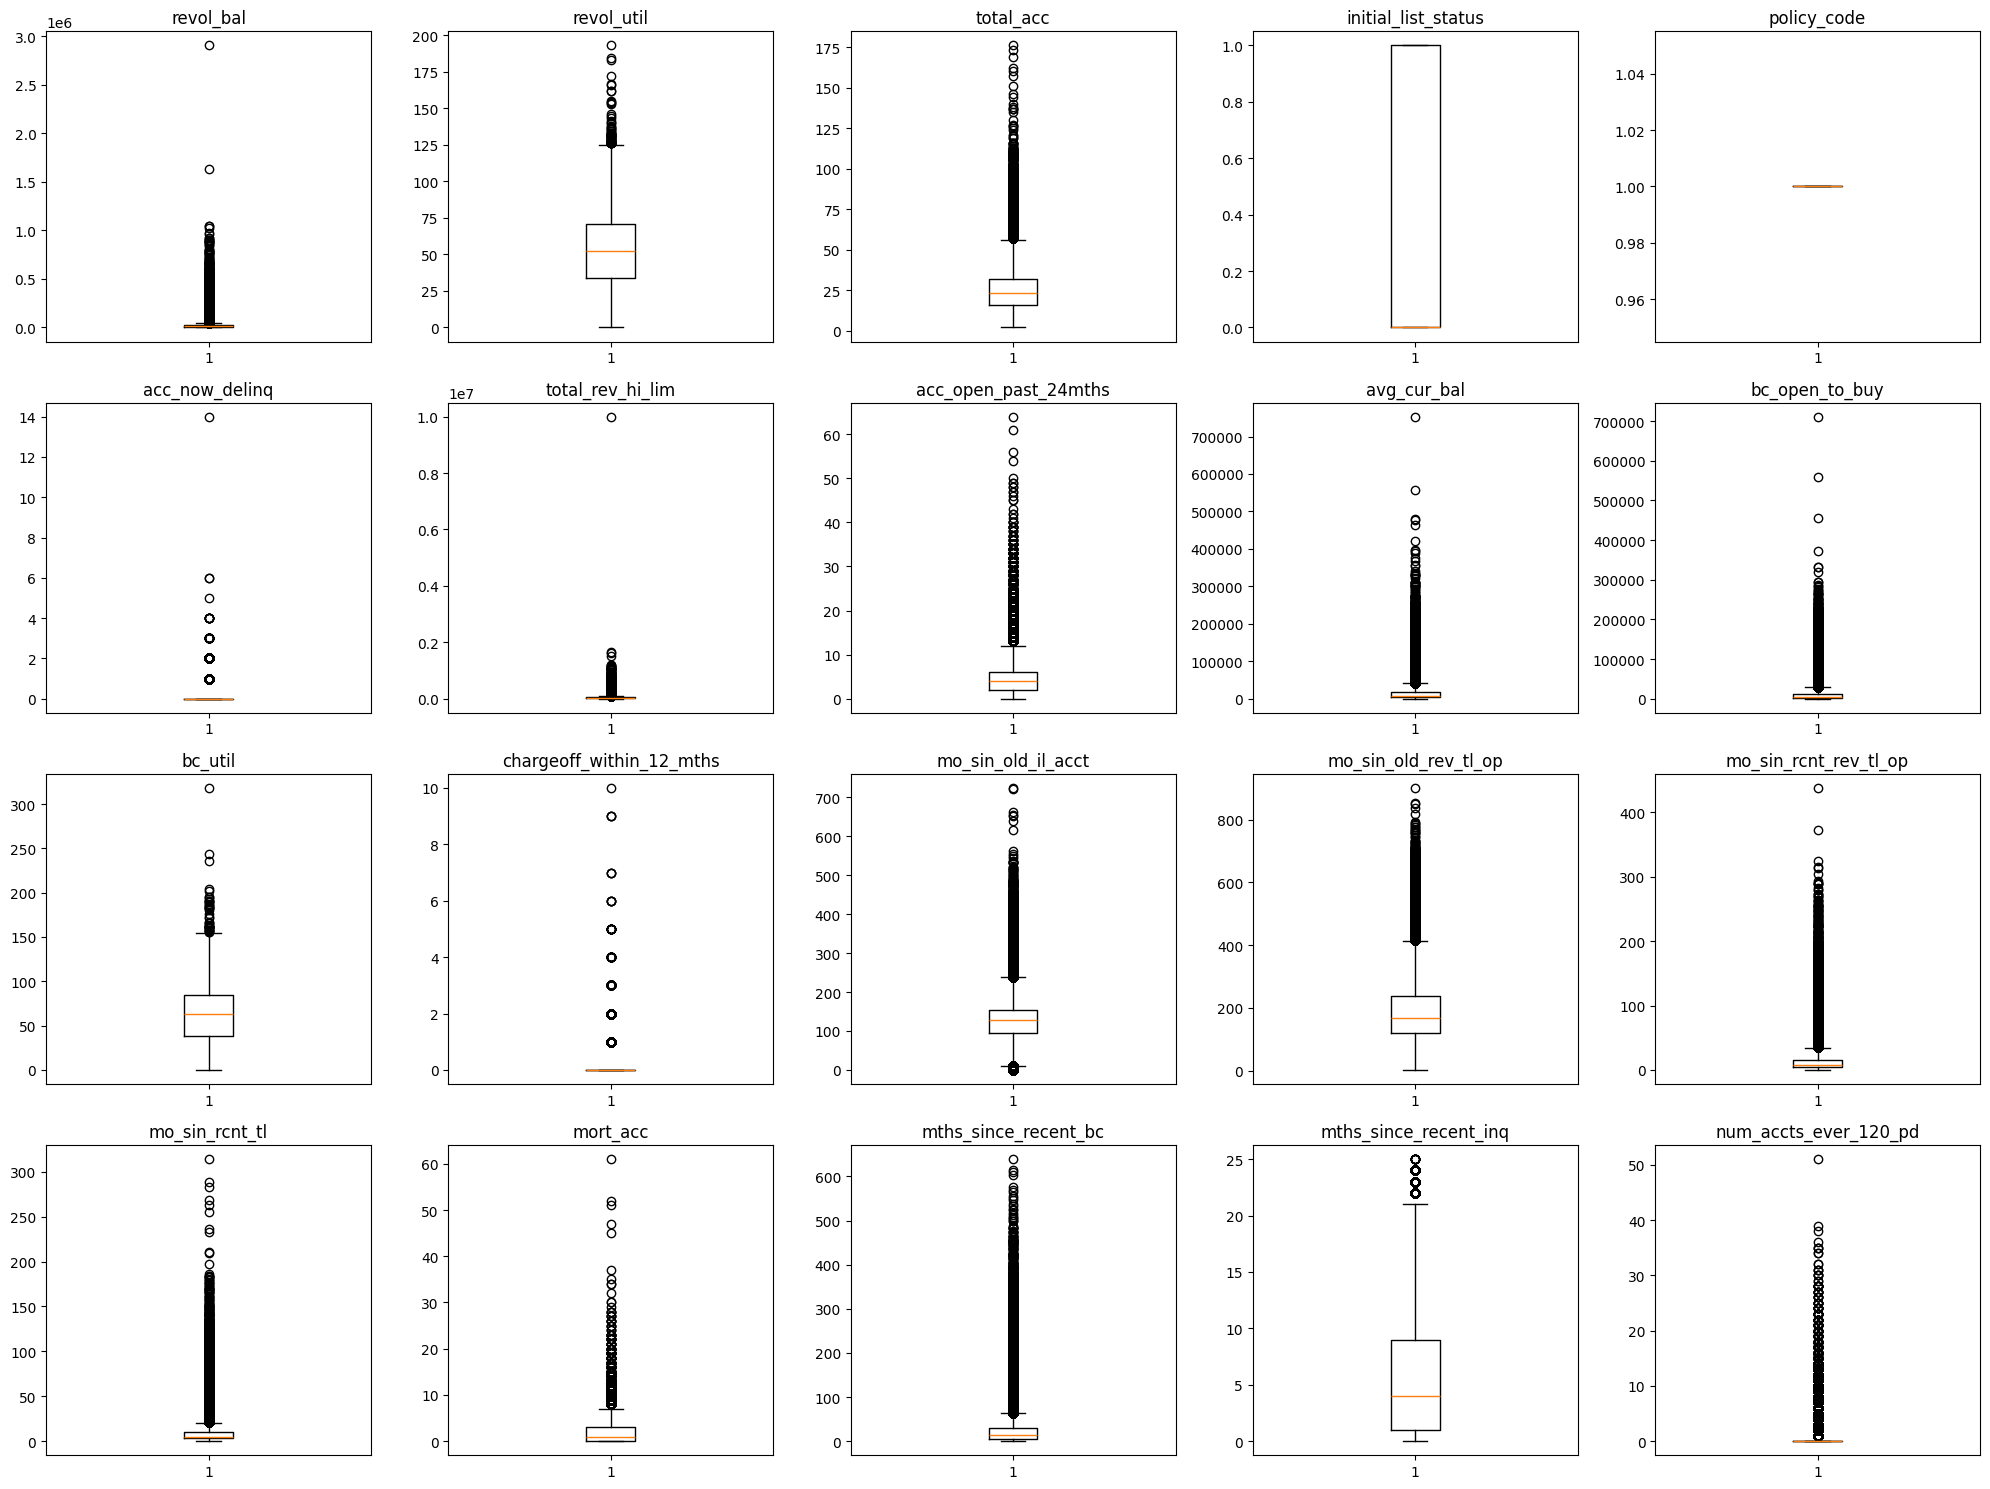

In [16]:
# 모든 컬럼의 박스플롯 (id, loan_status 제외)
columns_to_plot = [col for col in lending_club.columns if col not in ['id', 'loan_status']]

# 박스플롯 20:40
columns_to_plot = columns_to_plot[20:40]

# 서브플롯의 행과 열 설정
rows, cols = 4, 5

# 박스플롯 그리기
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    axes[i].boxplot(lending_club[col].dropna(), vert=True)  # 세로로 바꿔서 플롯
    axes[i].set_title(col)

# 남은 서브플롯 숨기기
for j in range(len(columns_to_plot), rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [17]:
lending_club.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'installment',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'policy_code', 'acc_now_delinq',
       'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
       'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
       'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'num_tl_o

In [5]:
# policy_code 1이 아닌 값 찾기
lending_club[lending_club['policy_code']!=1]

# 필요 없는 컬럼policy_code drop
lending_club.drop('policy_code', axis=1, inplace=True)
lending_club_test.drop('policy_code', axis=1, inplace=True)

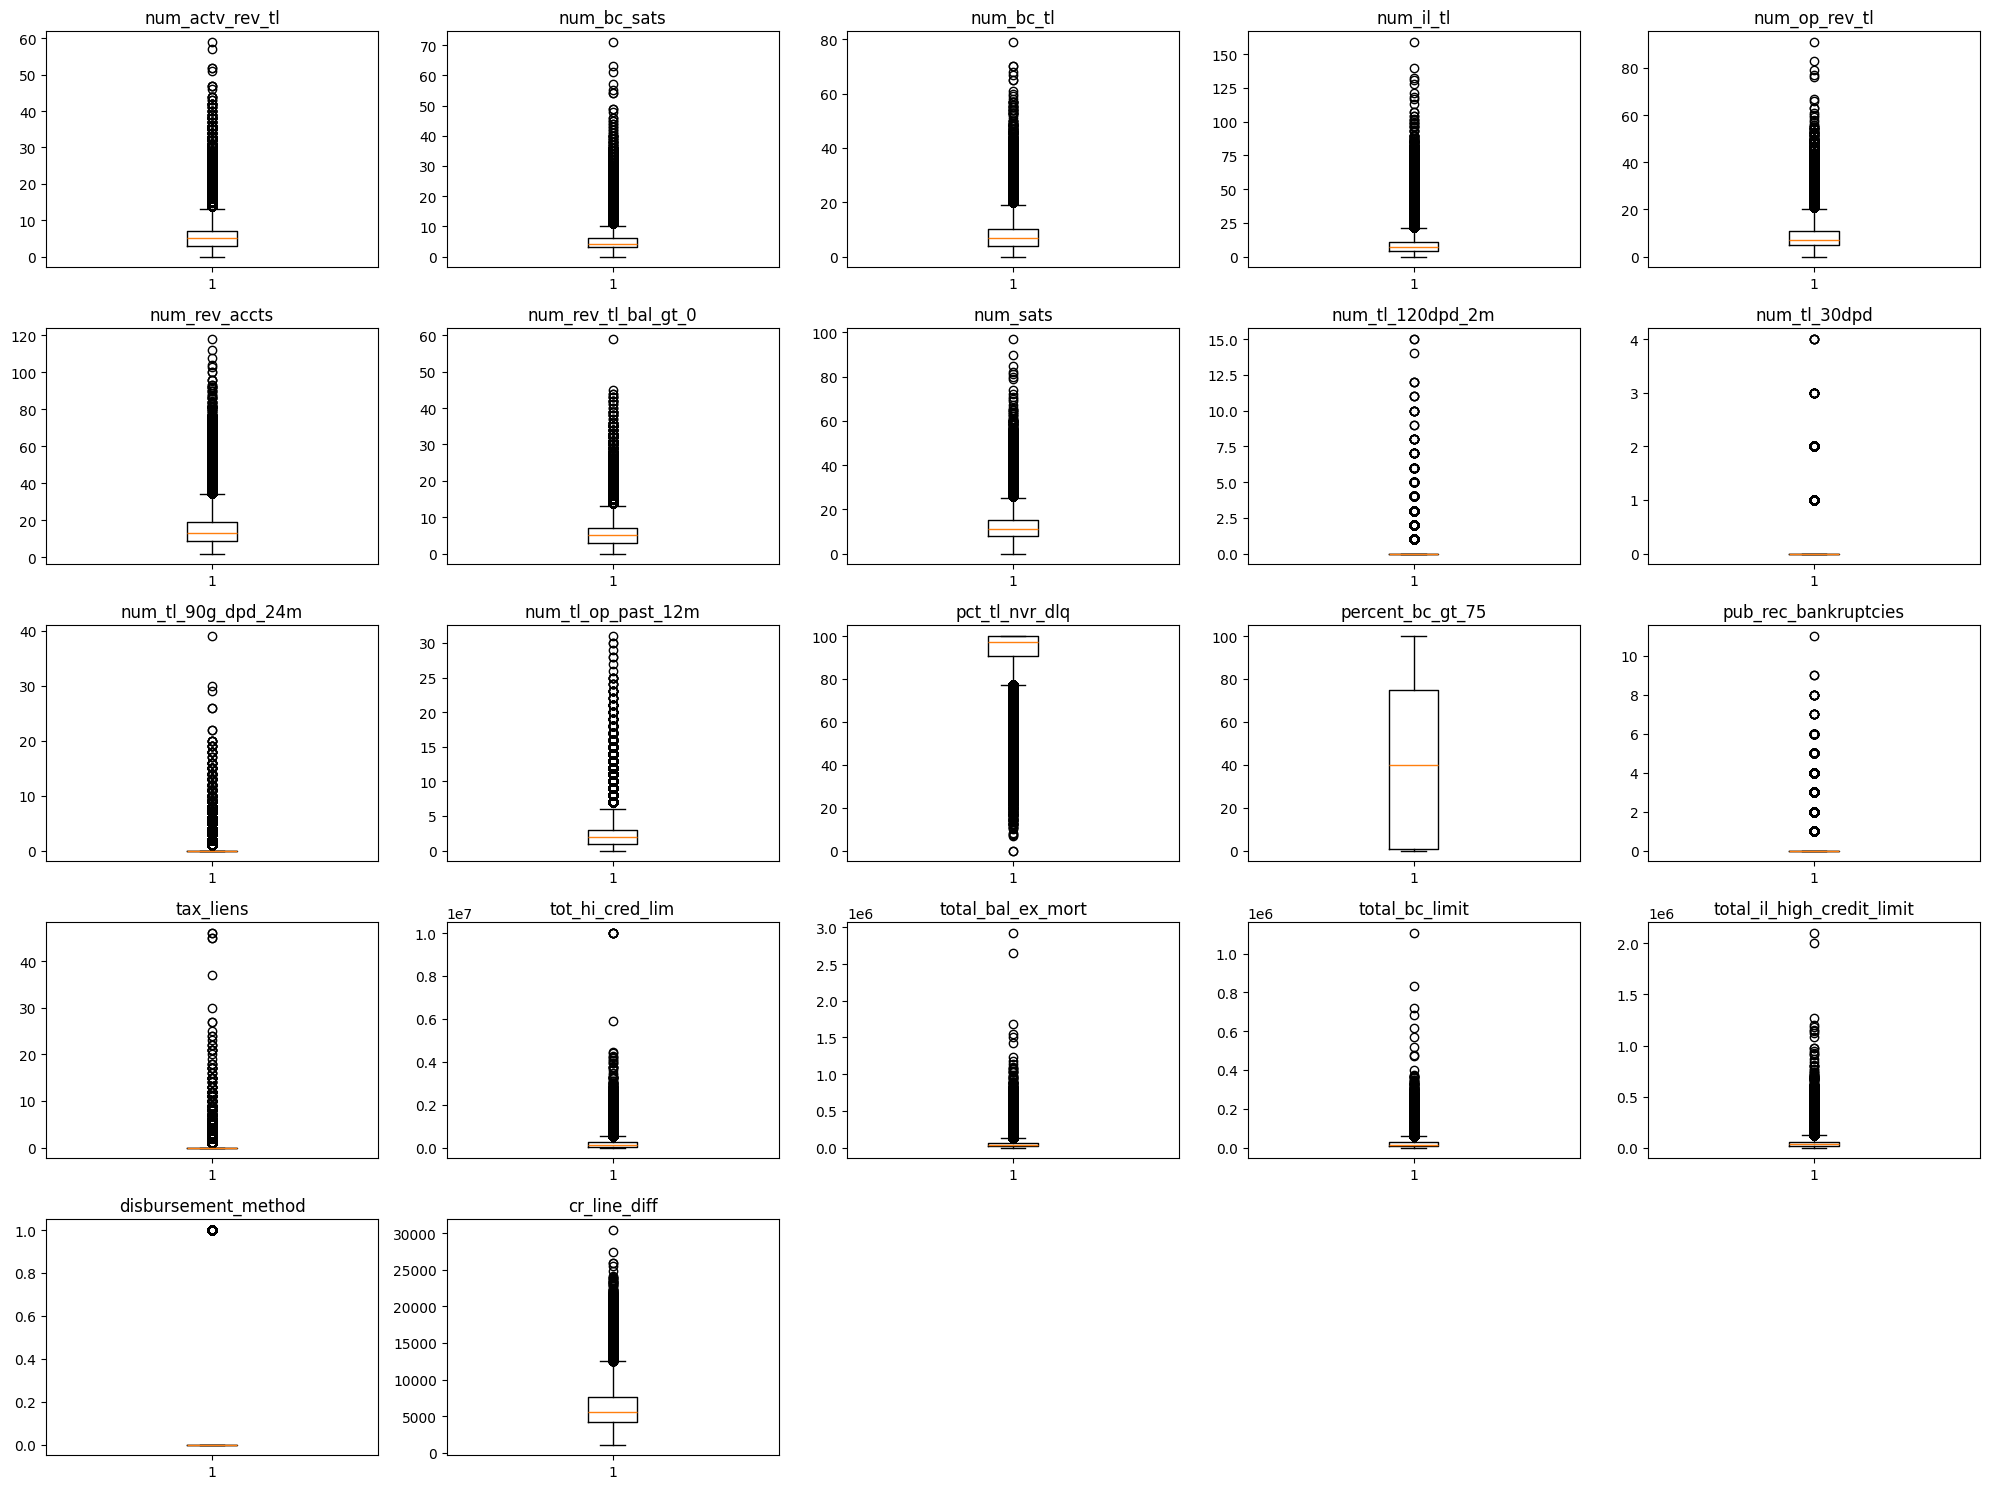

In [19]:
# 모든 컬럼의 박스플롯 (id, loan_status 제외)
columns_to_plot = [col for col in lending_club.columns if col not in ['id', 'loan_status']]

# 박스플롯 40:
columns_to_plot = columns_to_plot[40:]

# 서브플롯의 행과 열 설정
rows, cols = 5, 5

# 박스플롯 그리기
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    axes[i].boxplot(lending_club[col].dropna(), vert=True)  # 세로로 바꿔서 플롯
    axes[i].set_title(col)

# 남은 서브플롯 숨기기
for j in range(len(columns_to_plot), rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

거리 기반의 모델을 사용할 경우

1. winsorizing

2. log 변환 -> 데이터의 형태로 보아 log 변환이 적절해보임 (금액, 기간 등 극단치가 상방에 모여있는 형태)

트리 기반의 모델을 사용할 경우

1. 원본 데이터 사용

In [7]:
# - 값 포함된 행 추적
lending_club[lending_club.lt(0).any(axis=1)] # 1개 값에서 dti -1 값 발생, 직접 전처리한 값이 아님

# - 값 0으로 대체
lending_club.loc[lending_club.lt(0).any(axis=1), :] = 0

In [21]:
# 트리 기반 생략

# id, loan_status를 제외한 컬럼
columns_to_log = [col for col in lending_club.columns if col not in ['id', 'loan_status']]

# 로그 변환
lending_club[columns_to_log] = np.log1p(lending_club[columns_to_log])
lending_club_test[columns_to_log] = np.log1p(lending_club_test[columns_to_log])

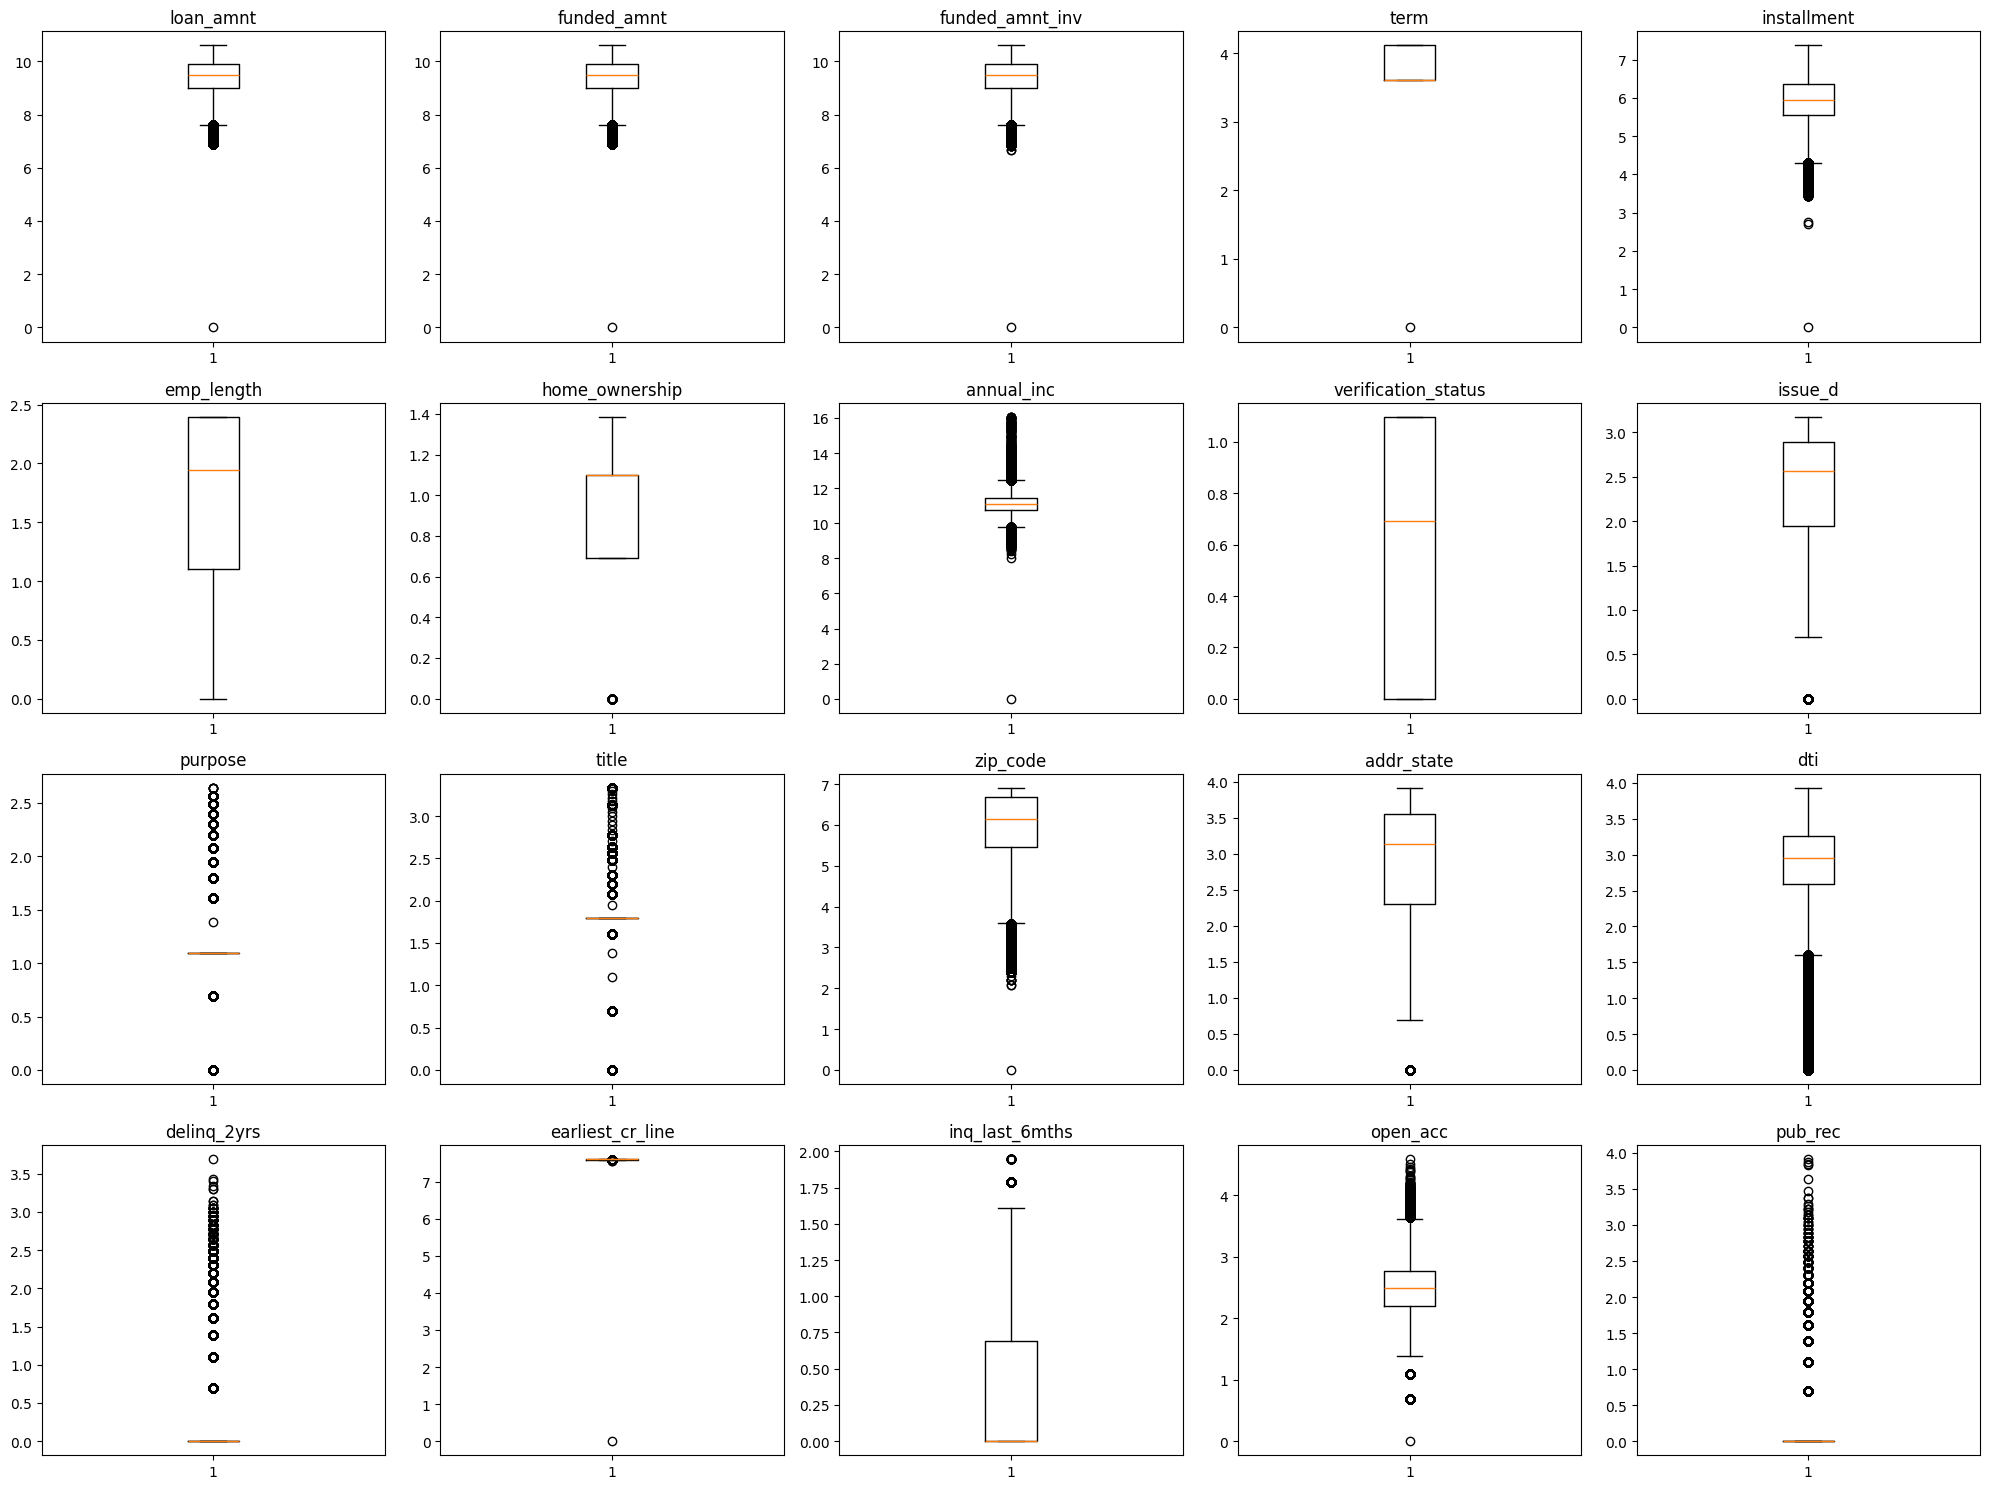

In [22]:
# 모든 컬럼의 박스플롯 (id, loan_status 제외)
columns_to_plot = [col for col in lending_club.columns if col not in ['id', 'loan_status']]

# 박스플롯을 그릴 최대 컬럼 수
max_cols = 20
if len(columns_to_plot) > max_cols:
    columns_to_plot = columns_to_plot[:max_cols]

# 서브플롯의 행과 열 설정
rows, cols = 4, 5

# 박스플롯 그리기
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    axes[i].boxplot(lending_club[col].dropna(), vert=True)  # 세로로 바꿔서 플롯
    axes[i].set_title(col)

# 남은 서브플롯 숨기기
for j in range(len(columns_to_plot), rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

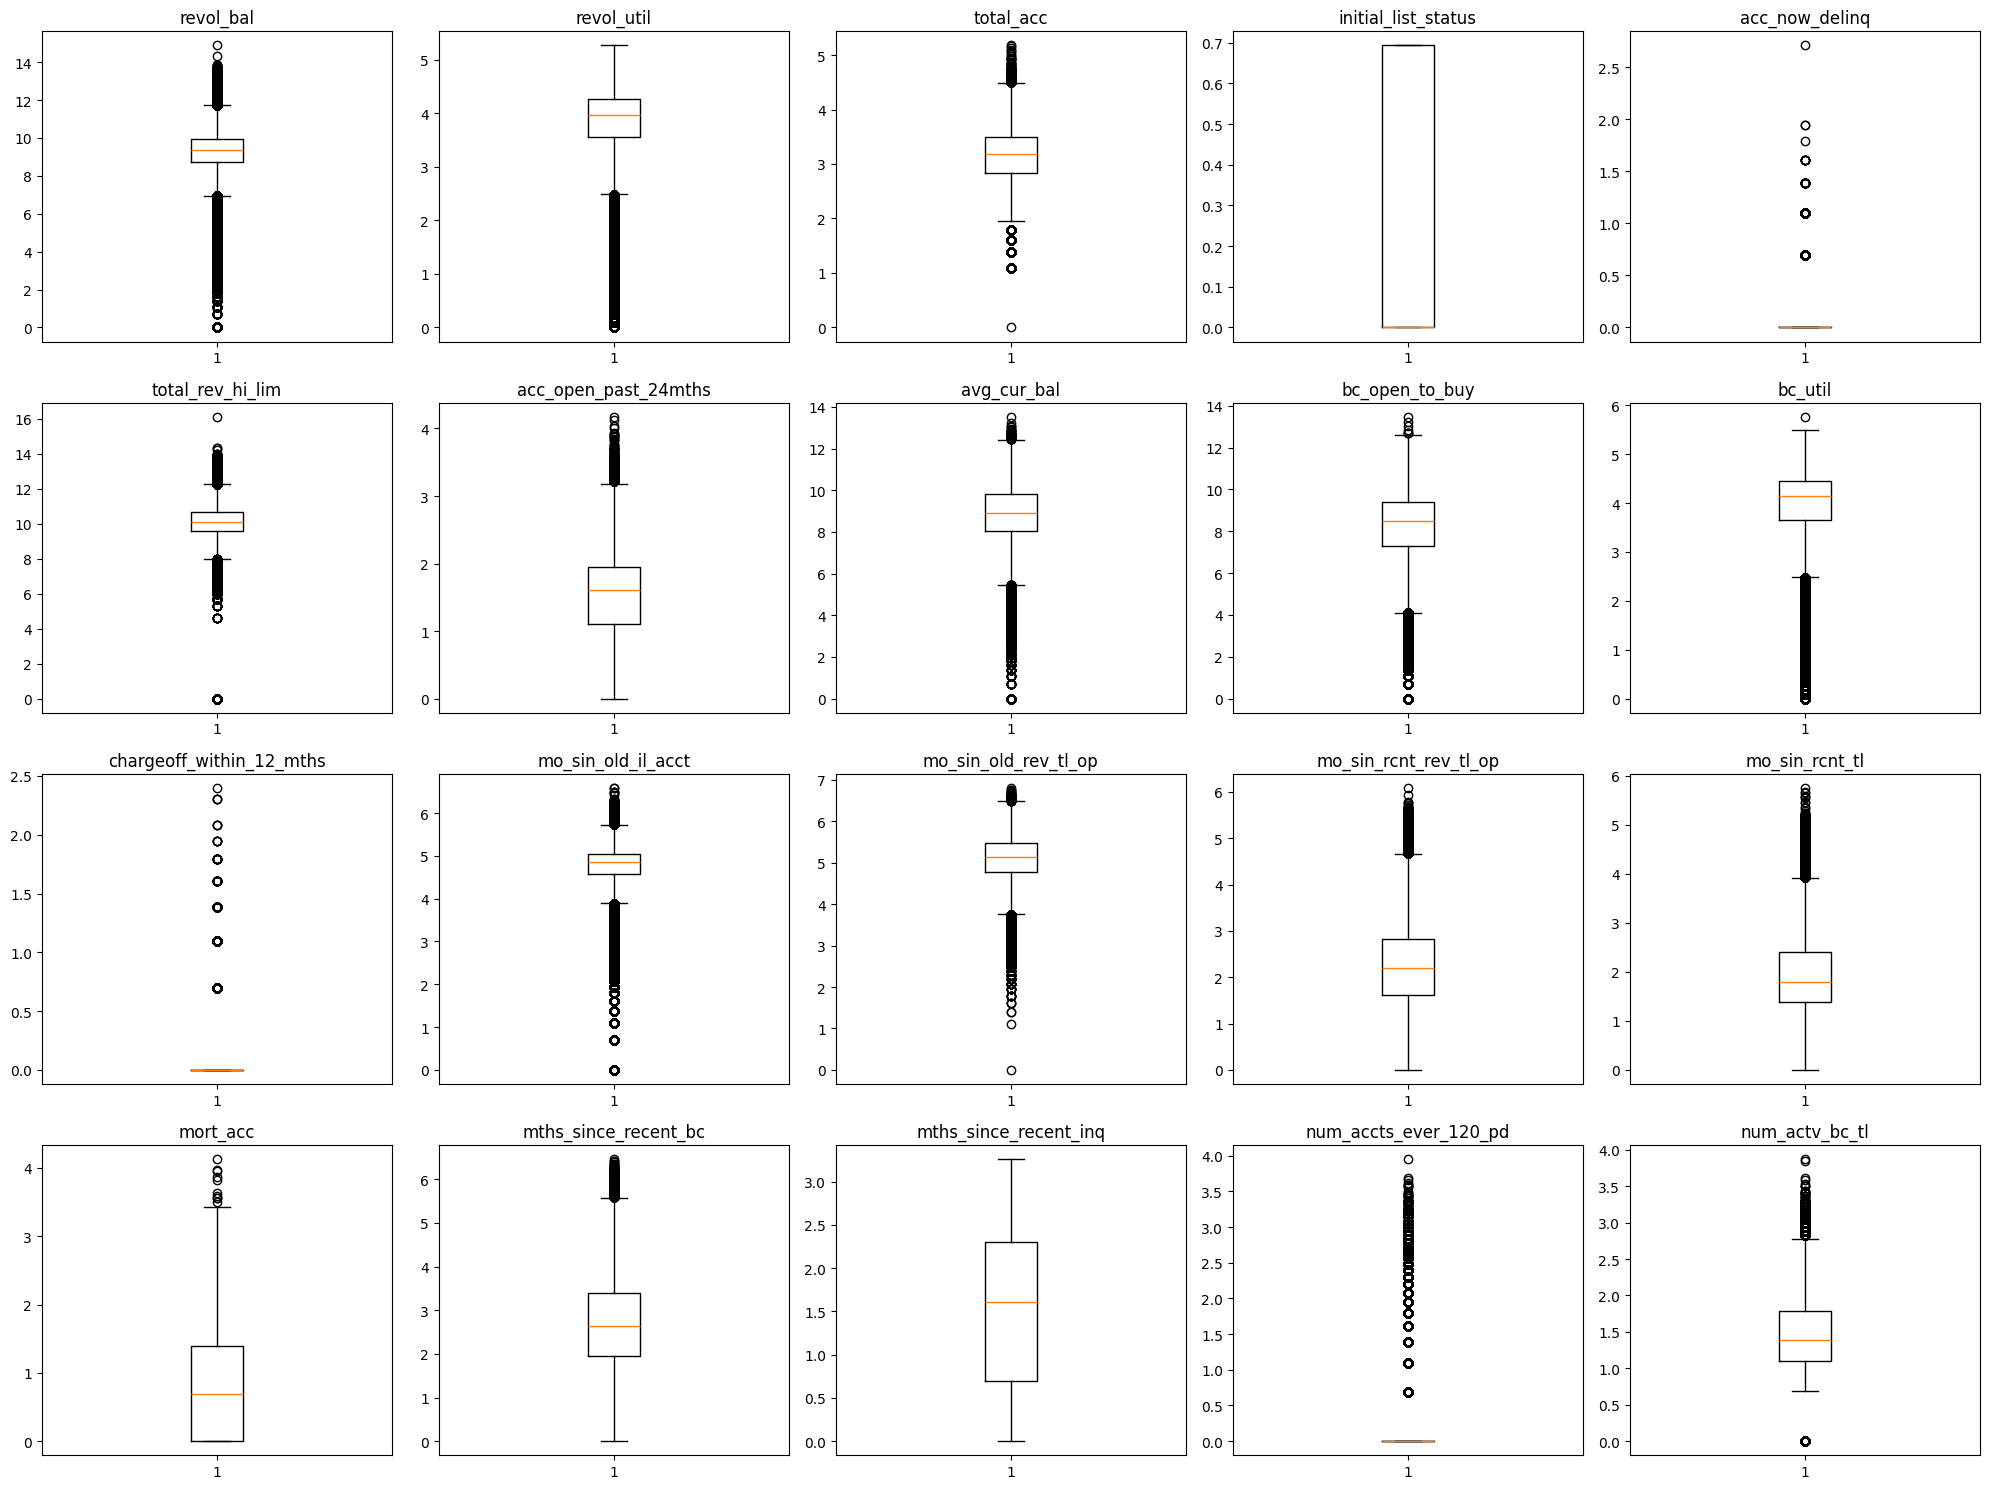

In [23]:
# 모든 컬럼의 박스플롯 (id, loan_status 제외)
columns_to_plot = [col for col in lending_club.columns if col not in ['id', 'loan_status']]

# 박스플롯 20:40
columns_to_plot = columns_to_plot[20:40]

# 서브플롯의 행과 열 설정
rows, cols = 4, 5

# 박스플롯 그리기
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    axes[i].boxplot(lending_club[col].dropna(), vert=True)  # 세로로 바꿔서 플롯
    axes[i].set_title(col)

# 남은 서브플롯 숨기기
for j in range(len(columns_to_plot), rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

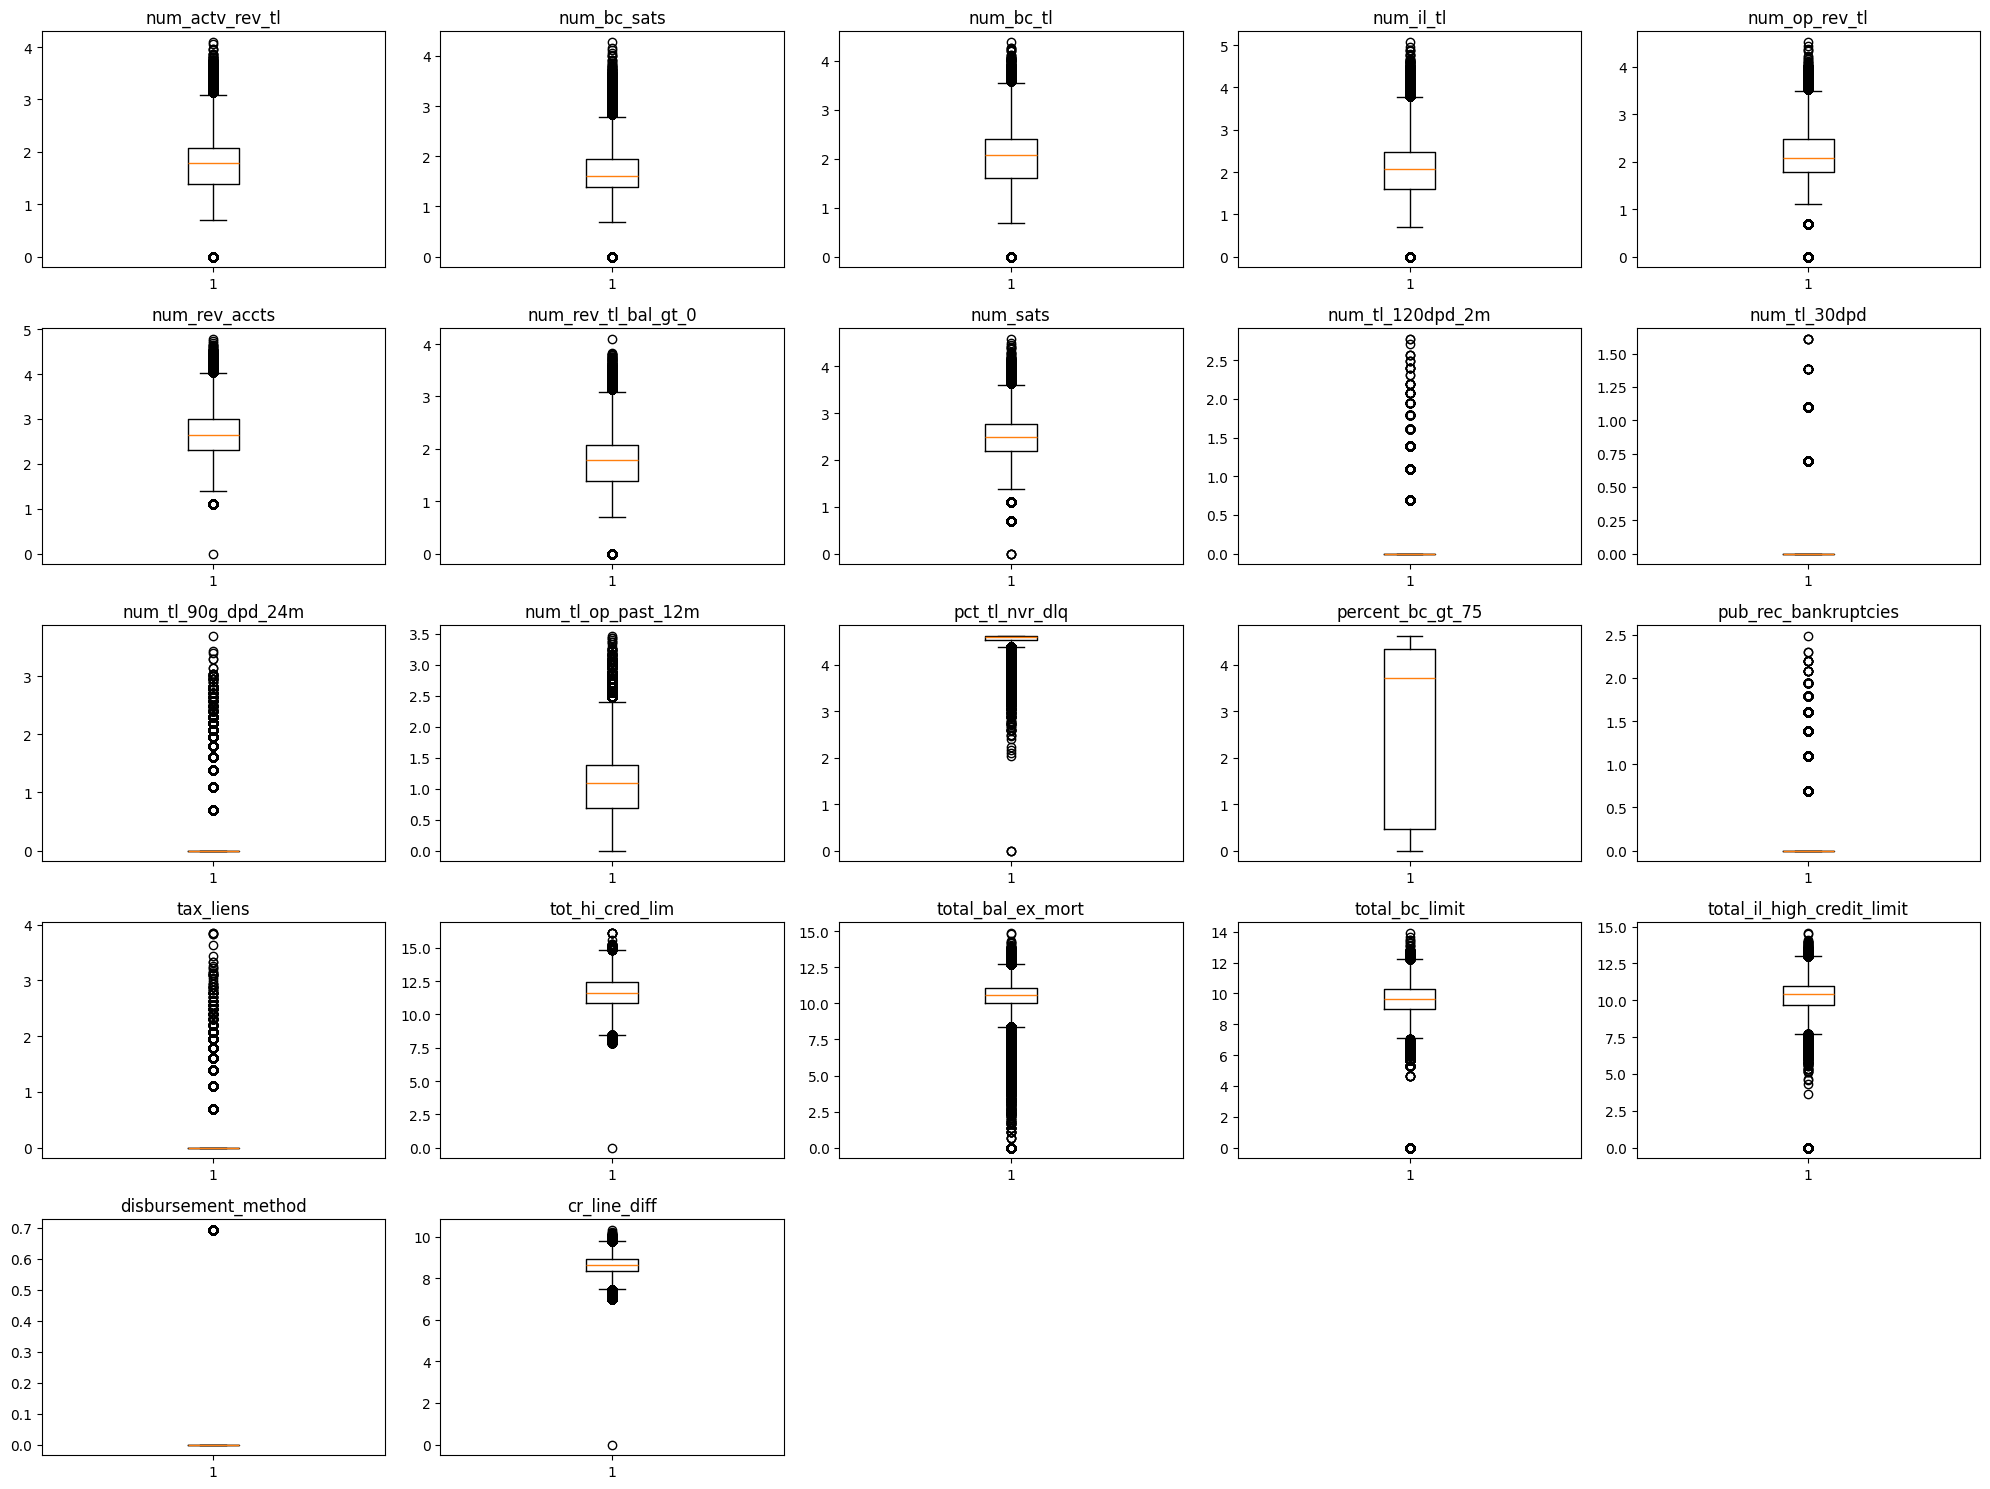

In [24]:
# 모든 컬럼의 박스플롯 (id, loan_status 제외)
columns_to_plot = [col for col in lending_club.columns if col not in ['id', 'loan_status']]

# 박스플롯 40:
columns_to_plot = columns_to_plot[40:]

# 서브플롯의 행과 열 설정
rows, cols = 5, 5

# 박스플롯 그리기
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    axes[i].boxplot(lending_club[col].dropna(), vert=True)  # 세로로 바꿔서 플롯
    axes[i].set_title(col)

# 남은 서브플롯 숨기기
for j in range(len(columns_to_plot), rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 2-5) 데이터 스케일링
- MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
- 트리기반의 경우 생략

In [25]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler, QuantileTransformer

# id, loan_status를 제외한 컬럼
columns_to_scale = [col for col in lending_club.columns if col not in ['id', 'loan_status']]

scaler = MinMaxScaler()
# scaler = StandardScaler()
# scaler = RobustScaler()
# scaler = QuantileTransformer()

lending_club[columns_to_scale] = scaler.fit_transform(lending_club[columns_to_scale])
lending_club_test[columns_to_scale] = scaler.transform(lending_club_test[columns_to_scale])

In [26]:
# 확인
print(lending_club, lending_club_test)

        loan_amnt  funded_amnt  funded_amnt_inv      term  installment  \
0        0.772788     0.772788         0.772788  0.878382     0.654171   
1        0.954508     0.954508         0.954508  0.878382     0.910700   
2        0.987399     0.987399         0.987399  1.000000     0.912280   
3        0.872884     0.872884         0.872884  1.000000     0.769858   
4        0.885993     0.885993         0.885993  0.878382     0.815154   
...           ...          ...              ...       ...          ...   
784029   0.951795     0.951795         0.951795  1.000000     0.854926   
784030   0.951795     0.951795         0.951795  1.000000     0.847824   
784031   1.000000     1.000000         1.000000  1.000000     0.917040   
784032   0.951795     0.951795         0.951795  1.000000     0.860075   
784033   0.900933     0.900933         0.900933  1.000000     0.787103   

        emp_length  home_ownership  annual_inc  verification_status   issue_d  \
0         1.000000        0.79

# III. 통계 검증

1) 기초 통계량 (ds1, ds2) 및 상관 분석
-> 부실과 정상 간의 특성 구분
-> t-test (평균값의 차이를 통한 집단 간 차이 검증, 정규성 검증)

- corr
- 정규성
- T-test

## 3-1) corr

<Axes: >

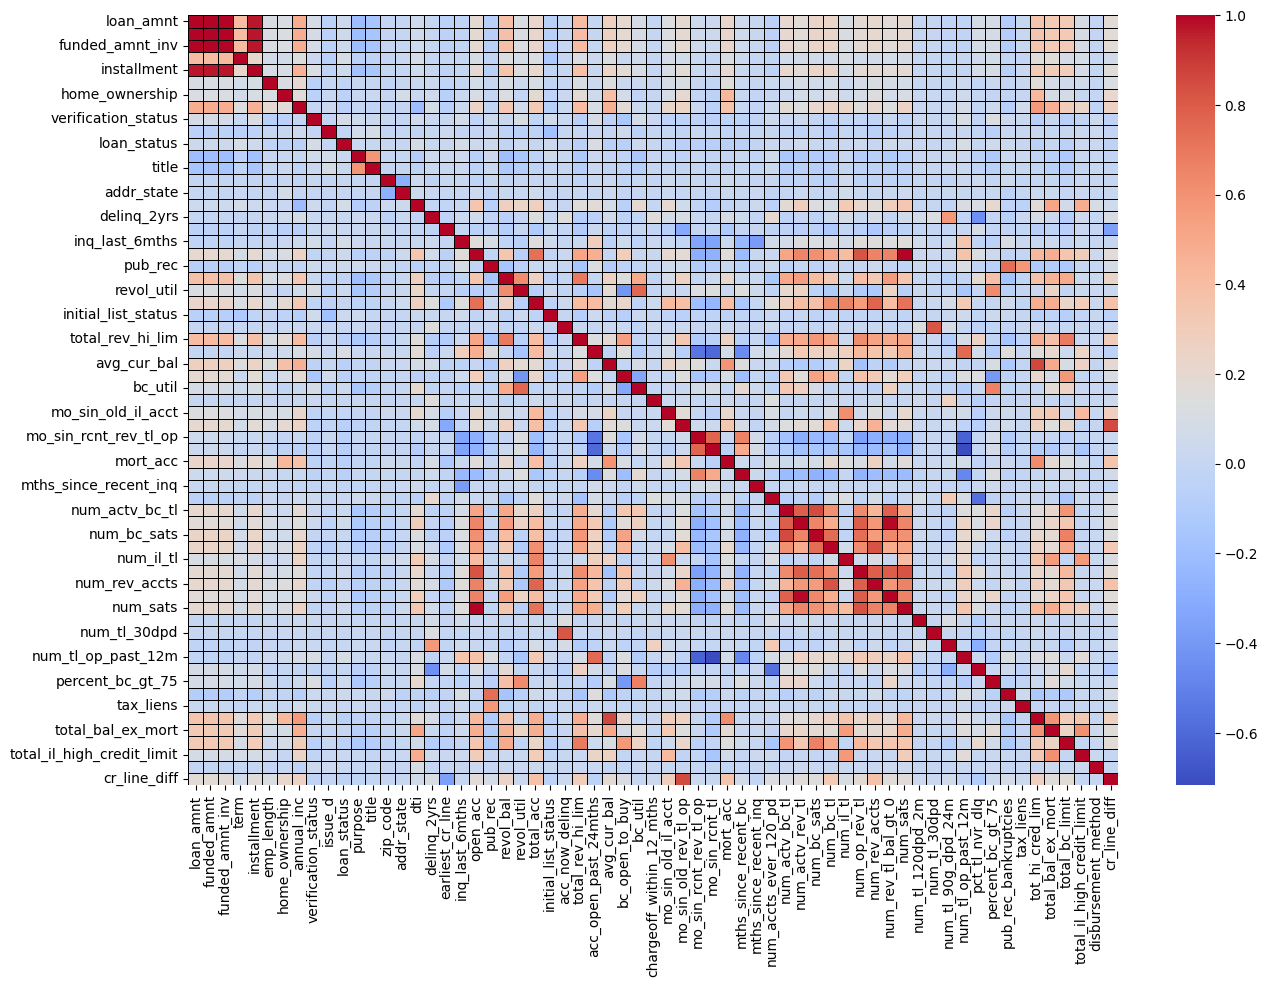

In [227]:
plt.figure(figsize=(15, 10))
sns.heatmap(lending_club.corr(), annot=False, linecolor='black', linewidths=0.5, cmap='coolwarm')

## 3-2) shapiro

In [228]:
# 정규성을 만족하지 않는 컬럼을 담을 리스트
non_normal_columns = []

# 각 컬럼에 대해 Shapiro-Wilk 검정 수행
for column in lending_club.columns:
    if lending_club[column].dtype in ['float64', 'int64']:  # 수치형 데이터에 대해서만 수행
        stat, p_value = stats.shapiro(lending_club[column].dropna())  # NaN 값은 제외
        if p_value < 0.01:  # p-value가 0.01보다 작으면 정규성을 만족하지 않음
            non_normal_columns.append(column)

print("정규성을 만족하지 않는 컬럼:")
print(non_normal_columns)
print(len(non_normal_columns))

p-value may not be accurate for N > 5000.


정규성을 만족하지 않는 컬럼:
['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'installment', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'acc_now_delinq', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_l

## 3-3) t-test

In [229]:
group_0 = lending_club[lending_club['loan_status'] == 0]
group_1 = lending_club[lending_club['loan_status'] == 1]

# t-검정을 수행하여 p-value가 0.01보다 작은 열을 담을 리스트
ttest_pass_columns = []

# 각 컬럼에 대해 t-검정 수행
for column in lending_club.columns:
    if lending_club[column].dtype in ['float64', 'int64'] and column != 'loan_status':  # 수치형 데이터에 대해서만 수행
        stat, p_value = stats.ttest_ind(group_0[column].dropna(), group_1[column].dropna(), equal_var=False)  # 등분산 가정하지 않음
        if p_value < 0.01:  # p-value가 0.01보다 작으면 두 그룹 간의 평균 차이가 있음
            ttest_pass_columns.append(column)

print("대립가설 채택 피처 (p-value < 0.01):")
print(ttest_pass_columns)
print(len(ttest_pass_columns))

대립가설 채택 피처 (p-value < 0.01):
['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'installment', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'tota

In [8]:
X = lending_club.drop('loan_status', axis=1)
y = lending_club['loan_status']

# X_test, y_test
X_test = lending_club_test.drop('loan_status', axis=1)
y_test = lending_club_test['loan_status']

## ----- 리샘플링 -----

1. over

2. under

3. 원본

In [9]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN
from imblearn.under_sampling import TomekLinks, EditedNearestNeighbours

# # resample = BorderlineSMOTE(k_neighbors=7, m_neighbors=7,sampling_strategy=0.25, random_state=17)
# resample = ADASYN(n_neighbors=5,sampling_strategy=0.5, random_state=17)
# # resample = EditedNearestNeighbours(n_neighbors=5)

# # SMOTE
# X_resampled, y_resampled = resample.fit_resample(X, y)
# # X_test, y_test = under.fit_resample(X_test,y_test)

# # 리샘플 데이터 확인
# original_shape = X.shape
# resampled_shape = X_resampled.shape

# original_shape, resampled_shape


# raw
X_resampled, y_resampled = X, y

# Ⅳ. 피처셀렉션

1) 거리기반 모델

1-1) 

- t-test & corr

-> Stepwise, Forward, Backward

-> Lasso

-> VIF

1-2) RFE

2) 트리기반

- RFE

- 모든 피처 사용

In [33]:
# loan_amount와 다른 피처 간의 상관관계 계산
corr = lending_club.corr()['loan_status'].drop('loan_status')

# 절대값 기준으로 상관관계를 정렬
corr_sorted = corr.abs().sort_values(ascending=False)

# 원래 값과 함께 출력
corr_sorted_with_sign = corr.loc[corr_sorted.index]

print("loan_status와 다른 피처 간의 상관관계 (절대값 기준 높은 순서):")
print(corr_sorted_with_sign)

loan_status와 다른 피처 간의 상관관계 (절대값 기준 높은 순서):
acc_open_past_24mths    0.112915
term                    0.100149
num_tl_op_past_12m      0.099914
verification_status     0.085858
inq_last_6mths          0.079979
                          ...   
total_bal_ex_mort       0.003609
pct_tl_nvr_dlq         -0.003462
acc_now_delinq          0.001896
zip_code                0.000972
num_tl_30dpd            0.000774
Name: loan_status, Length: 62, dtype: float64


In [34]:
corr_sorted_with_sign.head(20).index

Index(['acc_open_past_24mths', 'term', 'num_tl_op_past_12m',
       'verification_status', 'inq_last_6mths', 'dti', 'mo_sin_rcnt_tl',
       'tot_hi_cred_lim', 'avg_cur_bal', 'mo_sin_rcnt_rev_tl_op',
       'bc_open_to_buy', 'mort_acc', 'mths_since_recent_bc', 'annual_inc',
       'mo_sin_old_rev_tl_op', 'total_rev_hi_lim', 'total_bc_limit',
       'num_actv_rev_tl', 'num_rev_tl_bal_gt_0', 'home_ownership'],
      dtype='object')

In [37]:
corr_pass = ['acc_open_past_24mths', 'num_tl_op_past_12m', 'term', 'dti',
       'verification_status', 'inq_last_6mths', 'total_bc_limit',
       'bc_open_to_buy', 'tot_hi_cred_lim', 'avg_cur_bal', 'mo_sin_rcnt_tl',
       'mort_acc', 'mo_sin_rcnt_rev_tl_op', 'mths_since_recent_bc',
       'mo_sin_old_rev_tl_op', 'total_rev_hi_lim', 'num_actv_rev_tl',
       'num_rev_tl_bal_gt_0', 'percent_bc_gt_75', 'home_ownership']

# ttset & corr == 20
len(set(ttest_pass_columns).intersection(set(corr_pass)))

## 4-1) Stepwise

In [42]:
# 스텝와이즈 선택
def stepwise_selection(X_train, y_train, 
                    initial_list=[], 
                    threshold_in=0.01, 
                    threshold_out = 0.05, 
                    verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # 포워드 단계
        excluded = list(set(X_train.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # 백워드 단계
        model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

selected_features_step = stepwise_selection(X_resampled[corr_pass], y_resampled)

print('resulting features:')
print(selected_features_step)

Add  total_rev_hi_lim               with p-value 0.0
Add  term                           with p-value 0.0
Add  verification_status            with p-value 0.0
Add  num_tl_op_past_12m             with p-value 0.0
Add  mort_acc                       with p-value 0.0
Add  dti                            with p-value 0.0
Add  tot_hi_cred_lim                with p-value 0.0
Add  num_rev_tl_bal_gt_0            with p-value 0.0
Add  inq_last_6mths                 with p-value 0.0
Add  bc_open_to_buy                 with p-value 0.0
Add  acc_open_past_24mths           with p-value 0.0
Add  percent_bc_gt_75               with p-value 5.94156e-133
Add  home_ownership                 with p-value 3.48991e-117
Add  mo_sin_old_rev_tl_op           with p-value 6.31651e-88
Add  mths_since_recent_bc           with p-value 1.2217e-55
Add  mo_sin_rcnt_rev_tl_op          with p-value 7.05597e-44
Add  avg_cur_bal                    with p-value 3.57903e-21
resulting features:
['total_rev_hi_lim', 'term', '

## 4-2) Forward

In [43]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while len(initial_features)>0:
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if min_p_value < significance_level:
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

selected_features_forward = forward_selection(X_resampled[corr_pass], y_resampled)
print(selected_features_forward)

['total_rev_hi_lim', 'term', 'verification_status', 'num_tl_op_past_12m', 'mort_acc', 'dti', 'tot_hi_cred_lim', 'num_rev_tl_bal_gt_0', 'inq_last_6mths', 'bc_open_to_buy', 'acc_open_past_24mths', 'percent_bc_gt_75', 'home_ownership', 'mo_sin_old_rev_tl_op', 'mths_since_recent_bc', 'mo_sin_rcnt_rev_tl_op', 'avg_cur_bal', 'total_bc_limit']


## 4-3) Backward

In [44]:
# 백워드
def backward_elimination(X_train, y_train, significance_level = 0.001):
    features = X_train.columns.tolist()
    while len(features) > 0:
        features_with_constant = sm.add_constant(X_train[features])
        p_values = sm.OLS(y_train, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()

        if max_p_value >= significance_level:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 

    return features

selected_features_back = backward_elimination(X_resampled[corr_pass], y_resampled)
print(selected_features_back)

['acc_open_past_24mths', 'num_tl_op_past_12m', 'term', 'dti', 'verification_status', 'inq_last_6mths', 'bc_open_to_buy', 'tot_hi_cred_lim', 'avg_cur_bal', 'mort_acc', 'mo_sin_rcnt_rev_tl_op', 'mths_since_recent_bc', 'mo_sin_old_rev_tl_op', 'total_rev_hi_lim', 'num_rev_tl_bal_gt_0', 'percent_bc_gt_75', 'home_ownership']


## 4-4) Lasso

In [45]:
from sklearn.linear_model import Lasso

# 라쏘 모델 생성 및 훈련
lasso = Lasso(alpha=0.001)  # alpha 값은 조정이 필요할 수 있음
lasso.fit(X_resampled[corr_pass], y_resampled)

# 사용된 피처의 인덱스 확인
selected_feature_indices = np.where(lasso.coef_ != 0)[0]

# 인덱스를 사용하여 컬럼명 추출
selected_features_lasso = X_resampled.columns[selected_feature_indices]

print("Selected features based on Lasso:", selected_features_lasso)

Selected features based on Lasso: Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'installment',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'title', 'addr_state', 'dti', 'inq_last_6mths', 'open_acc',
       'pub_rec'],
      dtype='object')


In [46]:
# 교집합 찾기
common_features = set(selected_features_step).intersection(set(selected_features_lasso))
common_features_2 = set(selected_features_back).intersection(set(selected_features_lasso))
common_features_3 = set(selected_features_step).intersection(set(selected_features_back)).intersection(set(selected_features_forward))
# 결과 출력
print("공통으로 선택된 피처들:", common_features)
print("공통으로 선택된 피처의 수:", len(common_features))

print("공통으로 선택된 피처들:", common_features_2)
print("공통으로 선택된 피처의 수:", len(common_features_2))

print("공통으로 선택된 피처들:", common_features_3)
print("공통으로 선택된 피처의 수:", len(common_features_3))

공통으로 선택된 피처들: {'term', 'verification_status', 'dti', 'home_ownership', 'inq_last_6mths'}
공통으로 선택된 피처의 수: 5
공통으로 선택된 피처들: {'term', 'verification_status', 'dti', 'home_ownership', 'inq_last_6mths'}
공통으로 선택된 피처의 수: 5
공통으로 선택된 피처들: {'total_rev_hi_lim', 'term', 'verification_status', 'tot_hi_cred_lim', 'num_tl_op_past_12m', 'dti', 'mort_acc', 'num_rev_tl_bal_gt_0', 'percent_bc_gt_75', 'home_ownership', 'mths_since_recent_bc', 'inq_last_6mths', 'bc_open_to_buy', 'avg_cur_bal', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_old_rev_tl_op', 'acc_open_past_24mths'}
공통으로 선택된 피처의 수: 17


## 4-5) VIF

In [47]:
import statsmodels.api as sm

cols = ['dti', 'verification_status', 'inq_last_6mths', 'term', 'home_ownership']

from statsmodels.stats.outliers_influence import variance_inflation_factor

# 숫자 컬럼 선택
numeric_cols = X_resampled[cols].select_dtypes(include='number').columns.tolist()

# VIF 계산
VIF_data = pd.DataFrame()
VIF_data['feature'] = numeric_cols
VIF_data['VIF'] = [variance_inflation_factor(X_resampled[numeric_cols].values, i) for i in range(len(numeric_cols))]

# VIF 출력
VIF_data.sort_values(by='VIF', ascending=False)

feature        VIF
3                 term  43.506920
0                  dti  27.329165
4       home_ownership  17.430112
1  verification_status   2.820018
2       inq_last_6mths   1.484675

<Axes: >

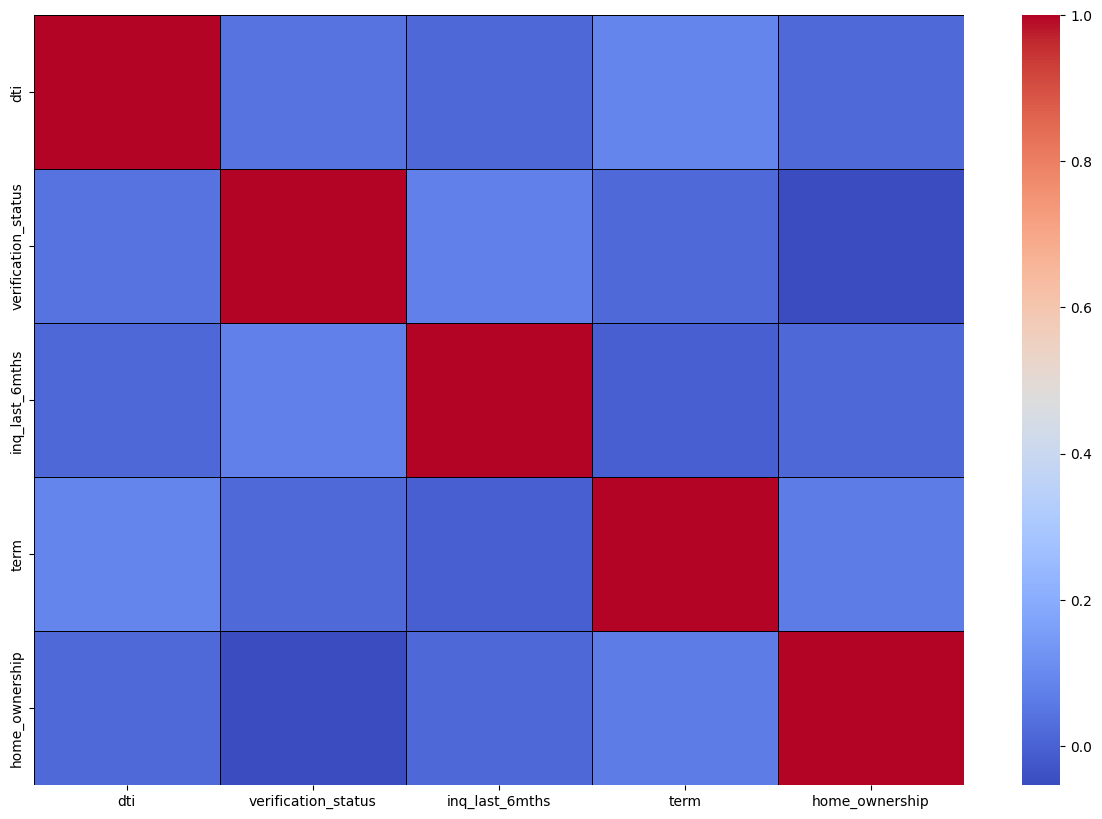

In [48]:
plt.figure(figsize=(15, 10))
sns.heatmap(lending_club[cols].corr(), annot=False, linecolor='black', linewidths=0.5, cmap='coolwarm')

## 4-6) RFE

In [ ]:
# from xgboost import XGBClassifier
# from sklearn.feature_selection import RFE, RFECV, SelectFromModel

# # 모델을 통한 피처셀렉
# def feature_select(X_resampled, y_resampled, min_features = 30, step = 5, cv = 5) :
#     model = XGBClassifier(random_state=17, n_estimators=100)
#     selector = RFECV(model, step=step, cv=cv, min_features_to_select=min_features, scoring = 'recall')
#     selector = selector.fit(X_resampled, y_resampled)
#     selected_features = X_resampled.columns[selector.support_]
#     return selected_features

# selected_features = feature_select(X_resampled, y_resampled, cv = 5)

In [ ]:
# # 선택된 피처 출력
# print(len(selected_features),selected_features)

In [ ]:
# # 선택된 피처로 X_resampled 정의
# X_resampled = X_resampled[selected_features]
# X_test = X_test[selected_features]

# Ⅴ. 모델링 & 성능평가

- 거리 기반 : 로지스틱 회귀

- bagging : RF

- boosting : XGBoost, LGBM, CatBoost

- DL : TabNet

- 성능평가지표

    1) 대출 신청자 : FP의 경우 -> 잠재 고객을 감소

    2) 투자자 : FN의 경우 -> 손실 발생 -> 투자자 감소

    3) LendingClub : 수요와 공급을 적절히 조절할 수 있는 지표가 필요할 것으로 예상

    -> 주요 지표 : AUROC

In [10]:
# 성능확인 코드
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score, fbeta_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    pr_score = average_precision_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    f2 = fbeta_score(y_test, pred, beta=2)
    
    # G-mean 계산
    tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
    tpr = tp / (tp + fn)  # True Positive Rate
    tnr = tn / (tn + fp)  # True Negative Rate
    fpr = fp / (fp + tn)
    gmean = np.sqrt(tpr * tnr)

    # ar
    ar = 2 * accuracy - 1
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f},F1 스코어:{3:.4f}, f2 :{4:.4f}'.format(accuracy, precision, recall, f1, f2))
    print('ROC 스코어: {0:.4f}, PR 스코어 : {1:.4f}, G-mean : {2:.4f}, AR : {3:.4f}'.format(roc_score, pr_score, gmean, ar))

# 임계값에 따른 오차행렬및 스코어 -------->#임계값 최적 : 재현율기준(0.1)/f1기준(0.3)
from sklearn.preprocessing import Binarizer
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)

        # ROC 커브 계산
        fpr, tpr, thresholds = roc_curve(y_test, pred_proba_c1)
        roc_auc = auc(fpr, tpr)
        # k-s
        ks_statistic = max(tpr - fpr)
        print("임곗값:", custom_threshold)
        print("ROC_AUC:", roc_auc)
        print("K-S:", ks_statistic)
        get_clf_eval(y_test, custom_predict)
        print("---------------------------------------------------------")

from sklearn.metrics import roc_curve, auc
def roc(model,name) :
    # 테스트 데이터에 대한 예측 확률 계산
    pred = model.predict_proba(X_test)[:, 1]

    # ROC 커브 계산
    fpr, tpr, thresholds = roc_curve(y_test, pred)

    # AUC 계산
    roc_auc = auc(fpr, tpr)

    # ROC 커브에 AUC 면적에 색을 입히는 코드 수정
    plt.figure(figsize=(10, 6))

    # ROC 커브 시각화 및 AUC 면적 색칠
    plt.fill_between(fpr, tpr, color='palegoldenrod', alpha=0.4, label=f'Area under curve (AUC = {roc_auc:.2f})')
    plt.plot(fpr, tpr, color='peru', lw=2)

    # 기본 설정
    plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name}')
    plt.legend(loc="lower right")
    return plt.show()

In [11]:
# 데이터 분할 (검증)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=17, stratify= y_resampled)

# # 데이터 분할 (검증) Logistic
from sklearn.model_selection import train_test_split
X_train_lr, X_val_lr, y_train_lr, y_val_lr = train_test_split(X_resampled[cols], y_resampled, test_size=0.2, random_state=17, stratify= y_resampled)

## 5-1) 로지스틱

In [63]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=17, C=0.1, penalty='l2')

lr.fit(X_train_lr, y_train_lr)
y_pred_lr = lr.predict(X_val)
y_pred_proba_lr = lr.predict_proba(X_val)[:, 1]

get_clf_eval(y_val_lr, y_pred_lr)
get_eval_by_threshold(y_val_lr , y_pred_proba_lr.reshape(-1,1), thresholds)

오차행렬
[[64308  2426]
 [20256  3678]]
정확도: 0.7498, 정밀도 : 0.6026, 재현율:0.1537,F1 스코어:0.2449, f2 :0.1806
ROC 스코어: 0.5587, PR 스코어 : 0.3160, G-mean : 0.3848, AR : 0.4997
임곗값: 0.1
ROC_AUC: 0.6920221979035068
K-S: 0.283553577044117
오차행렬
[[ 6058 60676]
 [  695 23239]]
정확도: 0.3231, 정밀도 : 0.2769, 재현율:0.9710,F1 스코어:0.4310, f2 :0.6468
ROC 스코어: 0.5309, PR 스코어 : 0.2766, G-mean : 0.2969, AR : -0.3538
---------------------------------------------------------
임곗값: 0.2
ROC_AUC: 0.6920221979035068
K-S: 0.283553577044117
오차행렬
[[29870 36864]
 [ 4965 18969]]
정확도: 0.5387, 정밀도 : 0.3397, 재현율:0.7926,F1 스코어:0.4756, f2 :0.6258
ROC 스코어: 0.6201, PR 스코어 : 0.3240, G-mean : 0.5956, AR : 0.0773
---------------------------------------------------------
임곗값: 0.3
ROC_AUC: 0.6920221979035068
K-S: 0.283553577044117
오차행렬
[[48917 17817]
 [10857 13077]]
정확도: 0.6837, 정밀도 : 0.4233, 재현율:0.5464,F1 스코어:0.4770, f2 :0.5163
ROC 스코어: 0.6397, PR 스코어 : 0.3510, G-mean : 0.6329, AR : 0.3675
---------------------------------------------------

c:\Users\hangil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
# 예측
y_test_pred_lr = lr.predict(X_test[cols])
y_test_pred_proba_lr = lr.predict_proba(X_test[cols])[:, 1]
get_clf_eval(y_test, y_test_pred_lr)
get_eval_by_threshold(y_test , y_test_pred_proba_lr.reshape(-1,1), thresholds)

오차행렬
[[27926  1990]
 [25265  4651]]
정확도: 0.5445, 정밀도 : 0.7003, 재현율:0.1555,F1 스코어:0.2545, f2 :0.1841
ROC 스코어: 0.5445, PR 스코어 : 0.5311, G-mean : 0.3810, AR : 0.0889
임곗값: 0.1
ROC_AUC: 0.6322701832501866
K-S: 0.19243882872041723
오차행렬
[[ 1973 27943]
 [  840 29076]]
정확도: 0.5189, 정밀도 : 0.5099, 재현율:0.9719,F1 스코어:0.6689, f2 :0.8228
ROC 스코어: 0.5189, PR 스코어 : 0.5097, G-mean : 0.2532, AR : 0.0379
---------------------------------------------------------
임곗값: 0.2
ROC_AUC: 0.6322701832501866
K-S: 0.19243882872041723
오차행렬
[[10907 19009]
 [ 6107 23809]]
정확도: 0.5802, 정밀도 : 0.5561, 재현율:0.7959,F1 스코어:0.6547, f2 :0.7327
ROC 스코어: 0.5802, PR 스코어 : 0.5446, G-mean : 0.5387, AR : 0.1604
---------------------------------------------------------
임곗값: 0.3
ROC_AUC: 0.6322701832501866
K-S: 0.19243882872041723
오차행렬
[[19270 10646]
 [13583 16333]]
정확도: 0.5950, 정밀도 : 0.6054, 재현율:0.5460,F1 스코어:0.5741, f2 :0.5569
ROC 스코어: 0.5950, PR 스코어 : 0.5575, G-mean : 0.5930, AR : 0.1901
----------------------------------------------

c:\Users\hangil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
# 모델의 계수 추출
coefficients = lr.coef_[0]

# 피쳐 이름과 계수를 DataFrame으로 생성
feature_importance = pd.DataFrame({'Feature': X_resampled[cols].columns, 'Coefficient': coefficients})

# 계수의 절대값을 기준으로 피쳐 중요도 정렬
feature_importance['Absolute_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=True)

# 결과 출력
print(feature_importance)

               Feature  Coefficient  Absolute_Coefficient
1  verification_status     0.970921              0.970921
4       home_ownership    -1.431247              1.431247
2       inq_last_6mths     1.509803              1.509803
0                  dti     2.303221              2.303221
3                 term     5.087790              5.087790


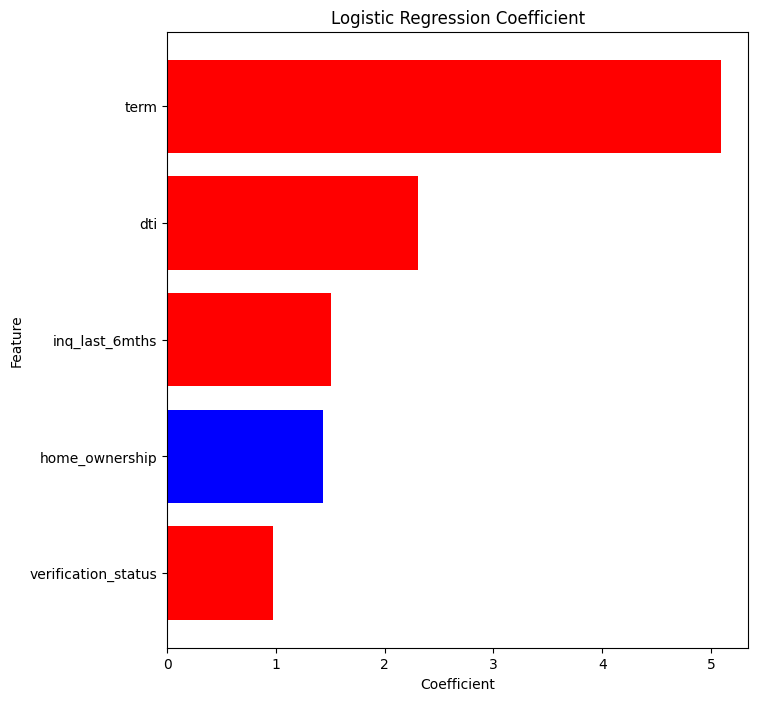

In [58]:
# 상위 10개 중요 피쳐만 선택
top_features = feature_importance.tail(15)

# Calculate absolute values of coefficients
top_features['Absolute_Coefficient'] = top_features['Coefficient'].abs()

# Sorting features based on absolute values of coefficients
top_features = top_features.sort_values(by='Absolute_Coefficient', ascending=True)

# Plot
plt.figure(figsize=(7.5, 8))
bars = plt.barh(top_features['Feature'], top_features['Absolute_Coefficient'], 
                color=np.where(top_features['Coefficient'] < 0, 'blue', 'red'))
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficient')

# Show plot
plt.show()

## 5-2) RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# # 하이퍼파라미터 그리드 설정
# param_grid = {
#     'max_depth': [3, 5, 7],
#     'min_samples_split': [1, 3, 5],
#     'min_samples_leaf': [1, 3, 5],
# }

# 모델 생성
best_rf_model = RandomForestClassifier(random_state=17, 
                            n_estimators=200, 
                            # max_depth=5, 
                            min_samples_split=2,
                            min_samples_leaf=1
                            )
                                

# # GridSearchCV 설정
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc_score', n_jobs=-1, verbose=2)

# # 학습
# grid_search.fit(X_train, y_train)

# # 최적의 하이퍼파라미터 출력
# print(f"Best parameters found: {grid_search.best_params_}")
# print(f"Best AUC score: {grid_search.best_score_}")

# # 최적의 모델로 예측
# best_rf_model = grid_search.best_estimator_

best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_val)
y_pred_proba = best_rf_model.predict_proba(X_val)[:, 1]

get_clf_eval(y_val, y_pred)
get_eval_by_threshold(y_val , y_pred_proba.reshape(-1,1), thresholds)

오차행렬
[[132783     90]
 [ 23826    108]]
정확도: 0.8475, 정밀도 : 0.5455, 재현율:0.0045,F1 스코어:0.0090, f2 :0.0056
ROC 스코어: 0.5019, PR 스코어 : 0.1544, G-mean : 0.0672, AR : 0.6950
임곗값: 0.1
ROC_AUC: 0.6845575608562692
K-S: 0.2656602240116428
오차행렬
[[40524 92349]
 [ 2651 21283]]
정확도: 0.3942, 정밀도 : 0.1873, 재현율:0.8892,F1 스코어:0.3094, f2 :0.5083
ROC 스코어: 0.5971, PR 스코어 : 0.1835, G-mean : 0.5208, AR : -0.2117
---------------------------------------------------------
임곗값: 0.2
ROC_AUC: 0.6845575608562692
K-S: 0.2656602240116428
오차행렬
[[96366 36507]
 [11356 12578]]
정확도: 0.6948, 정밀도 : 0.2562, 재현율:0.5255,F1 스코어:0.3445, f2 :0.4343
ROC 스코어: 0.6254, PR 스코어 : 0.2071, G-mean : 0.6174, AR : 0.3895
---------------------------------------------------------
임곗값: 0.3
ROC_AUC: 0.6845575608562692
K-S: 0.2656602240116428
오차행렬
[[123810   9063]
 [ 19039   4895]]
정확도: 0.8208, 정밀도 : 0.3507, 재현율:0.2045,F1 스코어:0.2584, f2 :0.2231
ROC 스코어: 0.5682, PR 스코어 : 0.1931, G-mean : 0.4365, AR : 0.6416
----------------------------------------

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


오차행렬
[[132873      0]
 [ 23934      0]]
정확도: 0.8474, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000, f2 :0.0000
ROC 스코어: 0.5000, PR 스코어 : 0.1526, G-mean : 0.0000, AR : 0.6947
---------------------------------------------------------
임곗값: 0.8
ROC_AUC: 0.6845575608562692
K-S: 0.2656602240116428


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


오차행렬
[[132873      0]
 [ 23934      0]]
정확도: 0.8474, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000, f2 :0.0000
ROC 스코어: 0.5000, PR 스코어 : 0.1526, G-mean : 0.0000, AR : 0.6947
---------------------------------------------------------
임곗값: 0.9
ROC_AUC: 0.6845575608562692
K-S: 0.2656602240116428


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


오차행렬
[[132873      0]
 [ 23934      0]]
정확도: 0.8474, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000, f2 :0.0000
ROC 스코어: 0.5000, PR 스코어 : 0.1526, G-mean : 0.0000, AR : 0.6947
---------------------------------------------------------


In [ ]:
# 예측
y_test_pred = best_rf_model.predict(X_test)
y_test_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, y_test_pred)
get_eval_by_threshold(y_test , y_test_pred_proba.reshape(-1,1), thresholds)

오차행렬
[[29893    23]
 [29754   162]]
정확도: 0.5023, 정밀도 : 0.8757, 재현율:0.0054,F1 스코어:0.0108, f2 :0.0068
ROC 스코어: 0.5023, PR 스코어 : 0.5020, G-mean : 0.0736, AR : 0.0046
임곗값: 0.1
ROC_AUC: 0.6842374542108285
K-S: 0.2637050407808531
오차행렬
[[ 6325 23591]
 [ 1903 28013]]
정확도: 0.5739, 정밀도 : 0.5428, 재현율:0.9364,F1 스코어:0.6873, f2 :0.8178
ROC 스코어: 0.5739, PR 스코어 : 0.5401, G-mean : 0.4449, AR : 0.1478
---------------------------------------------------------
임곗값: 0.2
ROC_AUC: 0.6842374542108285
K-S: 0.2637050407808531
오차행렬
[[19429 10487]
 [11540 18376]]
정확도: 0.6319, 정밀도 : 0.6367, 재현율:0.6143,F1 스코어:0.6253, f2 :0.6186
ROC 스코어: 0.6319, PR 스코어 : 0.5839, G-mean : 0.6316, AR : 0.2637
---------------------------------------------------------
임곗값: 0.3
ROC_AUC: 0.6842374542108285
K-S: 0.2637050407808531
오차행렬
[[27177  2739]
 [22428  7488]]
정확도: 0.5794, 정밀도 : 0.7322, 재현율:0.2503,F1 스코어:0.3731, f2 :0.2882
ROC 스코어: 0.5794, PR 스코어 : 0.5581, G-mean : 0.4768, AR : 0.1587
-------------------------------------------------

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


오차행렬
[[29916     0]
 [29916     0]]
정확도: 0.5000, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000, f2 :0.0000
ROC 스코어: 0.5000, PR 스코어 : 0.5000, G-mean : 0.0000, AR : 0.0000
---------------------------------------------------------
임곗값: 0.9
ROC_AUC: 0.6842374542108285
K-S: 0.2637050407808531
오차행렬
[[29916     0]
 [29916     0]]
정확도: 0.5000, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000, f2 :0.0000
ROC 스코어: 0.5000, PR 스코어 : 0.5000, G-mean : 0.0000, AR : 0.0000
---------------------------------------------------------


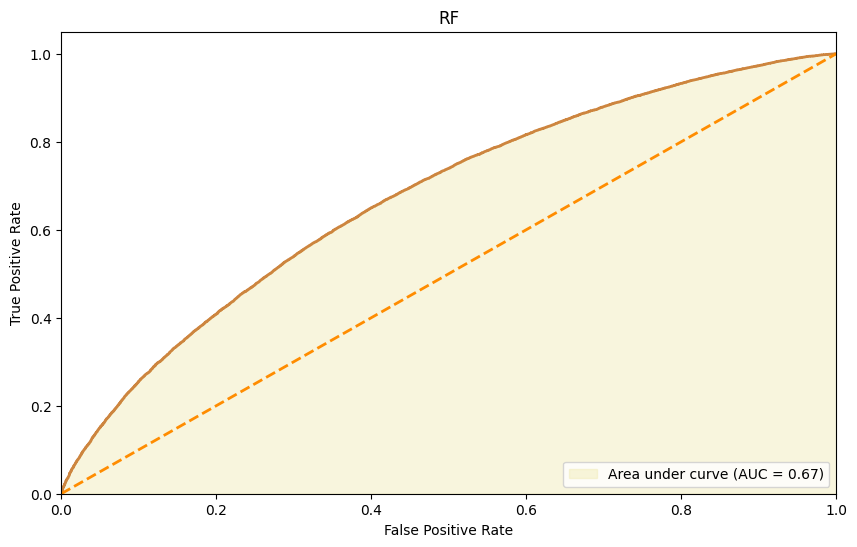

In [ ]:
roc(best_rf_model, "RF")

## 5-3) XGB

In [125]:
from xgboost import XGBClassifier

# # 하이퍼파라미터 그리드 설정
# param_grid = {
#     'max_depth': [3, 5, 7],
#     'min_child_weight': [1, 3, 5],
# }

# 모델 생성
best_xgb_model = XGBClassifier(random_state=17,
                                learning_rate =0.1,
                                n_estimators=1000,
                                max_depth=4,
                                min_child_weight=1,
                                gamma=0,
                                subsample=0.8,
                                colsample_bytree=0.8,
                                objective= 'binary:logistic',
                                nthread=4,
                                scale_pos_weight=1,
                                )

# # GridSearchCV 설정
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc_score', n_jobs=-1, verbose=2)

# # 학습
# grid_search.fit(X_train, y_train)

# # 최적의 하이퍼파라미터 출력
# print(f"Best parameters found: {grid_search.best_params_}")
# print(f"Best AUC score: {grid_search.best_score_}")

# # 최적의 모델로 예측
# best_xgb_model = grid_search.best_estimator_

best_xgb_model.fit(X_train, y_train)
y_pred = best_xgb_model.predict(X_val)
y_pred_proba = best_xgb_model.predict_proba(X_val)[:, 1]

get_clf_eval(y_val, y_pred)
get_eval_by_threshold(y_val , y_pred_proba.reshape(-1,1), thresholds)

오차행렬
[[132150    723]
 [ 23150    784]]
정확도: 0.8478, 정밀도 : 0.5202, 재현율:0.0328,F1 스코어:0.0616, f2 :0.0403
ROC 스코어: 0.5137, PR 스코어 : 0.1647, G-mean : 0.1805, AR : 0.6955
임곗값: 0.1
ROC_AUC: 0.716387540348307
K-S: 0.31540986506854995
오차행렬
[[56798 76075]
 [ 3600 20334]]
정확도: 0.4919, 정밀도 : 0.2109, 재현율:0.8496,F1 스코어:0.3379, f2 :0.5291
ROC 스코어: 0.6385, PR 스코어 : 0.2021, G-mean : 0.6026, AR : -0.0162
---------------------------------------------------------
임곗값: 0.2
ROC_AUC: 0.716387540348307
K-S: 0.31540986506854995
오차행렬
[[104430  28443]
 [ 12109  11825]]
정확도: 0.7414, 정밀도 : 0.2937, 재현율:0.4941,F1 스코어:0.3684, f2 :0.4347
ROC 스코어: 0.6400, PR 스코어 : 0.2223, G-mean : 0.6231, AR : 0.4828
---------------------------------------------------------
임곗값: 0.3
ROC_AUC: 0.716387540348307
K-S: 0.31540986506854995
오차행렬
[[123008   9865]
 [ 18102   5832]]
정확도: 0.8216, 정밀도 : 0.3715, 재현율:0.2437,F1 스코어:0.2943, f2 :0.2617
ROC 스코어: 0.5847, PR 스코어 : 0.2060, G-mean : 0.4750, AR : 0.6433
------------------------------------

c:\Users\hangil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차행렬
[[132873      0]
 [ 23934      0]]
정확도: 0.8474, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000, f2 :0.0000
ROC 스코어: 0.5000, PR 스코어 : 0.1526, G-mean : 0.0000, AR : 0.6947
---------------------------------------------------------


In [126]:
# 예측
y_test_pred = best_xgb_model.predict(X_test)
y_test_pred_proba = best_xgb_model.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, y_test_pred)
get_eval_by_threshold(y_test , y_test_pred_proba.reshape(-1,1), thresholds)

오차행렬
[[29680   236]
 [28618  1298]]
정확도: 0.5177, 정밀도 : 0.8462, 재현율:0.0434,F1 스코어:0.0825, f2 :0.0535
ROC 스코어: 0.5177, PR 스코어 : 0.5150, G-mean : 0.2075, AR : 0.0355
임곗값: 0.1
ROC_AUC: 0.7128897133393477
K-S: 0.3093996523599412
오차행렬
[[11198 18718]
 [ 3787 26129]]
정확도: 0.6239, 정밀도 : 0.5826, 재현율:0.8734,F1 스코어:0.6990, f2 :0.7941
ROC 스코어: 0.6239, PR 스코어 : 0.5722, G-mean : 0.5718, AR : 0.2477
---------------------------------------------------------
임곗값: 0.2
ROC_AUC: 0.7128897133393477
K-S: 0.3093996523599412
오차행렬
[[22150  7766]
 [13233 16683]]
정확도: 0.6490, 정밀도 : 0.6824, 재현율:0.5577,F1 스코어:0.6137, f2 :0.5788
ROC 스코어: 0.6490, PR 스코어 : 0.6017, G-mean : 0.6426, AR : 0.2981
---------------------------------------------------------
임곗값: 0.3
ROC_AUC: 0.7128897133393477
K-S: 0.3093996523599412
오차행렬
[[26992  2924]
 [21112  8804]]
정확도: 0.5983, 정밀도 : 0.7507, 재현율:0.2943,F1 스코어:0.4228, f2 :0.3350
ROC 스코어: 0.5983, PR 스코어 : 0.5738, G-mean : 0.5153, AR : 0.1966
-------------------------------------------------

c:\Users\hangil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


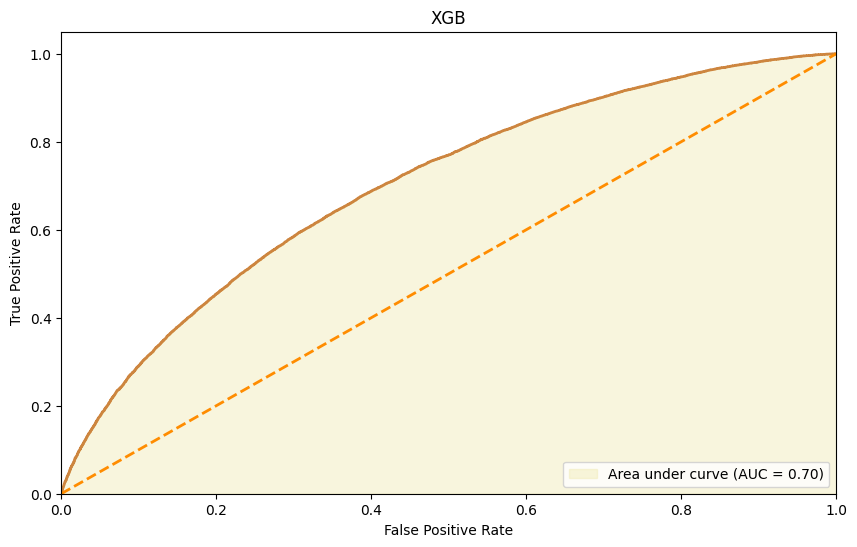

In [120]:
roc(best_xgb_model, "XGB")

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


[19:28:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


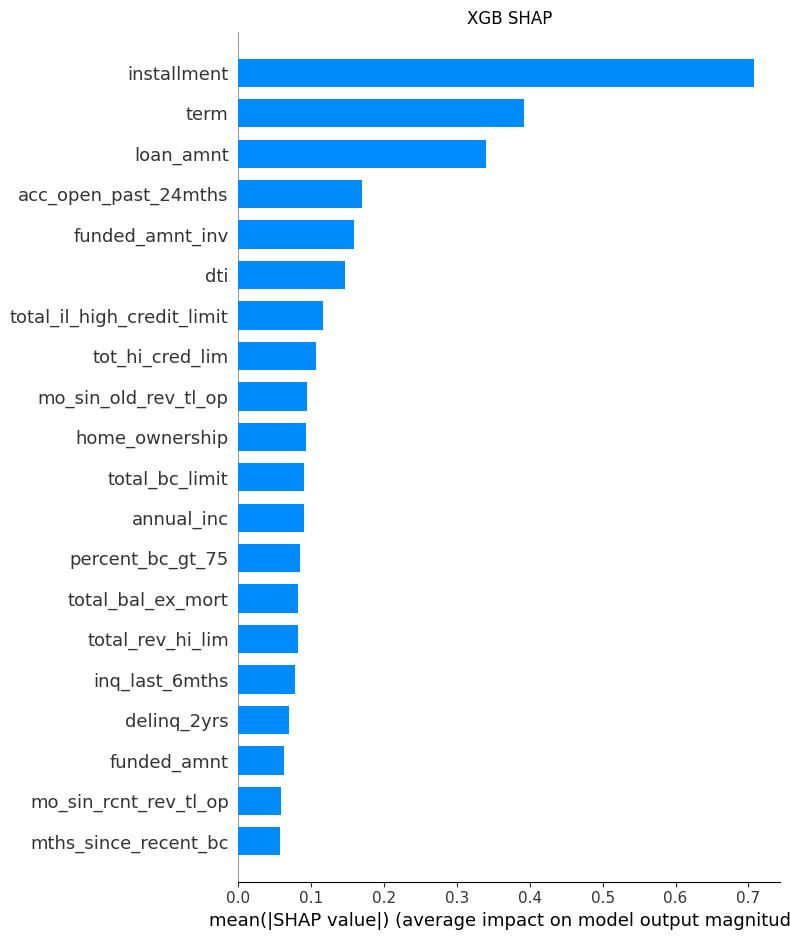

In [ ]:
import shap
shap.initjs()
xgb_explainer = shap.TreeExplainer(best_xgb_model)
xgb_shap_values = xgb_explainer.shap_values(X_resampled)
plt.title('XGB SHAP')
shap.summary_plot(xgb_shap_values, X_resampled, plot_type='bar')

## 5-4) LGBM

In [114]:
from lightgbm import LGBMClassifier

# # 하이퍼파라미터 그리드 설정
# param_grid = {
#     'max_depth': [3, 5, 7],
# }

# 모델 생성
best_lgbm_model = LGBMClassifier(random_state=17,
                    # n_estimators=200, #트리의 최대 개수 (n_estimators): 100
                    # learning_rate=0.01,  #학습률 (learning_rate): 0.1
                    # num_leaves= 12,  #리프 노드의 최대 개수 (num_leaves): 31
                    # max_depth=5,    #트리의 최대 깊이 (max_depth): -1 (제한 없음)
                    # bagging_fraction=0.5, 
                    # feature_fraction=0.5, 
                    # lambda_l1=0.1,
                    # lambda_l2=0.1,
                    # verbose_eval = -1
                    )

# # GridSearchCV 설정
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc_score', n_jobs=-1, verbose=2)

# # 학습
# grid_search.fit(X_train, y_train)

# # 최적의 하이퍼파라미터 출력
# print(f"Best parameters found: {grid_search.best_params_}")
# print(f"Best AUC score: {grid_search.best_score_}")

# # 최적의 모델로 예측
# best_lgbm_model = grid_search.best_estimator_

best_lgbm_model.fit(X_train, y_train)
y_pred = best_lgbm_model.predict(X_val)
y_pred_proba = best_lgbm_model.predict_proba(X_val)[:, 1]

get_clf_eval(y_val, y_pred)
get_eval_by_threshold(y_val , y_pred_proba.reshape(-1,1), thresholds)

[LightGBM] [Info] Number of positive: 95734, number of negative: 531493
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.175694 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7047
[LightGBM] [Info] Number of data points in the train set: 627227, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.152631 -> initscore=-1.714117
[LightGBM] [Info] Start training from score -1.714117
오차행렬
[[132530    343]
 [ 23524    410]]
정확도: 0.8478, 정밀도 : 0.5445, 재현율:0.0171,F1 스코어:0.0332, f2 :0.0212
ROC 스코어: 0.5073, PR 스코어 : 0.1593, G-mean : 0.1307, AR : 0.6956
임곗값: 0.1
ROC_AUC: 0.7081239908585847
K-S: 0.30307046899425283
오차행렬
[[51352 81521]
 [ 3281 20653]]
정확도: 0.4592, 정밀도 : 0.2021, 재현율:0.8629,F1 스코어:0.3275, f2 :0.5218
ROC 스코어: 0.6247, PR 스코어 : 0.1953, G-mean : 0.5775, AR : -0.0816
---------------------------------------------------------
임곗값: 0.2
ROC_AUC: 0.7081239908585847
K-S: 0.303070468

c:\Users\hangil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차행렬
[[132873      0]
 [ 23934      0]]
정확도: 0.8474, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000, f2 :0.0000
ROC 스코어: 0.5000, PR 스코어 : 0.1526, G-mean : 0.0000, AR : 0.6947
---------------------------------------------------------
임곗값: 0.8
ROC_AUC: 0.7081239908585847
K-S: 0.30307046899425283


c:\Users\hangil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차행렬
[[132873      0]
 [ 23934      0]]
정확도: 0.8474, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000, f2 :0.0000
ROC 스코어: 0.5000, PR 스코어 : 0.1526, G-mean : 0.0000, AR : 0.6947
---------------------------------------------------------
임곗값: 0.9
ROC_AUC: 0.7081239908585847
K-S: 0.30307046899425283


c:\Users\hangil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차행렬
[[132873      0]
 [ 23934      0]]
정확도: 0.8474, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000, f2 :0.0000
ROC 스코어: 0.5000, PR 스코어 : 0.1526, G-mean : 0.0000, AR : 0.6947
---------------------------------------------------------


In [116]:
# 예측
y_test_pred = best_lgbm_model.predict(X_test)
y_test_pred_proba = best_lgbm_model.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, y_test_pred)
get_eval_by_threshold(y_test , y_test_pred_proba.reshape(-1,1), thresholds)

오차행렬
[[29805   111]
 [29233   683]]
정확도: 0.5096, 정밀도 : 0.8602, 재현율:0.0228,F1 스코어:0.0445, f2 :0.0284
ROC 스코어: 0.5096, PR 스코어 : 0.5082, G-mean : 0.1508, AR : 0.0191
임곗값: 0.1
ROC_AUC: 0.7061577593980175
K-S: 0.29596202700895846
오차행렬
[[ 9890 20026]
 [ 3231 26685]]
정확도: 0.6113, 정밀도 : 0.5713, 재현율:0.8920,F1 스코어:0.6965, f2 :0.8020
ROC 스코어: 0.6113, PR 스코어 : 0.5636, G-mean : 0.5430, AR : 0.2226
---------------------------------------------------------
임곗값: 0.2
ROC_AUC: 0.7061577593980175
K-S: 0.29596202700895846
오차행렬
[[22382  7534]
 [13989 15927]]
정확도: 0.6403, 정밀도 : 0.6789, 재현율:0.5324,F1 스코어:0.5968, f2 :0.5564
ROC 스코어: 0.6403, PR 스코어 : 0.5952, G-mean : 0.6311, AR : 0.2806
---------------------------------------------------------
임곗값: 0.3
ROC_AUC: 0.7061577593980175
K-S: 0.29596202700895846
오차행렬
[[27566  2350]
 [22456  7460]]
정확도: 0.5854, 정밀도 : 0.7604, 재현율:0.2494,F1 스코어:0.3756, f2 :0.2881
ROC 스코어: 0.5854, PR 스코어 : 0.5649, G-mean : 0.4794, AR : 0.1708
----------------------------------------------

c:\Users\hangil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hangil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hangil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차행렬
[[29916     0]
 [29916     0]]
정확도: 0.5000, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000, f2 :0.0000
ROC 스코어: 0.5000, PR 스코어 : 0.5000, G-mean : 0.0000, AR : 0.0000
---------------------------------------------------------


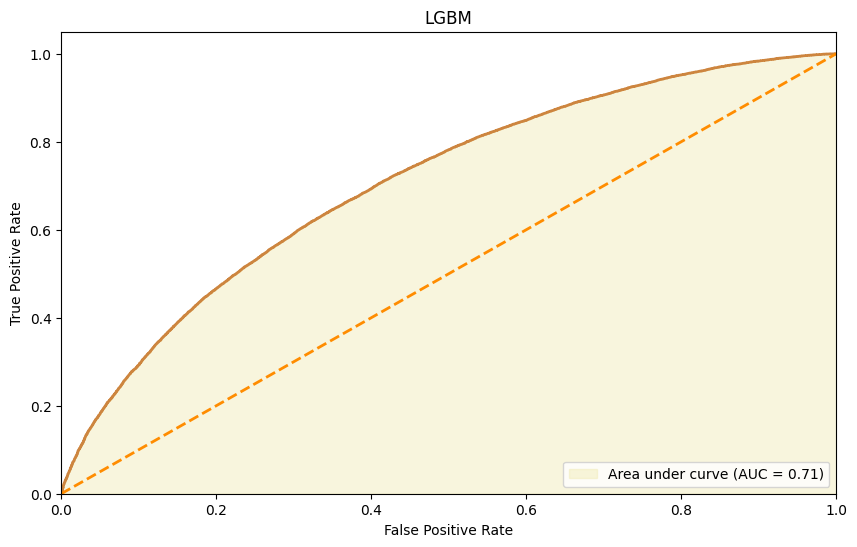

In [117]:
roc(best_lgbm_model, "LGBM")

In [ ]:
import shap
shap.initjs()
lgbm_explainer = shap.TreeExplainer(best_lgbm_model)
lgbm_shap_values = lgbm_explainer.shap_values(X_resampled)
plt.title('LGBM SHAP')
shap.summary_plot(lgbm_shap_values, X_resampled, plot_type='bar')

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


## 5-5) TabNet

!pip install pytorch_tabnet

In [16]:
from pytorch_tabnet.tab_model import TabNetClassifier

# TabNet 모델 초기화
tabnet = TabNetClassifier()

# 모델 학습
tabnet.fit(
        X_train=X_resampled.values,  # DataFrame을 NumPy 배열로 변환
        y_train=y_resampled.values,  # Series를 NumPy 배열로 변환
        eval_set=[(X_val.values, y_val.values)],  # 테스트 데이터도 변환
        eval_metric=['auc']
        )

c:\Users\hangil\AppData\Local\Programs\Python\Python39\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.4148  | val_0_auc: 0.67291 |  0:00:53s
epoch 1  | loss: 0.40218 | val_0_auc: 0.68731 |  0:01:45s
epoch 2  | loss: 0.3991  | val_0_auc: 0.69055 |  0:02:35s
epoch 3  | loss: 0.39792 | val_0_auc: 0.69714 |  0:03:25s
epoch 4  | loss: 0.39642 | val_0_auc: 0.70125 |  0:04:13s
epoch 5  | loss: 0.39333 | val_0_auc: 0.70797 |  0:05:02s
epoch 6  | loss: 0.39183 | val_0_auc: 0.70966 |  0:05:50s
epoch 7  | loss: 0.39112 | val_0_auc: 0.71098 |  0:06:39s
epoch 8  | loss: 0.3907  | val_0_auc: 0.71251 |  0:07:28s
epoch 9  | loss: 0.39056 | val_0_auc: 0.71199 |  0:08:17s
epoch 10 | loss: 0.39034 | val_0_auc: 0.70947 |  0:09:06s
epoch 11 | loss: 0.3903  | val_0_auc: 0.71151 |  0:09:54s
epoch 12 | loss: 0.39011 | val_0_auc: 0.71672 |  0:10:43s
epoch 13 | loss: 0.38984 | val_0_auc: 0.71648 |  0:11:31s
epoch 14 | loss: 0.38958 | val_0_auc: 0.71702 |  0:12:19s


RuntimeError: [enforce fail at alloc_cpu.cpp:114] data. DefaultCPUAllocator: not enough memory: you tried to allocate 65536 bytes.

In [ ]:
y_pred_tabnet = tabnet.predict(X_val)
y_pred_proba_tabnet = tabnet.predict_proba(X_val)[:, 1]

get_clf_eval(y_val, y_pred_tabnet)
get_eval_by_threshold(y_val , y_pred_proba_tabnet.reshape(-1,1), thresholds)

In [ ]:
# 예측
y_test_pred_tabnet = tabnet.predict(X_test.values)
y_test_pred_proba_tabnet = tabnet.predict_proba(X_test.values)[:, 1]

In [ ]:
get_clf_eval(y_test, y_test_pred_tabnet)
get_eval_by_threshold(y_test , y_test_pred_proba_tabnet.reshape(-1,1), thresholds)

c:\Users\hangil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차행렬
[[29916     0]
 [29916     0]]
정확도: 0.5000, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000, f2 :0.0000
ROC 스코어: 0.5000, PR 스코어 : 0.5000, G-mean : 0.0000, AR : 0.0000
임곗값: 0.1
ROC_AUC: 0.7068340787060212
K-S: 0.3014774702500334
오차행렬
[[ 7725 22191]
 [ 2198 27718]]
정확도: 0.5924, 정밀도 : 0.5554, 재현율:0.9265,F1 스코어:0.6945, f2 :0.8173
ROC 스코어: 0.5924, PR 스코어 : 0.5513, G-mean : 0.4891, AR : 0.1848
---------------------------------------------------------
임곗값: 0.2
ROC_AUC: 0.7068340787060212
K-S: 0.3014774702500334
오차행렬
[[19789 10127]
 [10907 19009]]
정확도: 0.6484, 정밀도 : 0.6524, 재현율:0.6354,F1 스코어:0.6438, f2 :0.6387
ROC 스코어: 0.6484, PR 스코어 : 0.5969, G-mean : 0.6483, AR : 0.2969
---------------------------------------------------------
임곗값: 0.3
ROC_AUC: 0.7068340787060212
K-S: 0.3014774702500334
오차행렬
[[26246  3670]
 [19636 10280]]
정확도: 0.6105, 정밀도 : 0.7369, 재현율:0.3436,F1 스코어:0.4687, f2 :0.3847
ROC 스코어: 0.6105, PR 스코어 : 0.5814, G-mean : 0.5491, AR : 0.2210
-------------------------------------------------

c:\Users\hangil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hangil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hangil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


임곗값: 0.7
ROC_AUC: 0.7068340787060212
K-S: 0.3014774702500334
오차행렬
[[29916     0]
 [29916     0]]
정확도: 0.5000, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000, f2 :0.0000
ROC 스코어: 0.5000, PR 스코어 : 0.5000, G-mean : 0.0000, AR : 0.0000
---------------------------------------------------------
임곗값: 0.8
ROC_AUC: 0.7068340787060212
K-S: 0.3014774702500334
오차행렬
[[29916     0]
 [29916     0]]
정확도: 0.5000, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000, f2 :0.0000
ROC 스코어: 0.5000, PR 스코어 : 0.5000, G-mean : 0.0000, AR : 0.0000
---------------------------------------------------------
임곗값: 0.9
ROC_AUC: 0.7068340787060212
K-S: 0.3014774702500334
오차행렬
[[29916     0]
 [29916     0]]
정확도: 0.5000, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000, f2 :0.0000
ROC 스코어: 0.5000, PR 스코어 : 0.5000, G-mean : 0.0000, AR : 0.0000
---------------------------------------------------------


c:\Users\hangil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hangil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


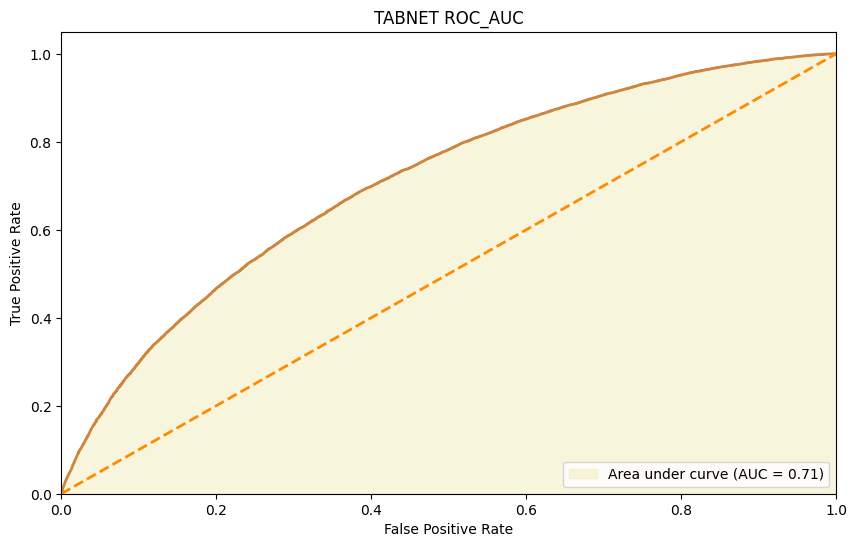

In [ ]:
def tabnett(model,name,pred) :
    # 테스트 데이터에 대한 예측 확률 계산
    

    # ROC 커브 계산
    fpr, tpr, thresholds = roc_curve(y_test, pred)

    # AUC 계산
    roc_auc = auc(fpr, tpr)

    # ROC 커브에 AUC 면적에 색을 입히는 코드 수정
    plt.figure(figsize=(10, 6))

    # ROC 커브 시각화 및 AUC 면적 색칠
    plt.fill_between(fpr, tpr, color='palegoldenrod', alpha=0.4, label=f'Area under curve (AUC = {roc_auc:.2f})')
    plt.plot(fpr, tpr, color='peru', lw=2)

    # 기본 설정
    plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name}')
    plt.legend(loc="lower right")
    return plt.show()

tabnett(tabnet, 'TABNET ROC_AUC', y_test_pred_proba_tabnet)

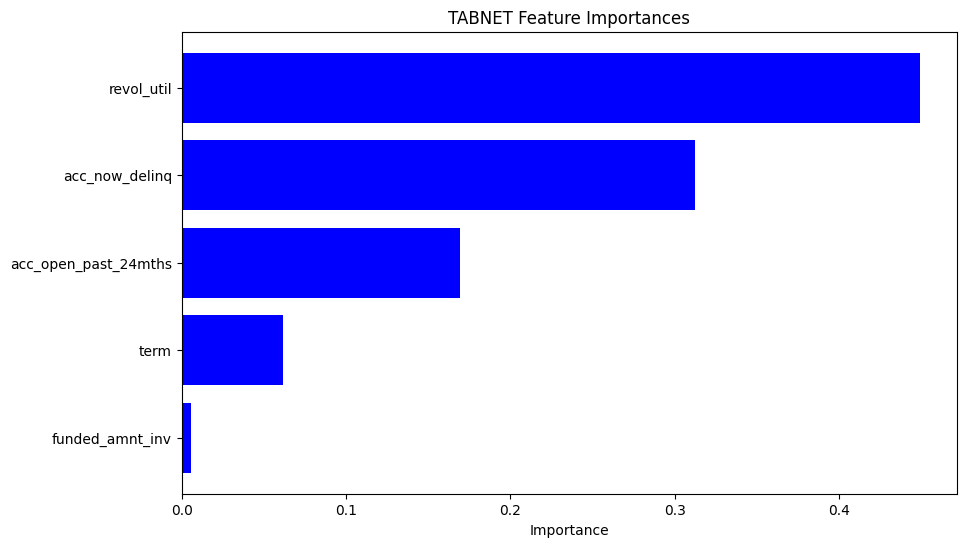

In [ ]:
# 특성 중요도 추출
tabnet_feature_importances = tabnet.feature_importances_

# 특성명 가져오기 (X_resampled의 컬럼명 사용)
feature_names = X_resampled.columns

# 특성 중요도를 DataFrame으로 변환
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': tabnet_feature_importances})

# 중요도에 따라 내림차순 정렬
importances_df = importances_df.sort_values(by='Importance', ascending=False).head(5)

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'], color = 'blue')
plt.xlabel('Importance')
plt.title('TABNET Feature Importances')
plt.gca().invert_yaxis()
plt.show()

## 5-6) CatBoost
!pip install catboost

In [12]:
from catboost import CatBoostClassifier

clf_catboost = CatBoostClassifier(iterations=100, random_state=123, eval_metric='AUC')
clf_catboost.fit(X_train, y_train, eval_set=(X_val,y_val))

Learning rate set to 0.423519
0:	test: 0.6323808	best: 0.6323808 (0)	total: 294ms	remaining: 29.1s
1:	test: 0.6518183	best: 0.6518183 (1)	total: 432ms	remaining: 21.2s
2:	test: 0.6660685	best: 0.6660685 (2)	total: 581ms	remaining: 18.8s
3:	test: 0.6730246	best: 0.6730246 (3)	total: 719ms	remaining: 17.3s
4:	test: 0.6771783	best: 0.6771783 (4)	total: 882ms	remaining: 16.8s
5:	test: 0.6795911	best: 0.6795911 (5)	total: 1.04s	remaining: 16.3s
6:	test: 0.6825117	best: 0.6825117 (6)	total: 1.16s	remaining: 15.4s
7:	test: 0.6842465	best: 0.6842465 (7)	total: 1.31s	remaining: 15.1s
8:	test: 0.6858832	best: 0.6858832 (8)	total: 1.45s	remaining: 14.7s
9:	test: 0.6875104	best: 0.6875104 (9)	total: 1.57s	remaining: 14.1s
10:	test: 0.6887248	best: 0.6887248 (10)	total: 1.69s	remaining: 13.7s
11:	test: 0.6897705	best: 0.6897705 (11)	total: 1.85s	remaining: 13.6s
12:	test: 0.6908696	best: 0.6908696 (12)	total: 2s	remaining: 13.4s
13:	test: 0.6917745	best: 0.6917745 (13)	total: 2.11s	remaining: 13s
1

In [14]:
y_pred_cat = clf_catboost.predict(X_val)
y_pred_proba_cat = clf_catboost.predict_proba(X_val)[:, 1]

get_clf_eval(y_val, y_pred_cat)
get_eval_by_threshold(y_val , y_pred_proba_cat.reshape(-1,1), thresholds)

오차행렬
[[132260    613]
 [ 23210    724]]
정확도: 0.8481, 정밀도 : 0.5415, 재현율:0.0302,F1 스코어:0.0573, f2 :0.0373
ROC 스코어: 0.5128, PR 스코어 : 0.1644, G-mean : 0.1735, AR : 0.6961
임곗값: 0.1
ROC_AUC: 0.7104336665682465
K-S: 0.30624952534561894
오차행렬
[[54331 78542]
 [ 3531 20403]]
정확도: 0.4766, 정밀도 : 0.2062, 재현율:0.8525,F1 스코어:0.3321, f2 :0.5240
ROC 스코어: 0.6307, PR 스코어 : 0.1983, G-mean : 0.5904, AR : -0.0468
---------------------------------------------------------
임곗값: 0.2
ROC_AUC: 0.7104336665682465
K-S: 0.30624952534561894
오차행렬
[[104817  28056]
 [ 12289  11645]]
정확도: 0.7427, 정밀도 : 0.2933, 재현율:0.4865,F1 스코어:0.3660, f2 :0.4299
ROC 스코어: 0.6377, PR 스코어 : 0.2211, G-mean : 0.6195, AR : 0.4854
---------------------------------------------------------
임곗값: 0.3
ROC_AUC: 0.7104336665682465
K-S: 0.30624952534561894
오차행렬
[[123841   9032]
 [ 18583   5351]]
정확도: 0.8239, 정밀도 : 0.3720, 재현율:0.2236,F1 스코어:0.2793, f2 :0.2430
ROC 스코어: 0.5778, PR 스코어 : 0.2017, G-mean : 0.4565, AR : 0.6478
---------------------------------

c:\Users\hangil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차행렬
[[132873      0]
 [ 23934      0]]
정확도: 0.8474, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000, f2 :0.0000
ROC 스코어: 0.5000, PR 스코어 : 0.1526, G-mean : 0.0000, AR : 0.6947
---------------------------------------------------------


In [16]:
# 예측
y_test_pred_cat = clf_catboost.predict(X_test)
y_test_pred_proba_cat = clf_catboost.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, y_test_pred_cat)
get_eval_by_threshold(y_test , y_test_pred_proba_cat.reshape(-1,1), thresholds)

오차행렬
[[29674   242]
 [28542  1374]]
정확도: 0.5189, 정밀도 : 0.8502, 재현율:0.0459,F1 스코어:0.0871, f2 :0.0566
ROC 스코어: 0.5189, PR 스코어 : 0.5161, G-mean : 0.2134, AR : 0.0378
임곗값: 0.1
ROC_AUC: 0.7067514941019237
K-S: 0.29830191202032363
오차행렬
[[10239 19677]
 [ 3400 26516]]
정확도: 0.6143, 정밀도 : 0.5740, 재현율:0.8863,F1 스코어:0.6968, f2 :0.7994
ROC 스코어: 0.6143, PR 스코어 : 0.5656, G-mean : 0.5508, AR : 0.2286
---------------------------------------------------------
임곗값: 0.2
ROC_AUC: 0.7067514941019237
K-S: 0.29830191202032363
오차행렬
[[21741  8175]
 [13035 16881]]
정확도: 0.6455, 정밀도 : 0.6737, 재현율:0.5643,F1 스코어:0.6142, f2 :0.5832
ROC 스코어: 0.6455, PR 스코어 : 0.5980, G-mean : 0.6404, AR : 0.2910
---------------------------------------------------------
임곗값: 0.3
ROC_AUC: 0.7067514941019237
K-S: 0.29830191202032363
오차행렬
[[26991  2925]
 [21183  8733]]
정확도: 0.5971, 정밀도 : 0.7491, 재현율:0.2919,F1 스코어:0.4201, f2 :0.3325
ROC 스코어: 0.5971, PR 스코어 : 0.5727, G-mean : 0.5132, AR : 0.1941
----------------------------------------------

c:\Users\hangil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


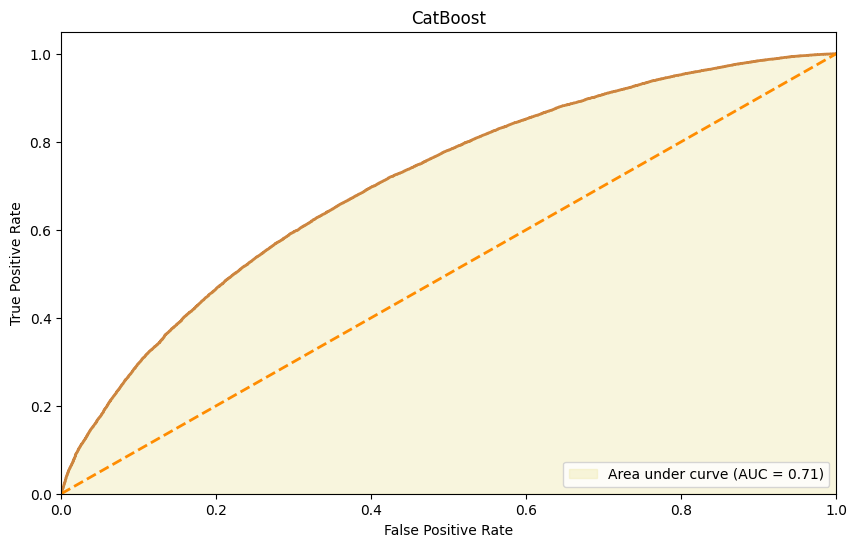

In [17]:
roc(clf_catboost, "CatBoost")

# Ⅵ. 인사이트 & 피드백

- 처음으로 data read 과정에서 메모리 문제 발생 경험 -> chunksize 활용, low_memory=False

- 오브젝트 데이터 처리
    -> label encoding한 변수 (home_ownership)-> train의 라벨 1,0 분포를 이용해 정렬한 후 맵핑하는 방법을 고려 ※ test 예외처리 필요
    -> 비율 그래프에 정확한 수치도 나타낼 것

- 결측치 처리
    -> 모델의 예측값으로 채우는 것에 대한 고민
    -> 분모가 0인 경우에 대한 고민

- 수치형, 결측치가 없는 데이터에 대한 탐색이 부족했다.

- 리샘플링 순서에 대한 고민

- 모델 성능
    -> 모델링 이전 전처리 과정 점검
    -> 튜닝 순서에 대한 고려

- 분기점마다 개별 변수 생성 or 데이터 저장 -> 불필요한 코드 실행, 시간 낭비 줄이기

- 모델별 효율적인 데이터 분석 순서 고려 -> 모델마다 개별로 진행 가능

- shap value 코드 점검

- term +
- inq_last_6mths +
- home_ownership - : 예상한 결과와 반대
- dti +
- verification_status +


- installment, loan_amount
- term
- revol_util